<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.316 Course Team, Copyright 2023 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# LECTURE 10


<a name='section_10_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.0 Overview</h2>



In this class, we will formalize how we actualy make a scientific hypothesis and test it. 

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 10.0 Overview of Learning Objectives

In this lecture we will explore the following objectives:

- What is a measurment?
- Bayes Thereom
- Bayesian vs Frequentists
- Nuisance Parameters
- Hypothesis test
- $\chi^2$ test
- KS-test
- Likelihood test

<br>
<!--end-block-->

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.

In [1]:
#>>>RUN: L10.0-runcell01

import numpy as np
import lmfit
import matplotlib.pyplot as plt
from scipy import stats

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.


In [2]:
#>>>RUN: L10.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_10_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.1 What is a measurement? </h2>  


What is a measurement? 

Lets say we have a measurement of some parameter $x$, and this meausurement behaves like a gaussian about some point with width $\sigma=1$. Lets write out this meausrement.  

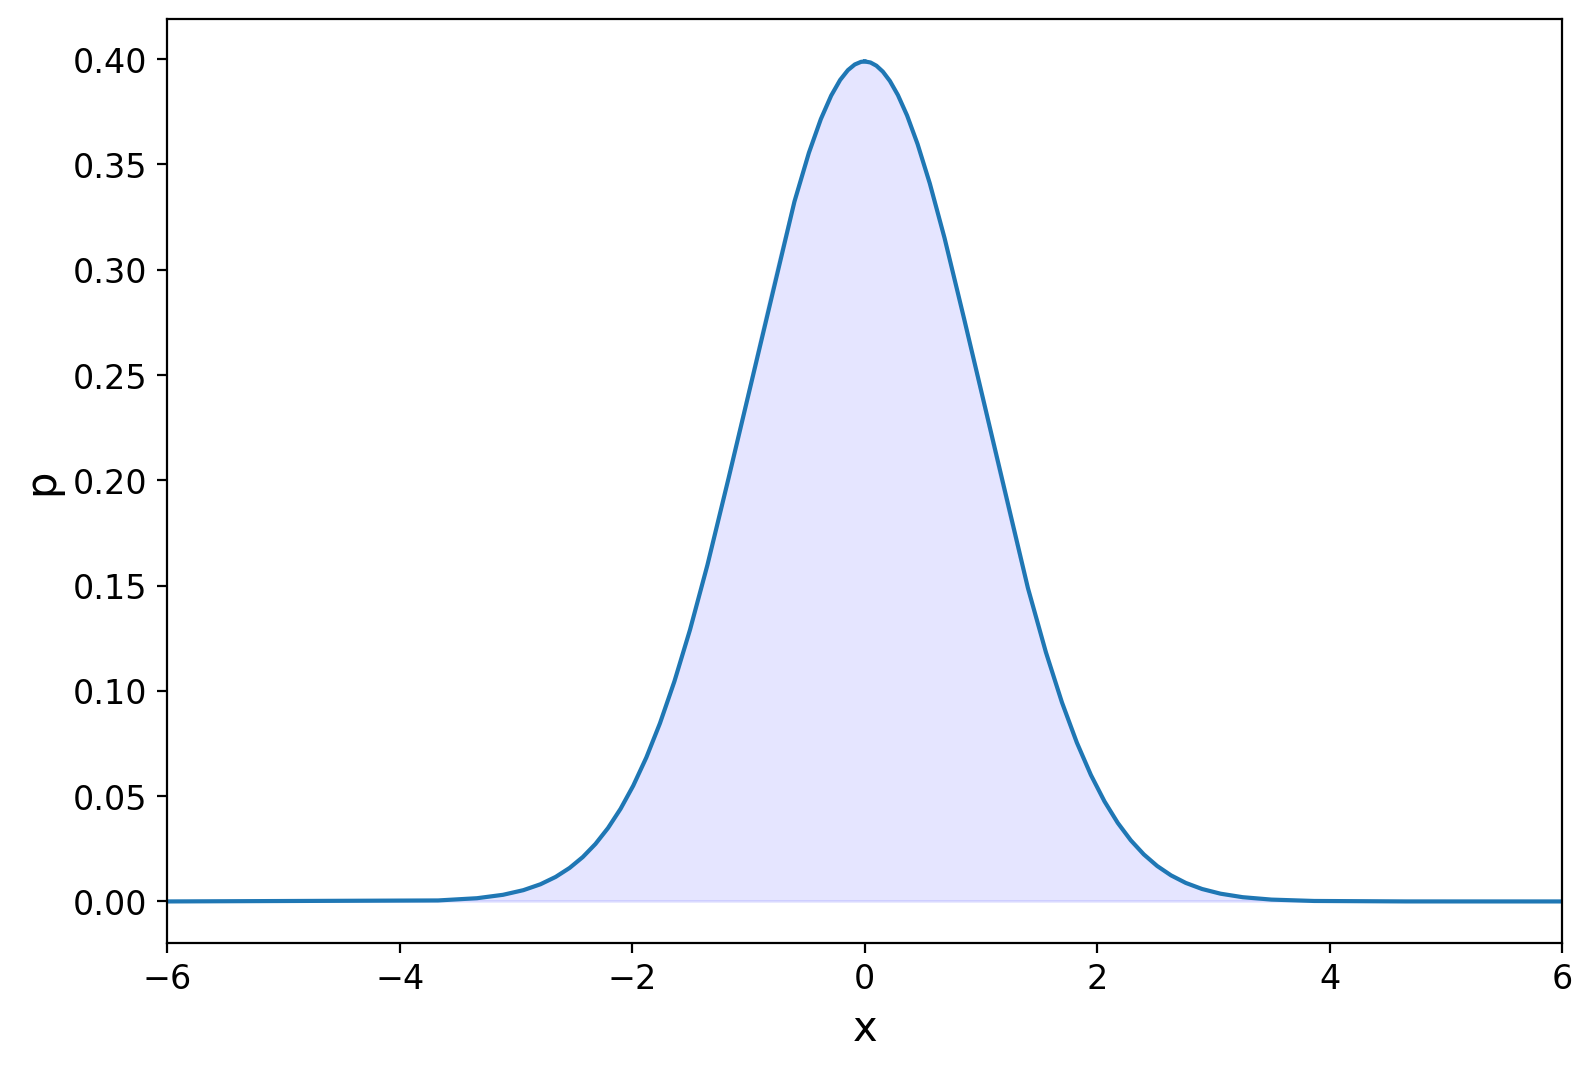

In [3]:
#Our measurement probability
def gaus(mu=0,sigma=1): 
    x = np.arange(-10, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    return x,y

#a quick plot of what we expect the measurement to be
def plotgaus():
    x,y=gaus(0,1)
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fast')
    ax.plot(x,y)
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    plt.show()

plotgaus()

This preconceived distribution about how our measurement will behave is known as a prior. Now lets say we perform this measurement, but our observed measurement is not actually at the point we expect it to be. What if, for example our measurement is at $x=2$ what woud be the likelihood of this occuring or not occuring. 

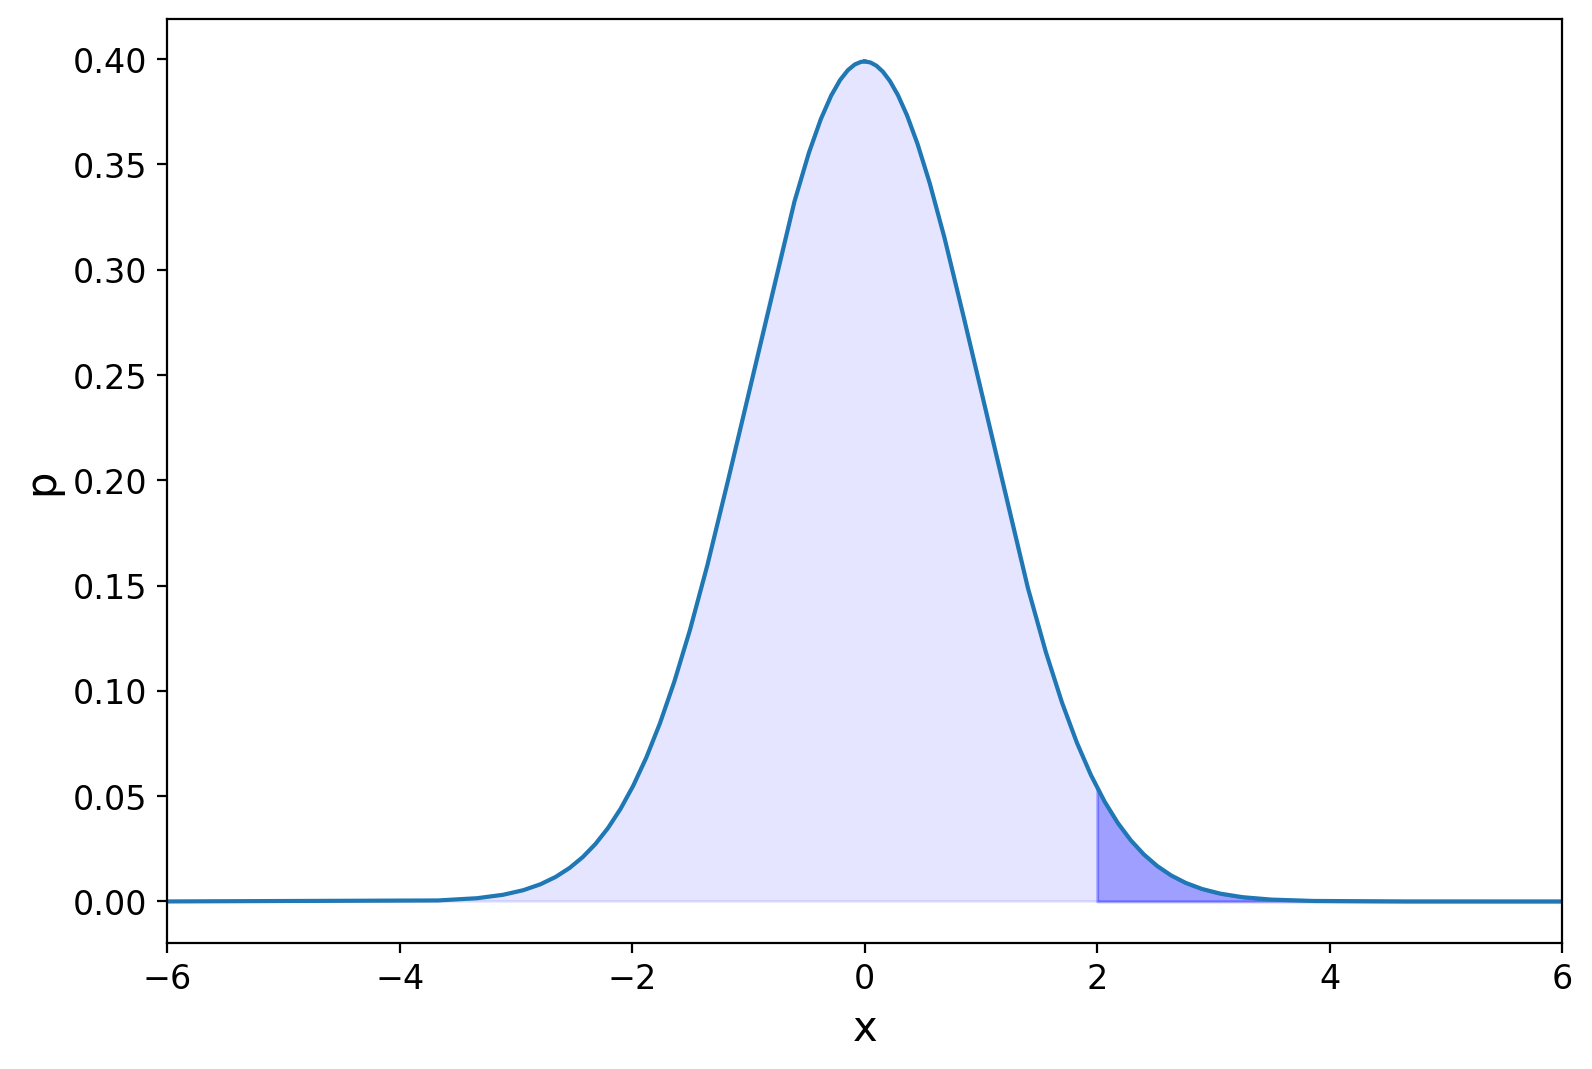

In [4]:
def gaus(mu=0,sigma=1,meas=2): 
    x = np.arange(-10, 10, 0.001)
    xmeas = np.arange(meas, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    ymeas = stats.norm.pdf(xmeas,mu,sigma)
    return x,y,xmeas,ymeas

def plotgaus():
    x,y,xmeas,ymeas=gaus(0,1,2)
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fast')
    ax.plot(x,y)
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    ax.fill_between(xmeas,ymeas,0, alpha=0.3, color='b')
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    plt.show()
plotgaus()


From the above, observed measurement. It is clear that this distribution has a large deviation from what we actually expected to observe. The key question here that we would like to understand: Is this a statistical fluctation, or is this something we did not expect?  

Understanding if this is something we do not expect is the focus of this lecture. Lets now imagine that we perform this measurement a number of time, say 10 times, and it all comes up away from our expectation, or perhaps 1000 times, what do we think is going on?

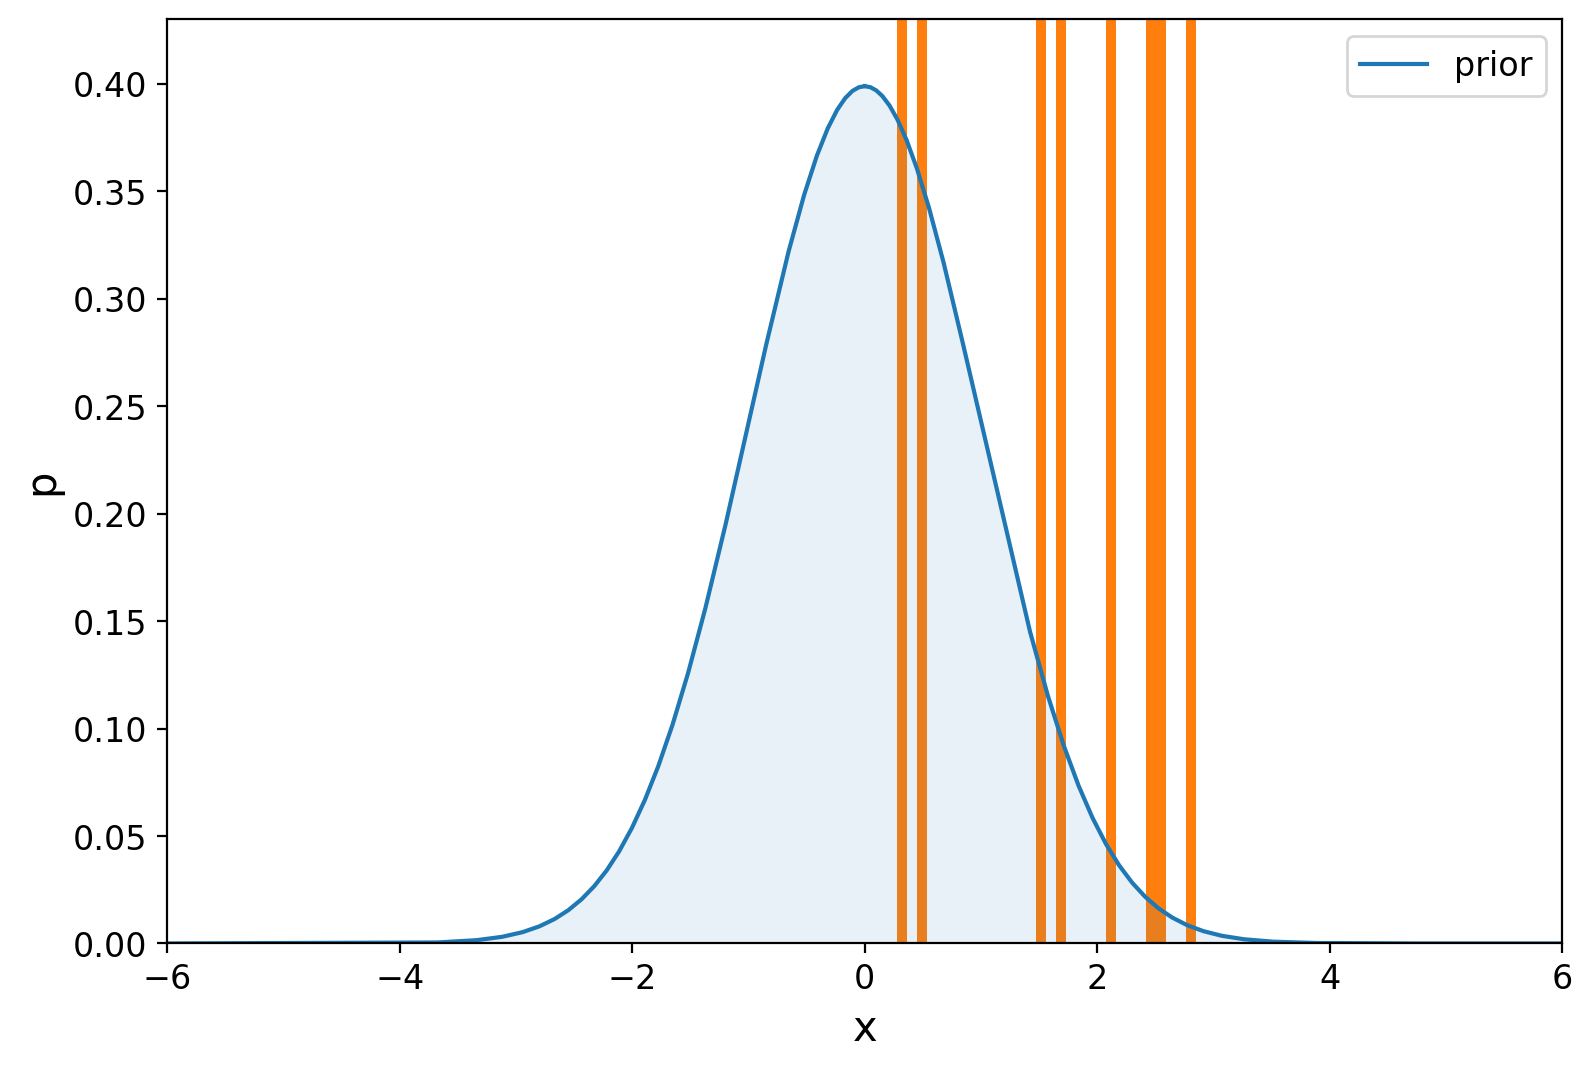

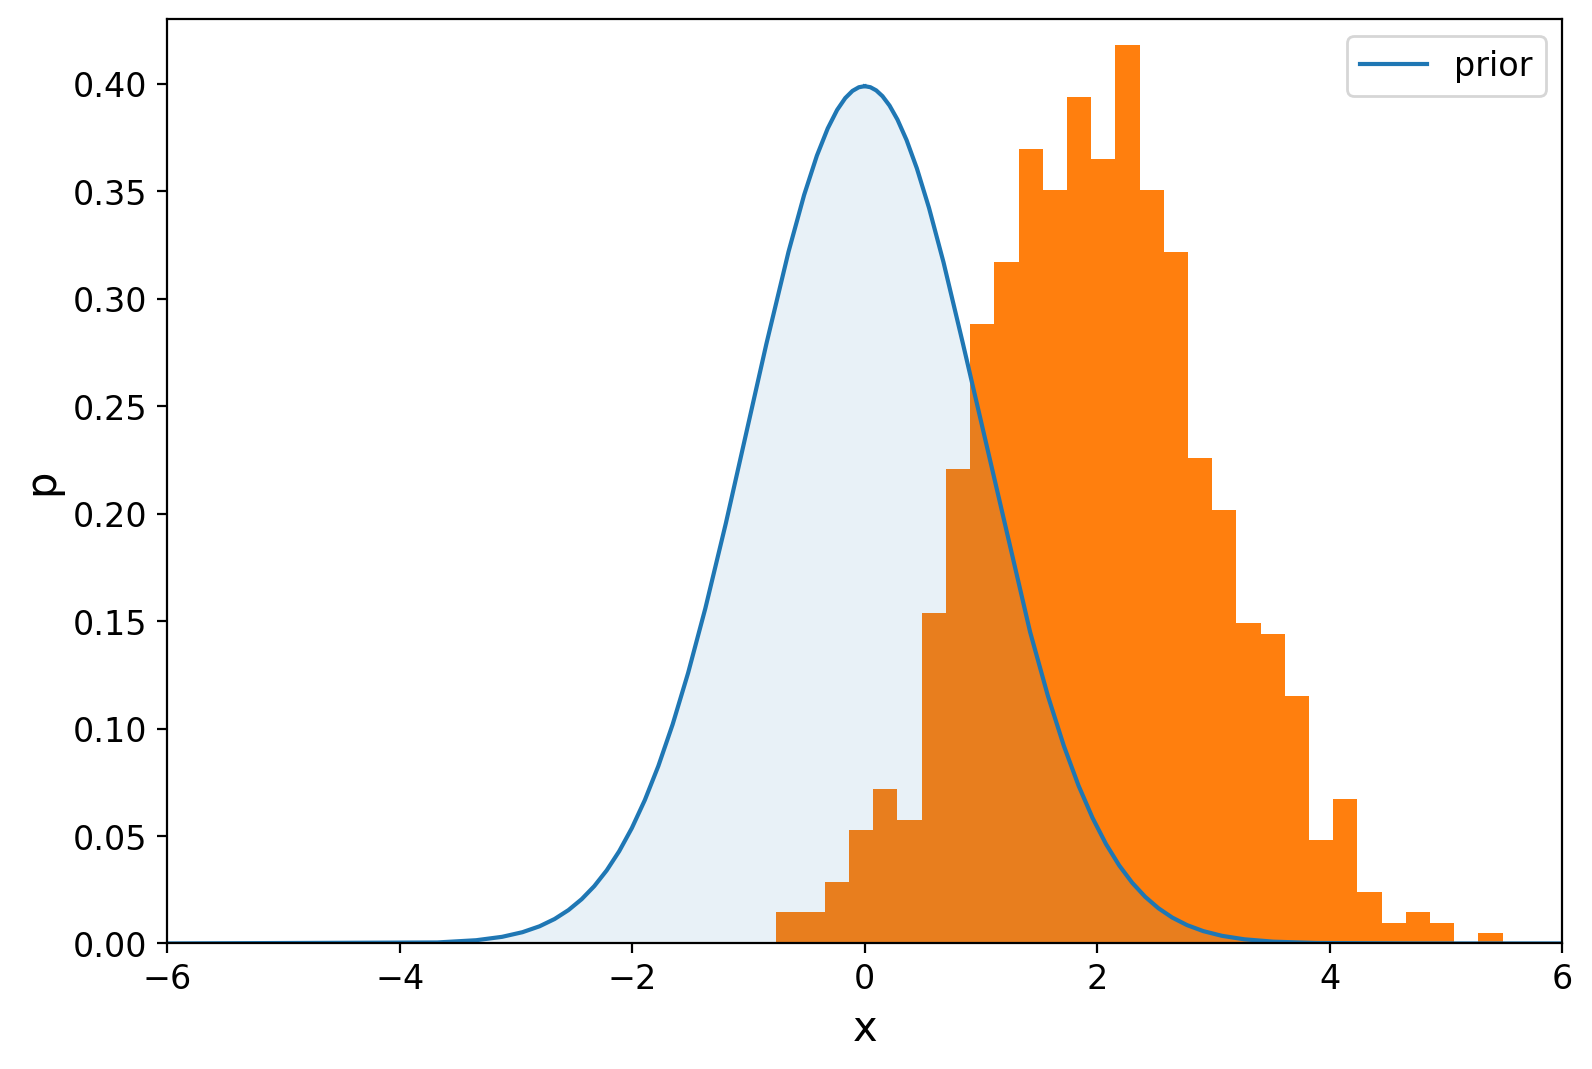

In [5]:
def gaus(mu=0,sigma=1): 
    x = np.arange(-10, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    return x,y

def plotGausSample(iZ,iSample):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    #sample
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    #noral st
    xs,ys=gaus(0,1)
    ax.plot(xs,ys,label='prior')
    count, bins, ignored = plt.hist(samples, 30, density=True)
    #ax.plot(x,y,label='posterior')
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.ylim(0,0.43)
    plt.show()
plotGausSample(2,10)
plotGausSample(2,1000)

So we look at the above distribution of a few events, we can start to guess that something might be going wrong. If we look at the distribution with many events, we clearly start to see that there is a clear deviation between our prior and distribution.  With both of these samples, we are getting the hint that something is wrong, and we need to fix our distribution. 

In this case, we can easily fix this by just moving our gaussian to the right. In fact, we could just fit a floating gaussian to ge the right shape. 

However, we could take a more postive spin on our observed data, and say that our prior is actually right, and we are just getting a biased sample. In reality there are many more events, and we just took a subset. This equates to thinking about your prior as being much larger, like in the figure below


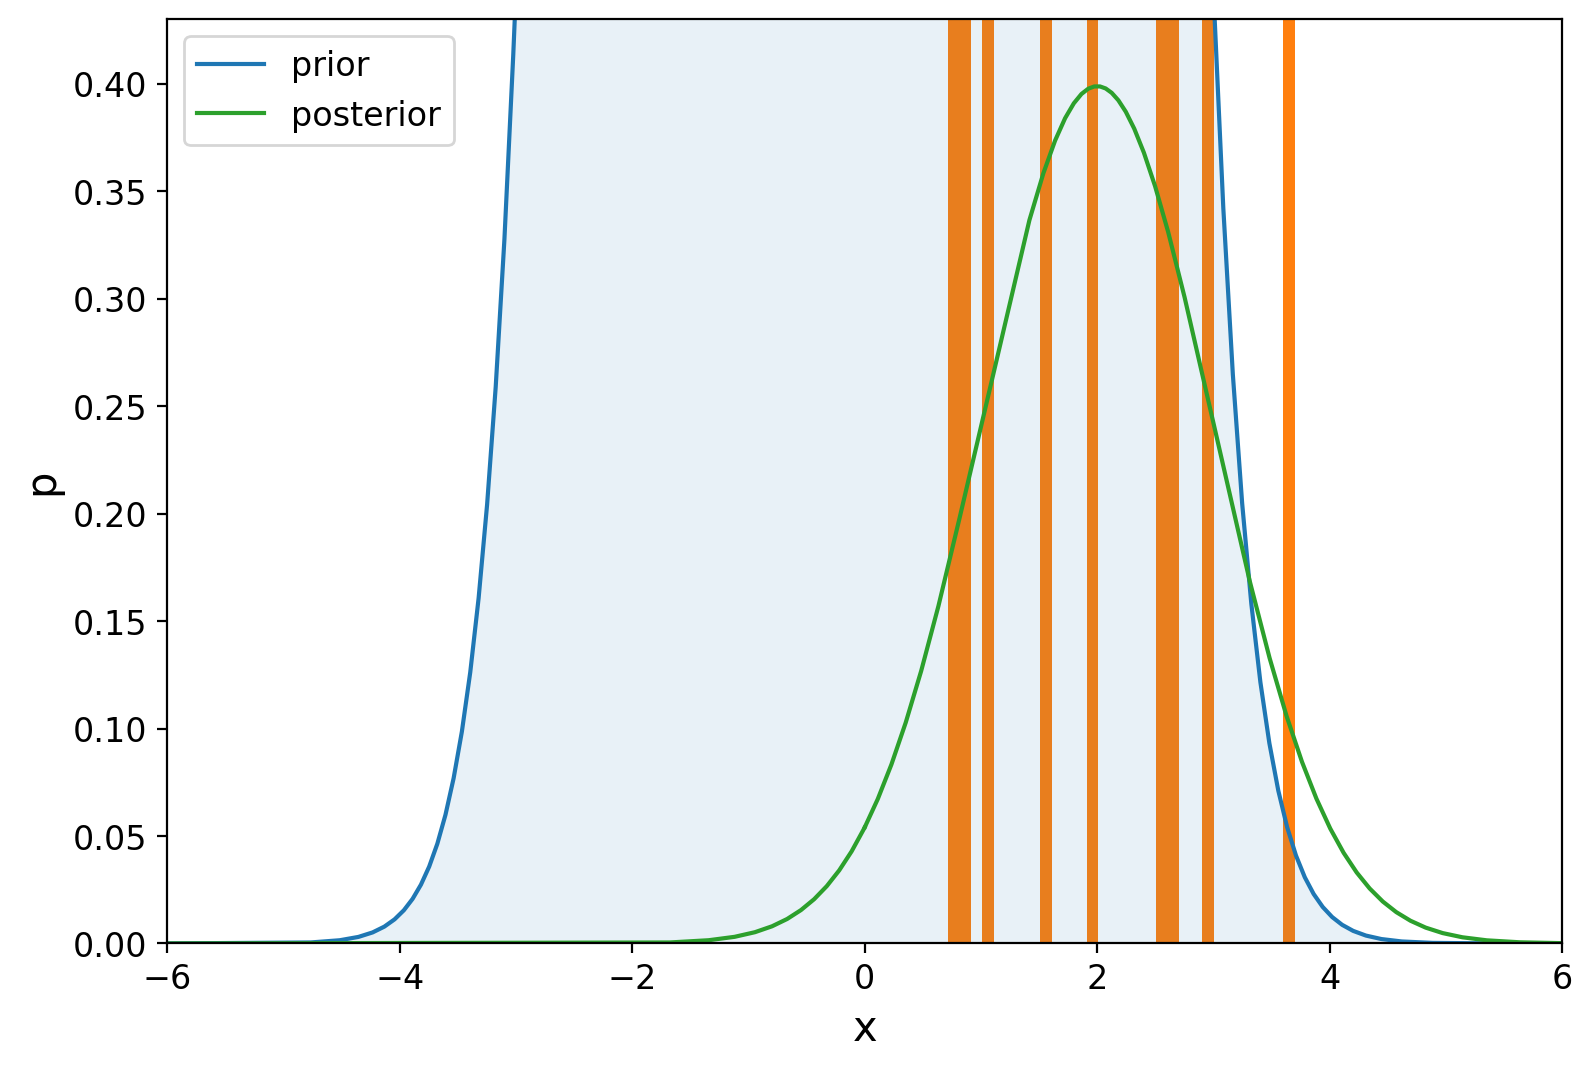

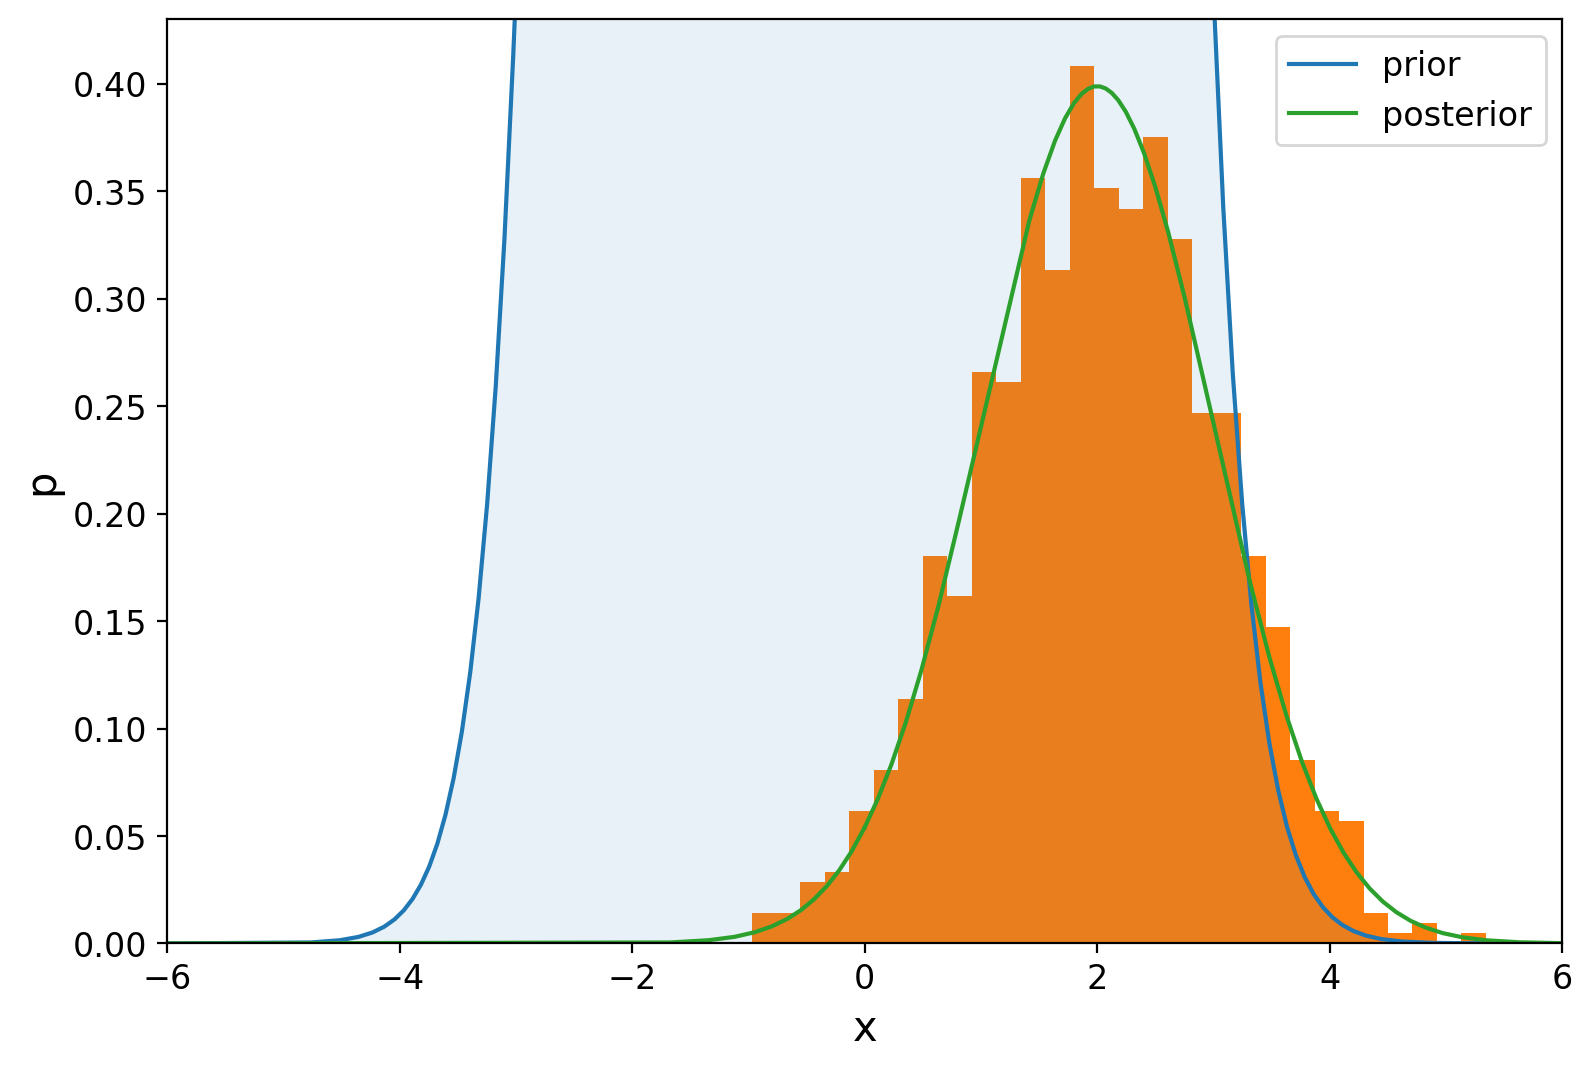

In [6]:

def plotGausSample(iZ,iSample):
    plt.style.use('fast')
    #sample
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    #noral st
    xs,ys=gaus(0,1)
    ys*=100
    fig, ax = plt.subplots(figsize=(9,6))
    ax.plot(xs,ys,label='prior')
    count, bins, ignored = plt.hist(samples, 30, density=True)
    ax.plot(x,y,label='posterior')
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.ylim(0,0.43)
    plt.show()
plotGausSample(2,10)
plotGausSample(2,1000)


When we only have a few events, you can see these events fall into our blue shaded region now. However, if we have a lot of events, it still becomes hard to reconcile these distributions. 

We can more formally summarize this in terms of two statistical philosophies. 

Now we have two results, we have a prior (aka a guess) of what we though the data would look like and a posterior for what we actually observe the data. These two observations yield two different ways to interpret the data. 

**Bayesian** It is possible to create a model of everything and within your model you can explain all random phenomena. As we take more data, we can fine tune our model to be ever more predictive. 

**Frequentist** The data guides our model. We can use what we observe in the data to explain how we will observe these phenomena in the future. 



<a name='section_10_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.2 Bayes Thereom </h2>  




To understand Bayes theorem, lets define a bunch of terms, first we would like the define the probability of a hypothesis happening. We can write this probability as $P\left(\mathcal{H}\right)$, this is the probability of the hypothesis happening given a prior for how we expect the distribution to behave. To put a concrete label to this, lets consider that you are on a game show similar to the "Monty Hall" game show of the 1960s. You have 3 doors and there is a car behind one of the doors. The car is placed randomly, what is your original $P\left(\mathcal{H}\right)$?

\begin{eqnarray}
P(\mathcal{H}=\rm{door~1}) & = & \frac{1}{3} \\
P(\mathcal{H}=\rm{door~2}) & = & \frac{1}{3} \\
P(\mathcal{H}=\rm{door~3}) & = & \frac{1}{3} 
\end{eqnarray}

Now, you are allowed to choose one of the doors. Given that choice, the host will open one of the other doors that you did not choose, which does not have the car. Now everything changes when you open one of the doors. In that instance your knowledge of what happens changes completely since you now have knowledge of what is behind which door. In the case of this, there are two results. The first result is that there is a car behind your door, great! In the second case, you know that the door that was opened is empty. So the question is what do you want to do. Do you want to switch to the other door, or do you want to stay on the door you chose. In the Monty Hall problem, Monty will always mix things up by opening a door that does not have a car, and then asking you to stay with you original choice, or to switch. What do you do? 

Let's define $P\left(\mathcal{D}\right)$ as the probability of an instance of the data happening, and furthemore defining

\begin{eqnarray}
 P\left(\mathcal{H} | \mathcal{D} \right) & = & \rm{probability~of~a~hypothesis~given~data} \\
 P\left(\mathcal{D} | \mathcal{H} \right) & = & \rm{probability~of~data~given~a~hypothesis} \\
\end{eqnarray}

Let's say you choose door 1, and Monty opens door two. We can write down the probability that Monty will open door 2
\begin{eqnarray}
P(\rm{open~2}|\mathcal{H}=\rm{car~at~door~1}) & = & \frac{1}{2} \\
P(\rm{open~2}|\mathcal{H}=\rm{car~at~door~2}) & = & 0 \\
P(\rm{open~2}|\mathcal{H}=\rm{car~at~door~3}) & = & 1 
\end{eqnarray}

If you chose correctly, the first time, then Monty has a 50% chance of choosing door 2 or 3, and both doors will not contain a car. If you did not choose correctly the first time, then Monty will for sure open a specific door, and in this scenario you know for sure that behind the other door that Monty did not choose is the car. So given this perspective do you switch or stay? Lets write out the probabilities again, remember when you start you have a $\frac{1}{3}$ chance of choosing correctly, and a $\frac{2}{3}$ chance of choosing incorrectly. 

\begin{eqnarray}
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) & = & \frac{1}{3} \\
P(\mathcal{H}=\rm{car~at~door~2}|\mathcal{D}=\rm{open~2}) & = & 0 \\
P(\mathcal{H}=\rm{car~at~door~3}|\mathcal{D}=\rm{open~2}) & = & \frac{2}{3}  
\end{eqnarray}

or more generically we can write out:
\begin{equation}
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{P(\mathcal{D}=\rm{open~2}|\mathcal{H}=\rm{car~at~door~1})P(\mathcal{H}=\rm{door~1})}{\rm{all~combinations}}\\
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{\frac{1}{2}\times\frac{1}{3}}{\rm{all~combinations}}
\end{equation}
And for the car at door 2
\begin{equation}
P(\mathcal{H}=\rm{car~at~door~2}|\mathcal{D}=\rm{open~2}) = \frac{P(\mathcal{D}=\rm{open~2}|\mathcal{H}=\rm{car~at~door~2})P(\mathcal{H}=\rm{door~2})}{\rm{all~combinations}}\\
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{0\times\frac{1}{3}}{\rm{all~combinations}}
\end{equation}
And for the car at door 3
\begin{equation}
P(\mathcal{H}=\rm{car~at~door~3}|\mathcal{D}=\rm{open~2}) = \frac{P(\mathcal{D}=\rm{open~2}|\mathcal{H}=\rm{car~at~door~3})P(\mathcal{H}=\rm{door~3})}{\rm{all~combinations}}\\
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{1\times\frac{1}{3}}{\rm{all~combinations}}
\end{equation}

or in other words

\begin{equation}
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{P(\mathcal{D}=\rm{open~2}|\mathcal{H}=\rm{car~at~door~1})P(\mathcal{H}=\rm{door~1})}{P\left(\mathcal{D}=\rm{car~at~door~1}\right)+P\left(\mathcal{D}=\rm{car~at~door~2}\right)+P\left(\mathcal{D}=\rm{car~at~door~3}\right)}\\
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{\frac{1}{2}\times\frac{1}{3}}{1\times\frac{1}{3}+0\times\frac{1}{3}+\frac{1}{2}\times\frac{1}{3}}
\end{equation}

More generically, we can write this as what is known as Bayes theorem
\begin{equation}
 P\left(\mathcal{H} | \mathcal{D} \right) =  \frac{P\left(\mathcal{D} | \mathcal{H} \right)P(\mathcal{H})}{P(\mathcal{D})} 
\end{equation}

We can also relabel these terms as: 
\begin{eqnarray}
 P\left(\mathcal{H} | \mathcal{D} \right) & = & \rm{Posterior} \\
 P\left(\mathcal{D} | \mathcal{H} \right) & = & \rm{Likelihood} \\
 P\left(\mathcal{H} \right) & = & \rm{Prior} \\
 P\left(\mathcal{D} \right) & = & \rm{Normalizer(all~possibilities)} 
\end{eqnarray} 

The Posterior is our observed result, the Prior is our initial guess, the likelihood is what actually we observe, and finally the bottom term, the normalizer, is to ensure that our probabilities integrate to $1$ (aka, we have covered, and only covered, all possibilities).  As a general rule of thumb, the way to remember this is

\begin{equation}
 \rm{posterior} \propto \rm{likelihood} \times \rm{prior}
\end{equation}

Given Bayes theorem, lets go back to our original measurement. In that case, we had two normal distributions, a posterior about two, and a prior about zero. How do we connect these two? 

\begin{equation}
 P\left(\mathcal{H} | \mathcal{D} \right) =  \frac{P\left(\mathcal{D} | \mathcal{H} \right)P(\mathcal{H})}{P(\mathcal{D})} \\
\mathcal{N}(x,\mu=2,1) = \frac{P\left(\mathcal{D} | \mathcal{H} \right)}{P(\mathcal{D})}\mathcal{N}(x,\mu=0,1) \\
P\left(\mathcal{D} | \mathcal{H} \right) = \frac{\mathcal{N}(x,\mu=2,1)}{\mathcal{N}(x,\mu=0,1)} P(\mathcal{D}) 
\end{equation}

Since $P(\mathcal{D})$ is just a constant to ensure that our resulting probability is normalized, we can pretty easily compute the likelihood in our first example. Lets plot it. 


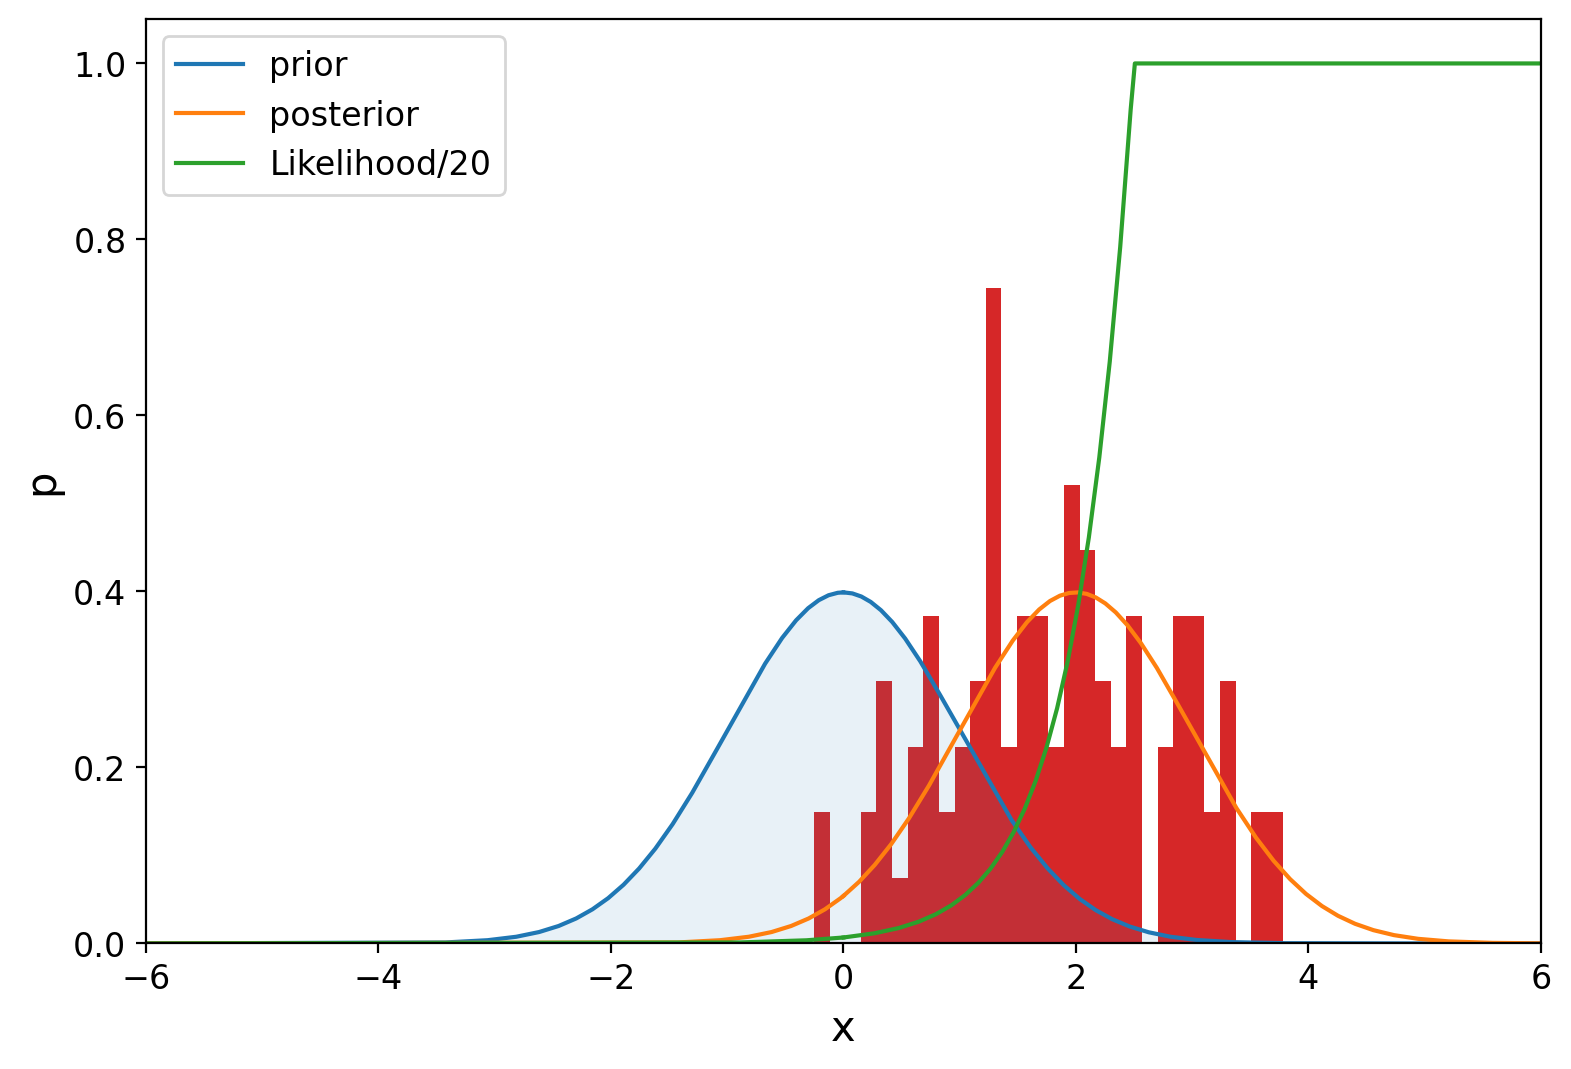

In [17]:
def plotGausSampleLike(iZ,iSample):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    #Sample
    samples = np.random.normal(iZ,1,iSample)
    #posterior
    x,y=gaus(iZ,1)
    #prior
    xs,ys=gaus(0,1)
    #likelihood
    yratio=np.minimum(y/ys/20.,1.)
    #plot
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    ax.plot(x,yratio,label='Likelihood/20')
    count, bins, ignored = plt.hist(samples, 30, density=True)
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()

plotGausSampleLike(2,100)

As you can see the likelihood shoots up, and in fact shoots up above 1, this means that our liklelihood is unphysical, and we are not capturing our physics, or more imporantly, this means that **our prior is wrong**. Whats the right prior in this scenario? 

Lets tweak our prior to have a large sigma $\mathcal{N}(\mu=0,\sigma=2)$

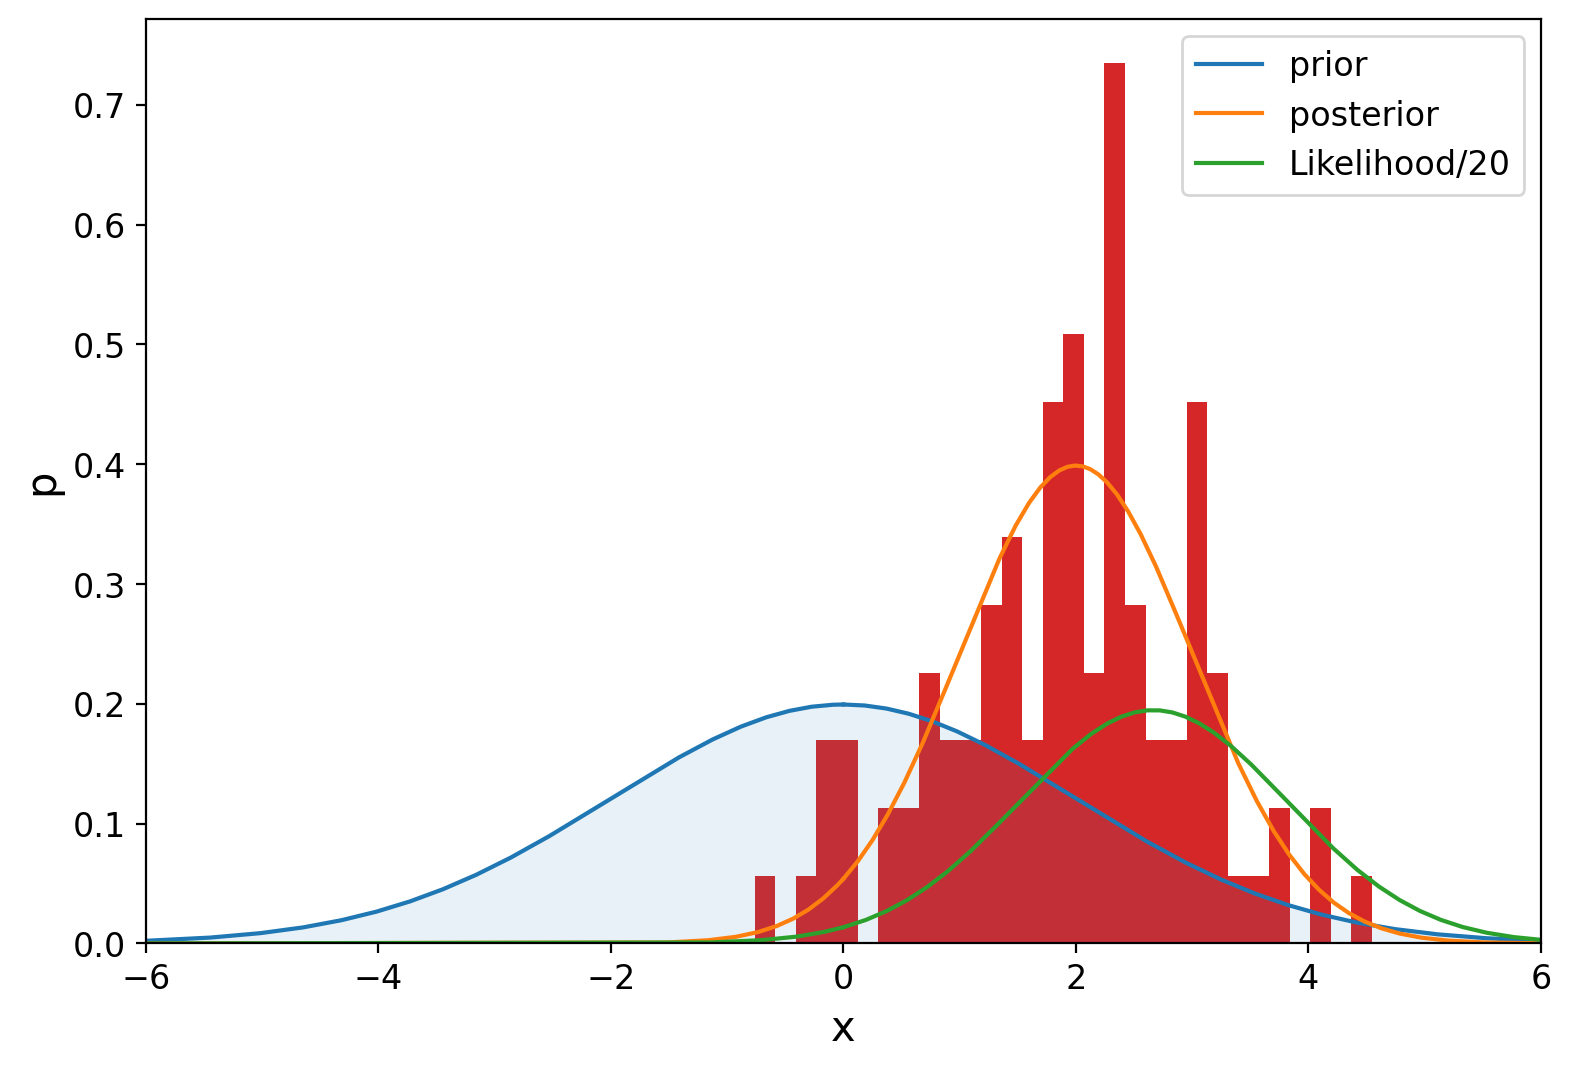

In [18]:
def plotGausSampleLike(iZ,iSample,iSigMax):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    #ample our posterior
    samples = np.random.normal(iZ,1,iSample)
    #Posterior
    x,y=gaus(iZ,1)
    #Sample our prior
    xs,ys=gaus(0,iSigMax) #######<<<<< This is our tweak
    #now compute the likelihood
    yratio=np.minimum(y/ys/20.,20.)
    #pot this stuff
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    ax.plot(x,yratio,label='Likelihood/20')
    count, bins, ignored = plt.hist(samples, 30, density=True)
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()
    #now return our sampled normal distribution
    return samples
    
samples=plotGausSampleLike(2,100,2)

What have we done?  Essentially, we had previously claimed that our measurement was at zero with uncertainty (expected $\sigma$=1). Now what we have done is made the claim that our uncertainty is way larger. What this has done is lowered our likelihood for something observed to happen to some number that is now not insanely large.  

### Challenge question: 

Consider that we have two gaussians one with mean of 0 and one with mean of 0.1, and both have width 1. In one experiment, we sample it 1000 samples, and in another we sample it 1,000,000 times. What is the max likelihood value of all the observed points? What would the case be if we sampled even more (10M...)? What does this mean about the distributions? 

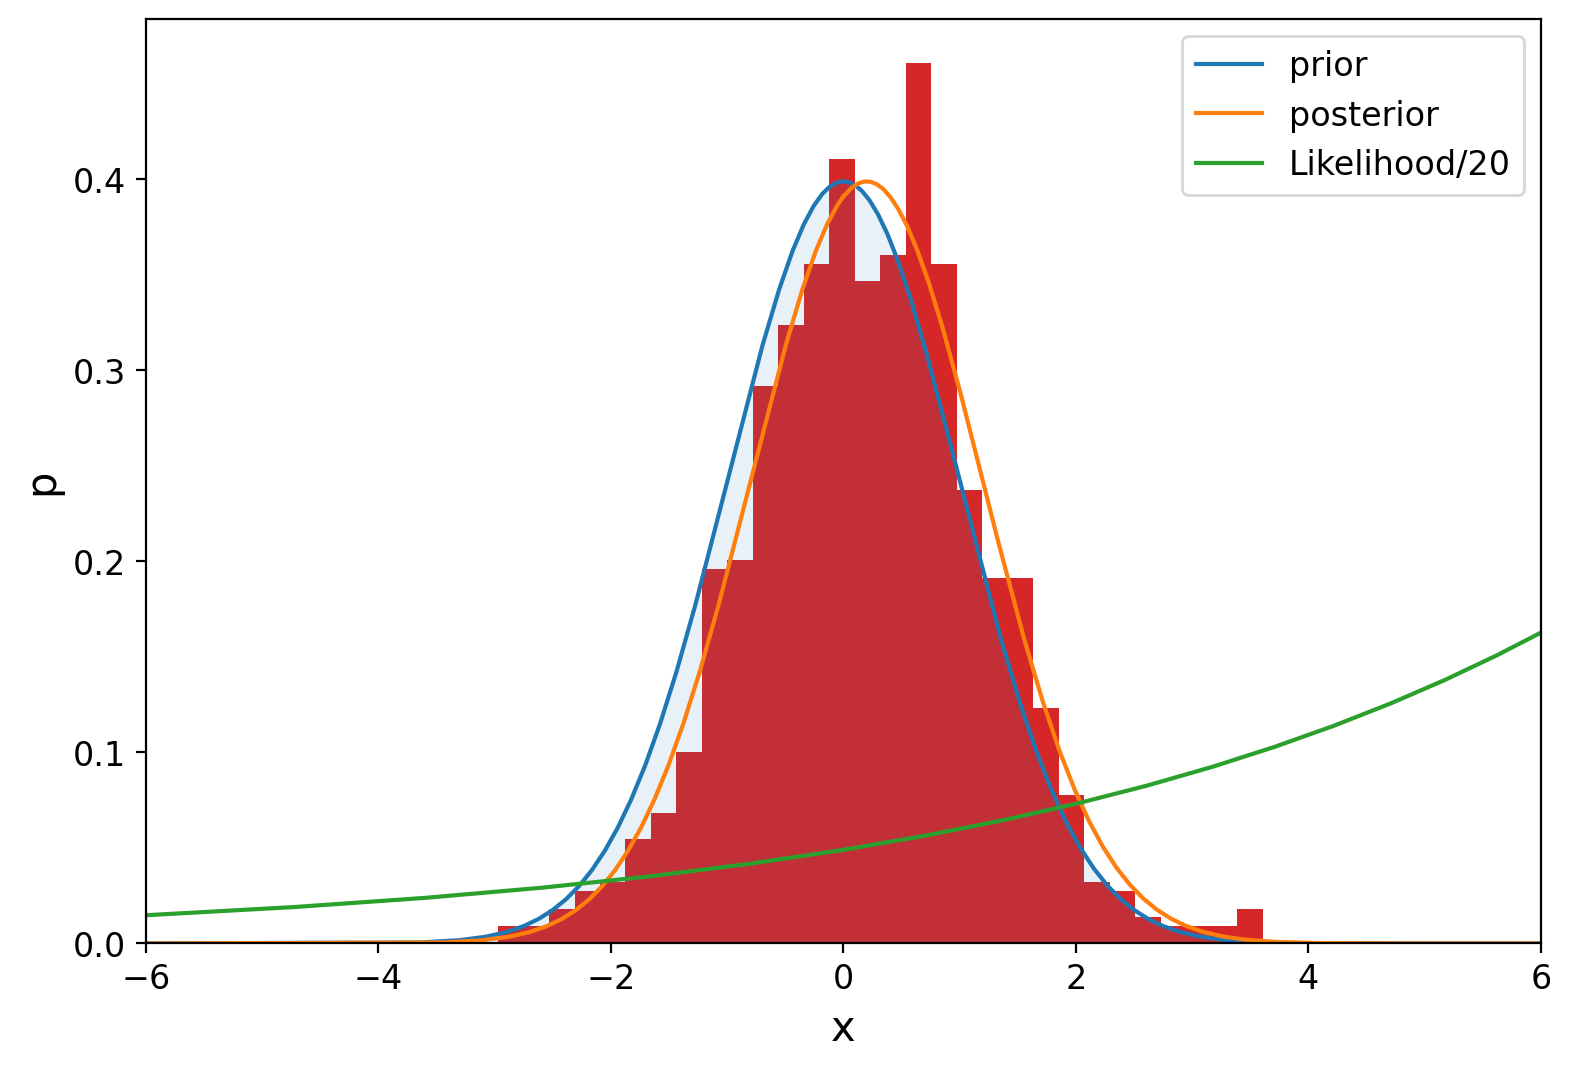

Max: 1000  is  2.0163357675467752


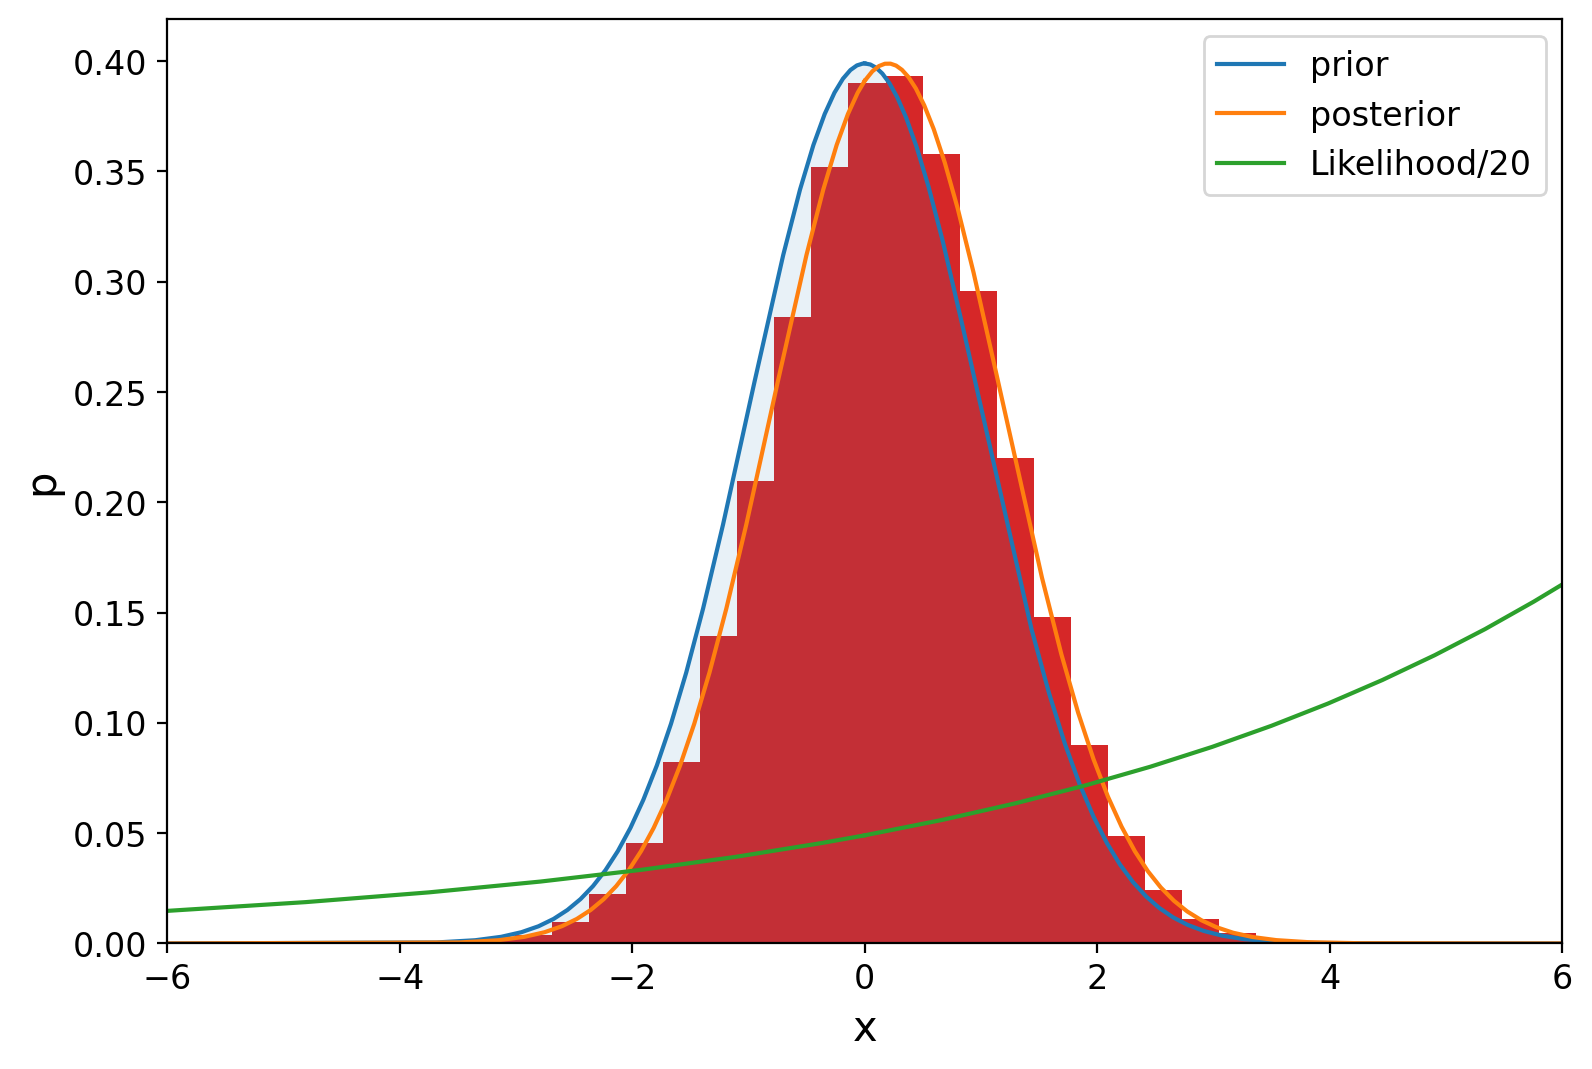

Max: 1000000  is  2.643739177069409


In [19]:
#solution
def maxlikelihood(isamples,mu1=0.2,sig1=1,mu2=0,sig2=1):
    val=np.max(isamples)#compute the highest sampled gaussian
    #now compute the liklihood of these two
    like=stats.norm.pdf(val,mu1,sig1)/stats.norm.pdf(val,mu2,sig2)
    return like

def maxlike(iN):
    samples=plotGausSampleLike(0.2,iN,1)
    like=maxlikelihood(samples)
    print("Max:",iN," is ",like)

maxlike(1000)
maxlike(1000000)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.2.1</span>

The choice of prior can really change your outlook on fittings. Compute the maximum likelihood from 0 to 5 for a posterior gaussian for a Normal distribution centered at 0.5, compared to a prior of a gaussian at 0 and a prior of a flat distribution from -5 to 5.  

/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_96655/2000724855.py:15: RuntimeWarning: divide by zero encountered in divide
  yflatratio=np.minimum(y/yflat,20.)


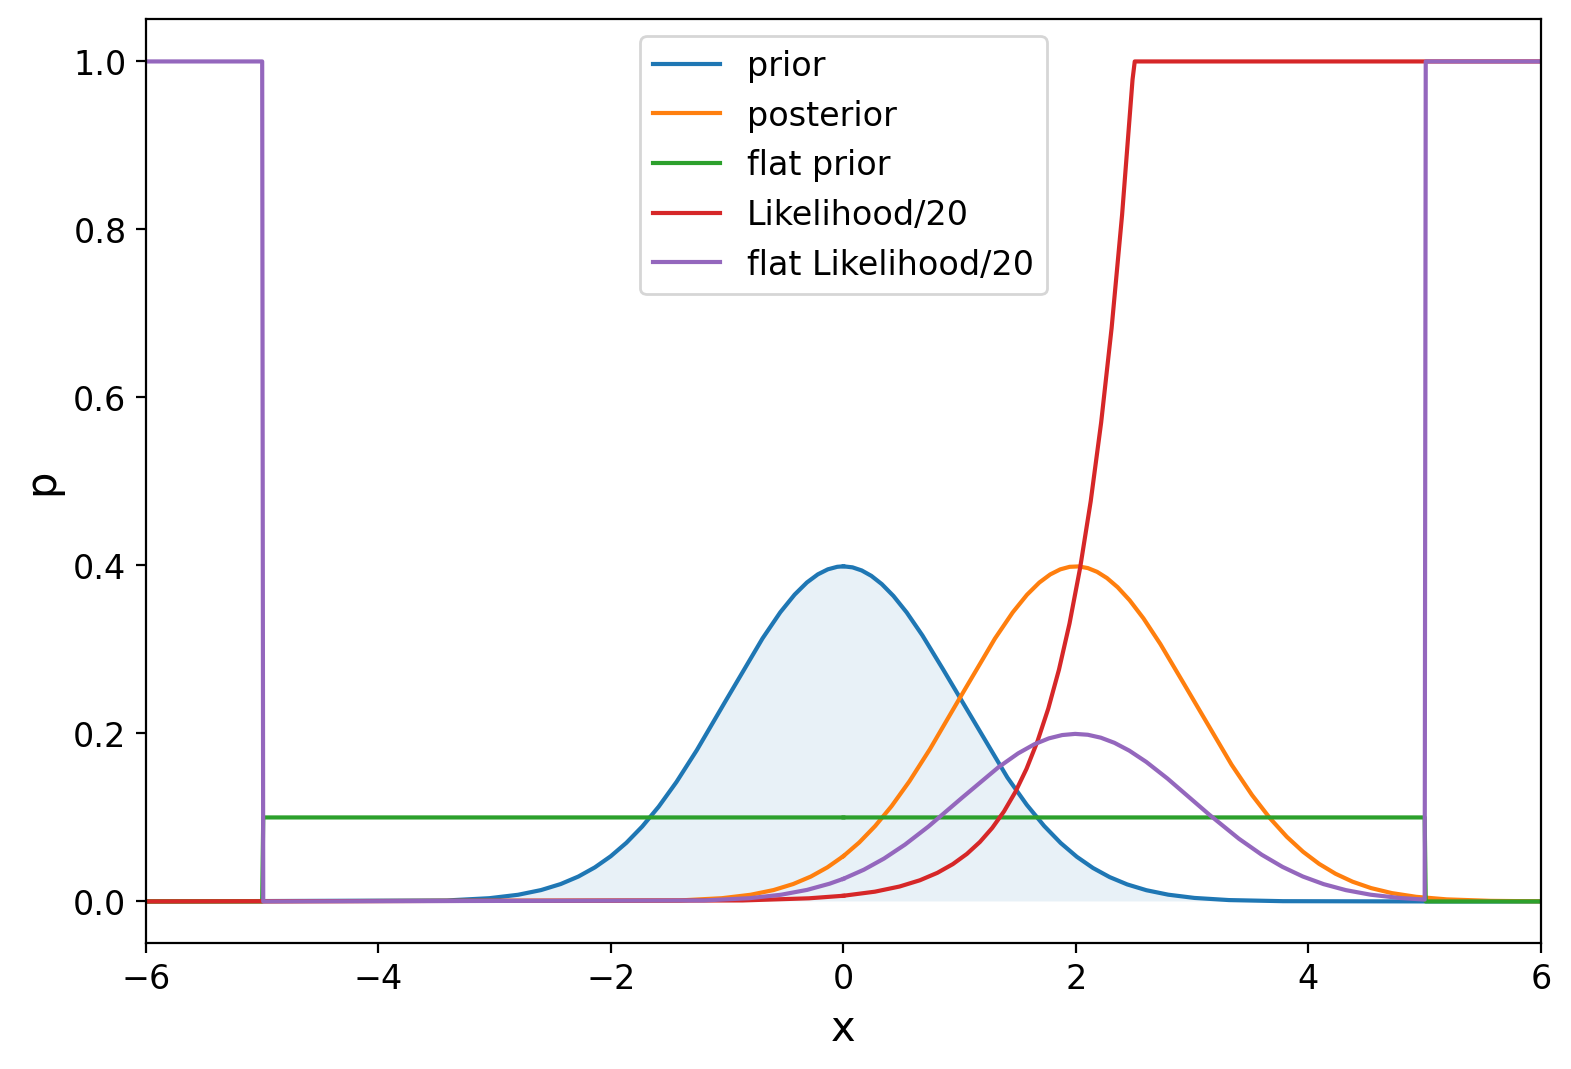

In [20]:
def flat(iX):
    return np.where(iX < 5, np.where(iX < -5, 0, 0.1 ), 0)

def plotGausSampleLike(iPost,iPrior):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    #Base Posterior a function
    x,y=gaus(iPost,1)
    #Flat Prior
    yflat = flat(x)
    #Gaussian prior
    xs,ys=gaus(iPrior,1) #######<<<<< This is our tweak
    #now compute the likelihood
    yratio=np.minimum(y/ys,20.)
    yflatratio=np.minimum(y/yflat,20.)
    #pot this stuff
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    ax.plot(x,yflat,label='flat prior')
    ax.plot(x,yratio/20.,label='Likelihood/20')
    ax.plot(x,yflatratio/20.,label='flat Likelihood/20')
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()
    #now return our sampled normal distribution
    return samples
    
samples=plotGausSampleLike(2,0)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
See code above
</pre>
        
**EXPLANATION:**
    
By taking a flat prior you can see our likelihood ratio doesn't ever skyrocket. This means that the probability ratio is never huge and so we can cover the full parameter space of a different gaussian, even if our prior is off.  
    
</div>

<a name='section_10_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.3 Bayesian vs Frequentists</h2>  



Now, this interpretation all comes to a head when we start to think about how we wish to quote our results. If our priors are incorrect, and we continue to progressively take data, at some point our priors are going to be wrong. Dealing with how this is wrong depends on what sort of statistician you are.  Here is a diagram to explain. 

![diagram](bayes_freq.png)

**Frequentist** If I see a data distribution, I can come up with a way to fit it. By getting a good fit, I can explain the next result. 

**Bayesian** I start with a model, by taking more and more measurements, I can improve my model. 

To try to capture these ideas, lets fit this guassian with two separate approaches. 

/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_96655/496686532.py:10: RuntimeWarning: divide by zero encountered in divide
  weight=1./np.sqrt(count)


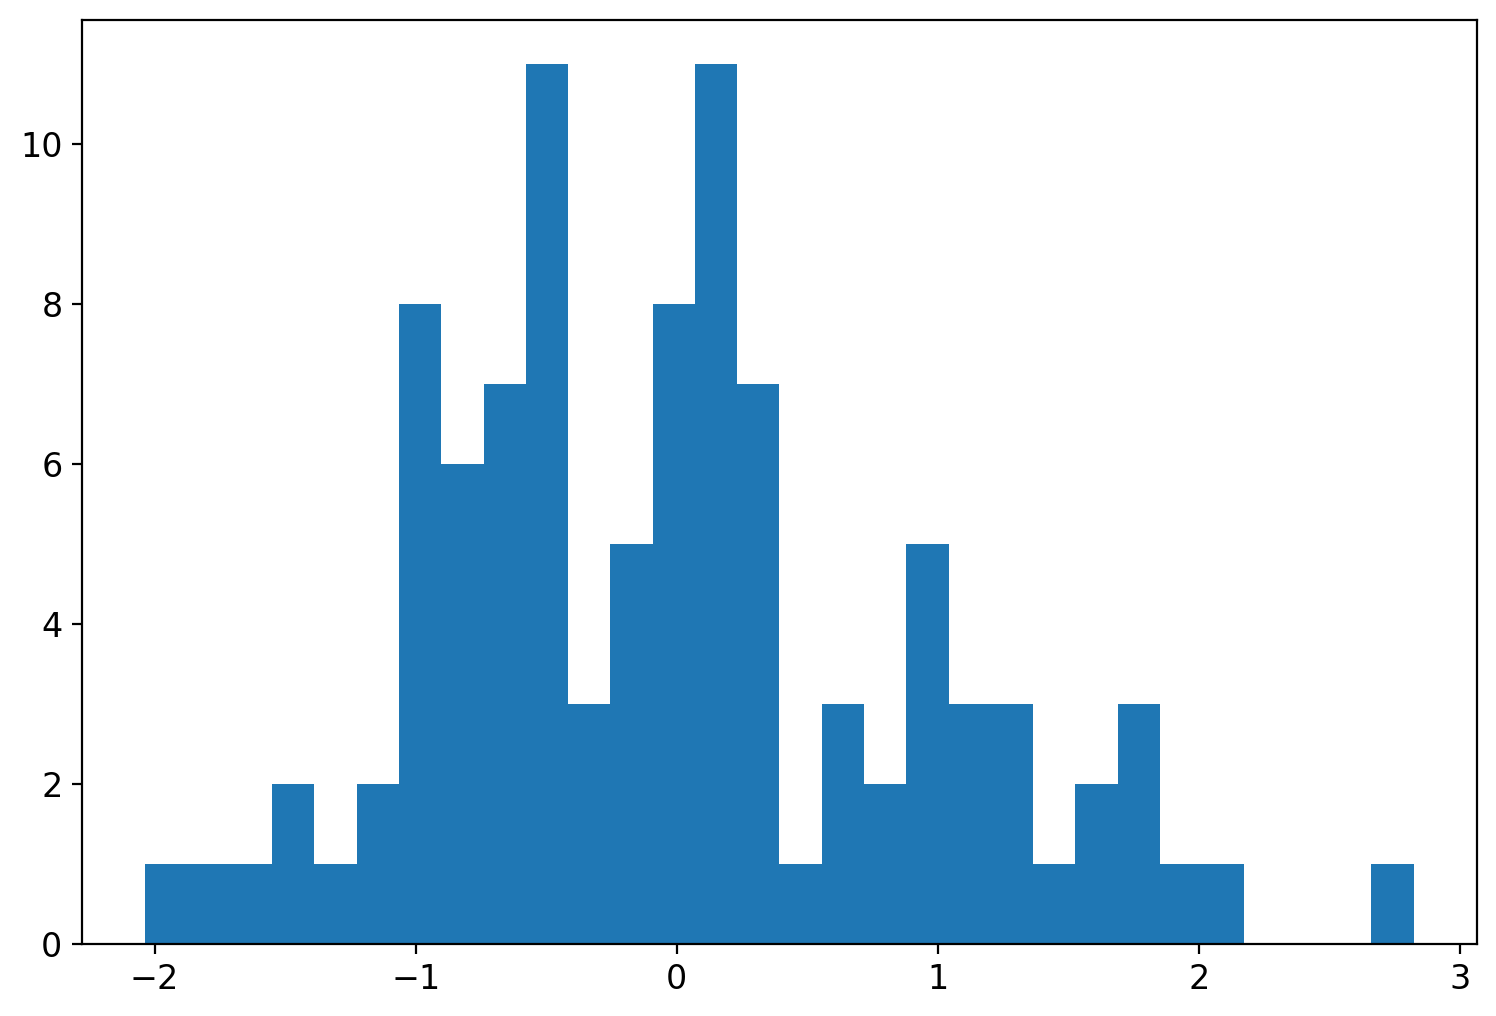

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 85
    # data points      = 30
    # variables        = 3
    chi-square         = 32.9269435
    reduced chi-square = 1.21951643
    Akaike info crit   = 8.79281677
    Bayesian info crit = 12.9964089
    R-squared          = 0.88671923
[[Variables]]
    amplitude:  11.4451772 +/- 1.60482354 (14.02%) (init = 1)
    center:    -0.08240571 +/- 0.16739653 (203.14%) (init = 2)
    sigma:      1.07840136 +/- 0.17816552 (16.52%) (init = 1)
    fwhm:       2.53944109 +/- 0.41954773 (16.52%) == '2.3548200*sigma'
    height:     4.23401293 +/- 0.78543532 (18.55%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.271
    C(center, sigma)    = 0.113
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 30
    # variables        = 1
    c

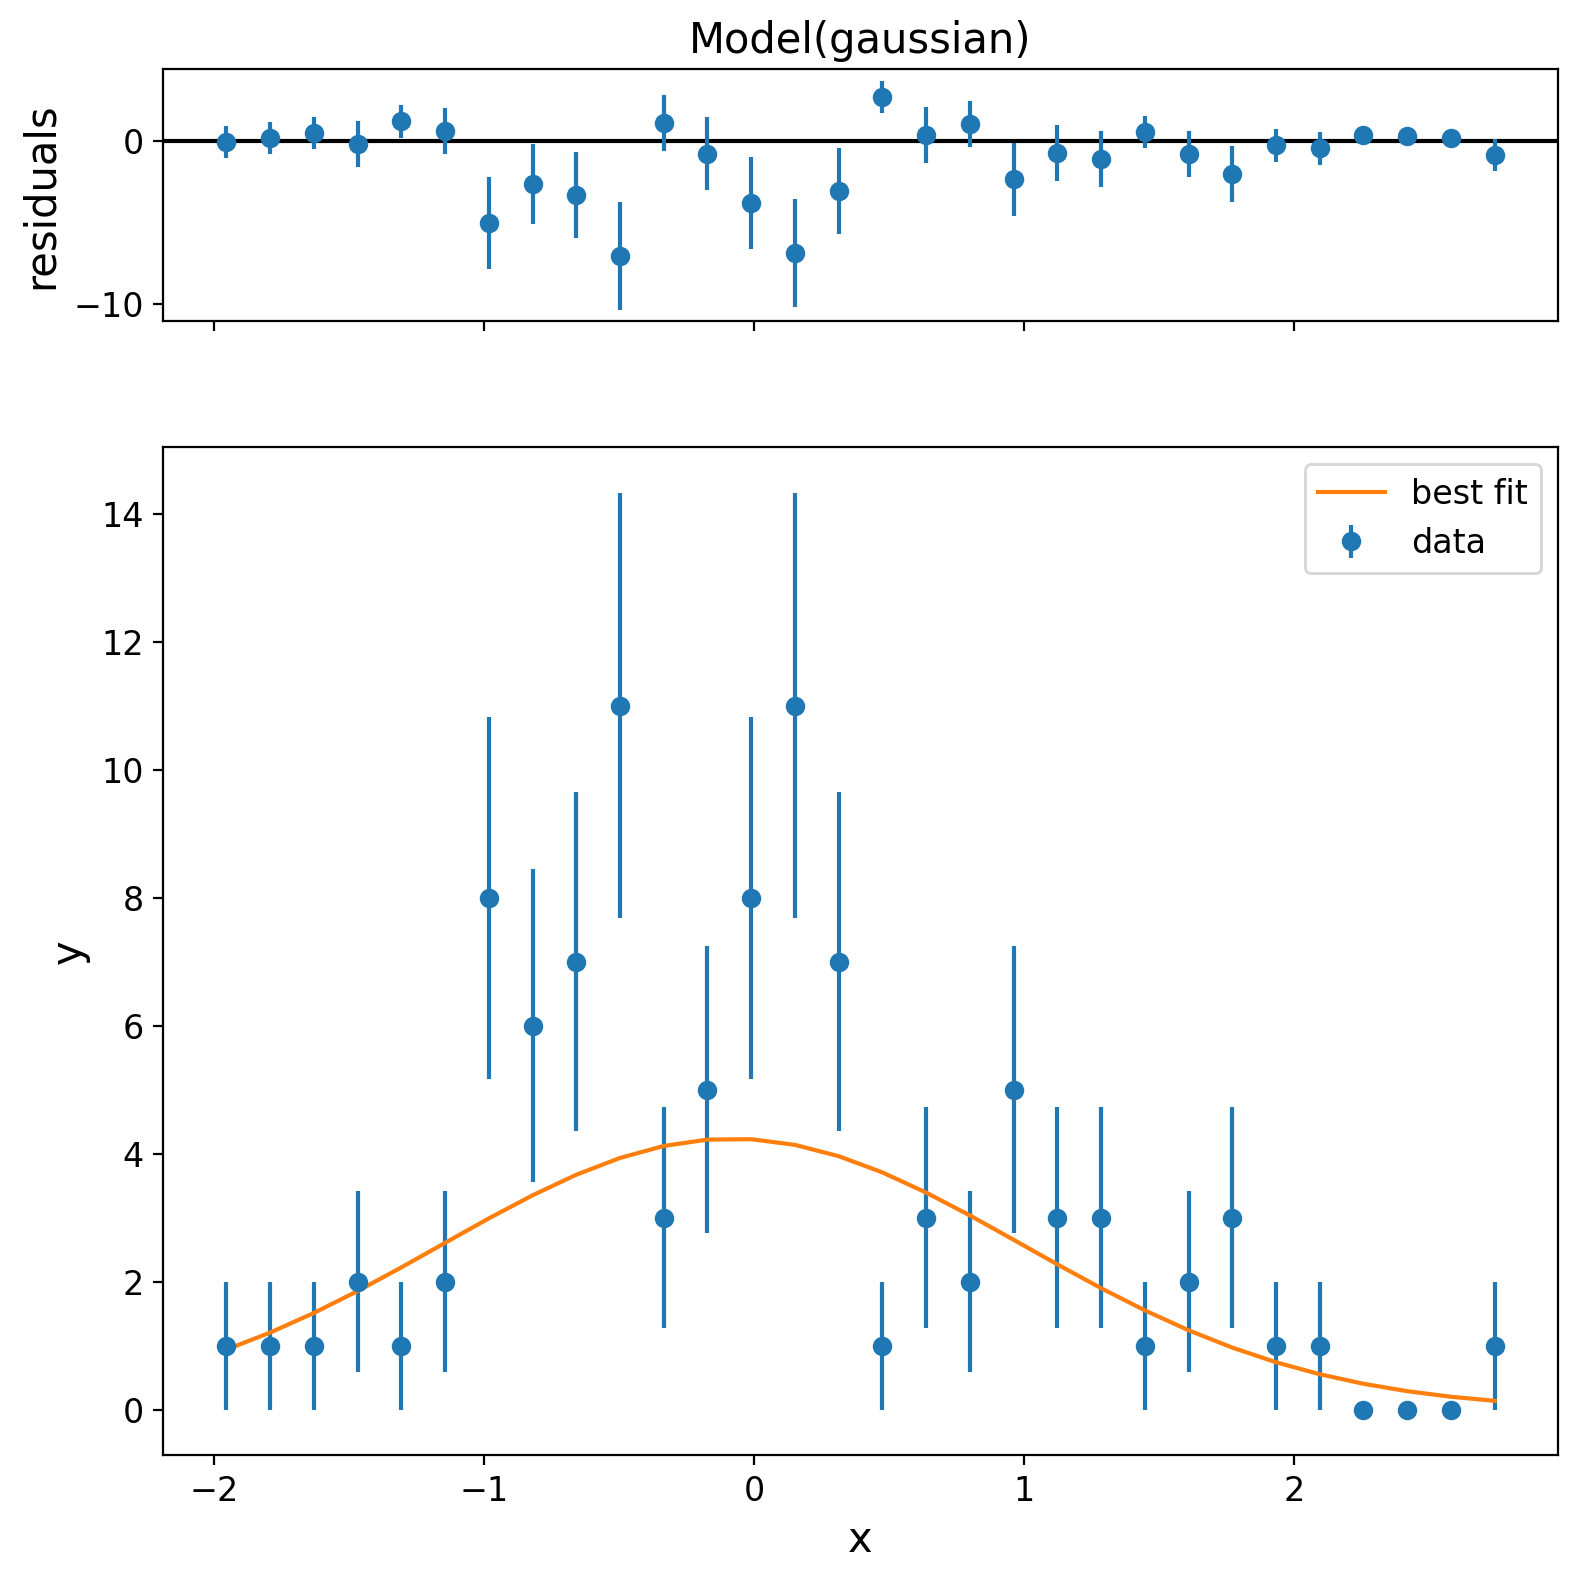

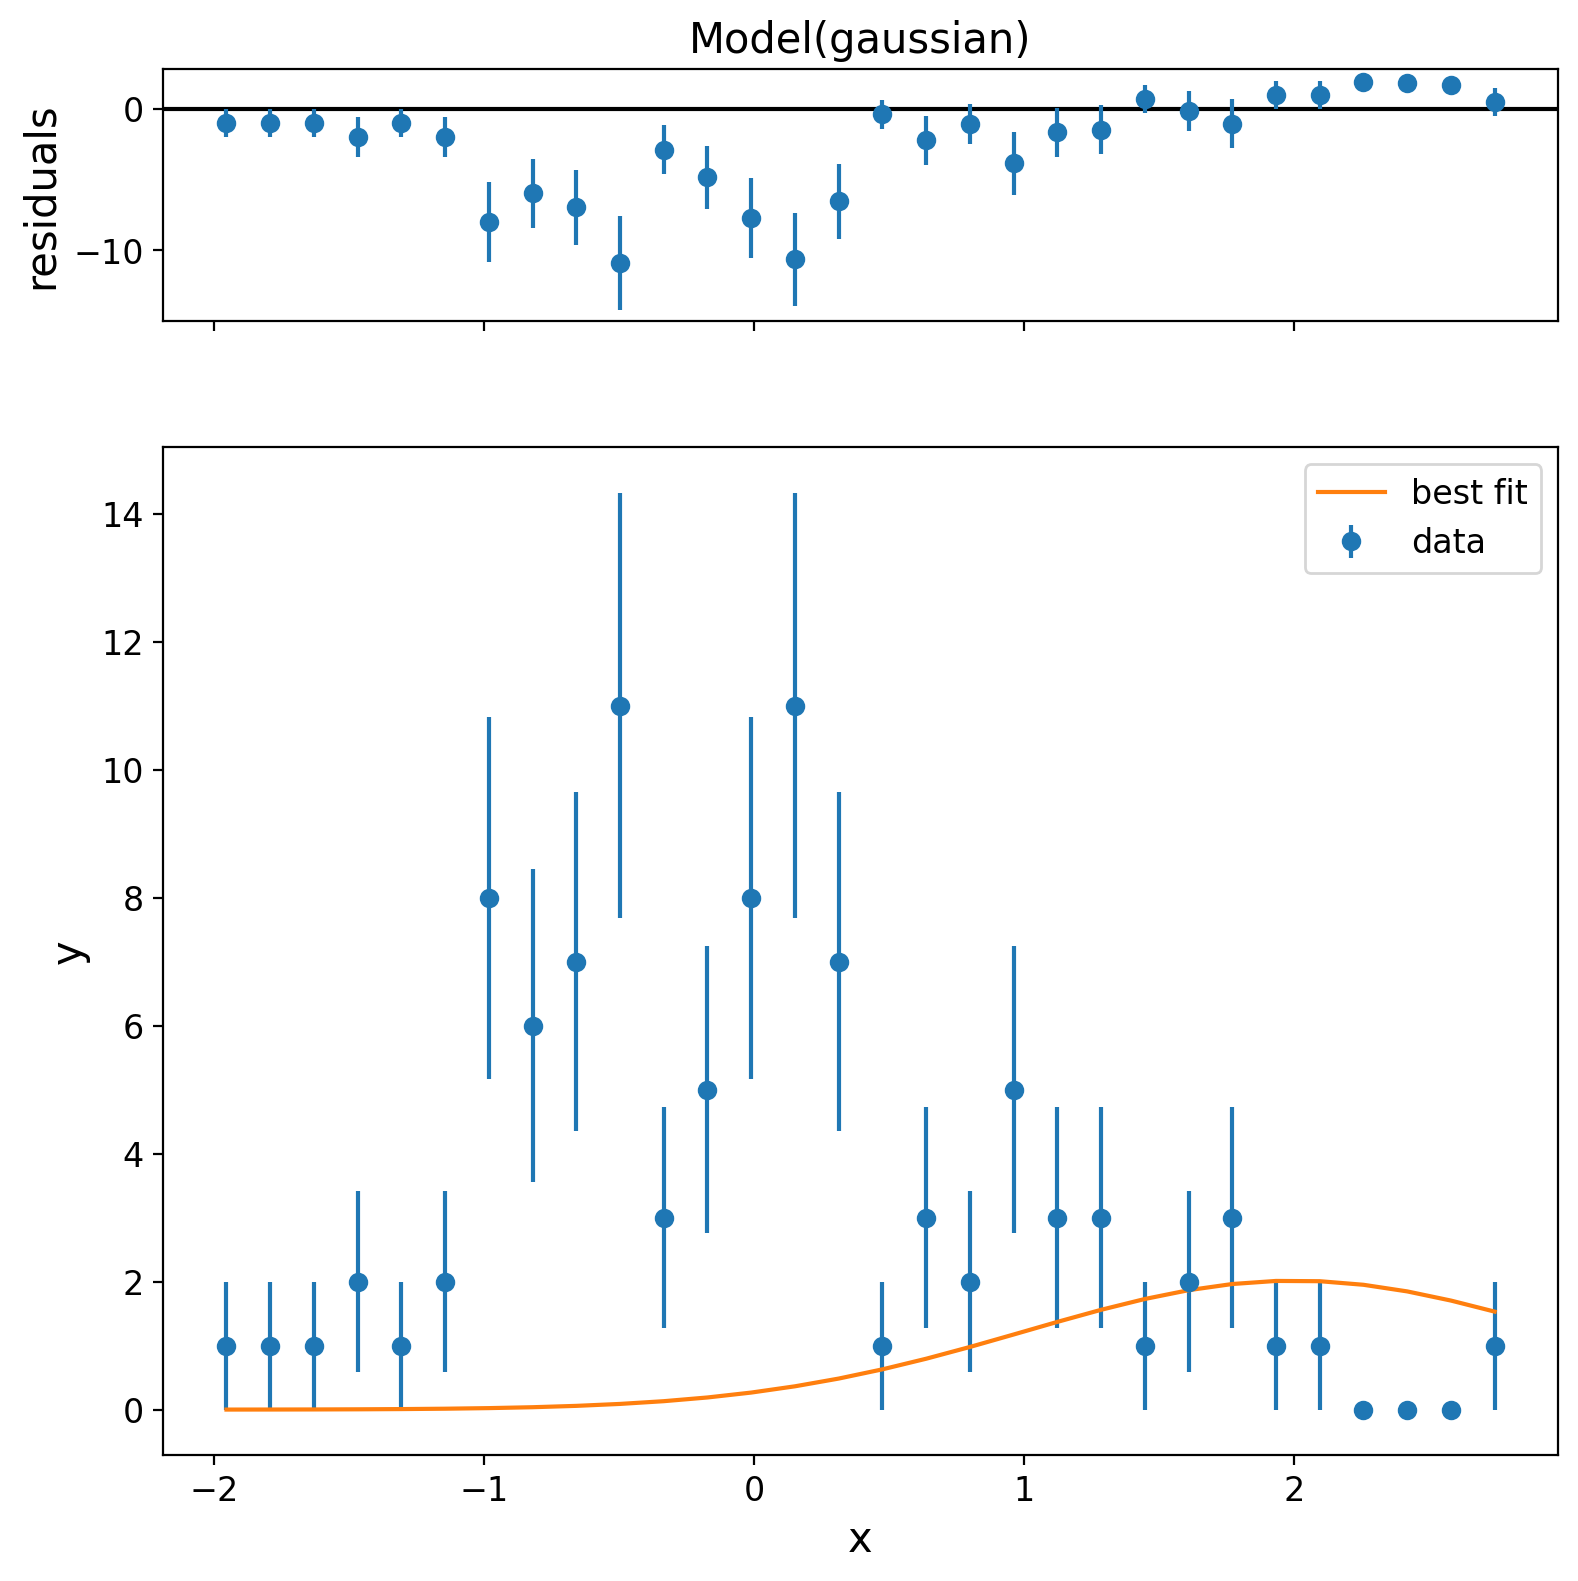

In [23]:
#with Bayesian, we hypothesize a guassian and fit it
from lmfit.models import GaussianModel
#randomly sample 100 events froma. gaussian
lN=100
samples = np.random.normal(0,1,lN)
#make a histogram
count, bins, ignored = plt.hist(samples,30)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
#poisson unc.
weight=1./np.sqrt(count)
weight[weight==float('+inf')] = 0
plt.show()

#Now we can consider two ways to interpret the data
def frequentist(iBins,iCount,weight): #fit a gaussian float all parameters
    model = GaussianModel()
    params = model.make_params(center=2, amplitude=1, sigma=1) 
    result = model.fit(iCount, params, x=iBins,weights=weight)
    result.plot()
    print(result.fit_report())
    
def bayesianBad(iBins,iCount,weight):#fit a gaussian fix the mean and sgima
    model = GaussianModel()
    params = model.make_params(center=2, amplitude=1, sigma=1) 
    params['center'].vary=False
    params['sigma'].vary=False
    result = model.fit(iCount, params, x=iBins,weights=weight)
    result.plot()
    print(result.fit_report())

frequentist(binscenters,count,weight)
bayesianBad(binscenters,count,weight)

From above, what you see is that if we have a sample data, in the frequentist scenario, we just fit this distribution, and extract the parameters. In the frequentist approach, the data is key, and so if our $\chi^{2}$ is good for our fitted model, we can declare success. 

In the Bayesian approach, we need to reconcile our prior with our fitted data. If our prior is that our data should behave as a gaussian about two, and we try to fit it to the data, you see there is not a very good $\chi^{2}$ value, and the fit is clearly off. 

To reconcile our Bayesian fit, what we need to do is modify our model so that we can actually go from our prior to our fitted function. To do this, we need to insert a new prior. In this case, our prior will be that the mean of the Gaussian can vary. Let's write this down. 

\begin{eqnarray}
 P\left(\mathcal{H}=x\right|\mu,\sigma) & = & \mathcal{N}(x,\mu=2,\sigma=1) \\
 P\left(\mathcal{H}=\mu\right|\sigma) & = & \frac{1}{b-a}~\forall~\mu~\in~[a,b] \\ 
                               & = & 0~~~~~~~~~\forall~\mu~\notin~[a,b]
\end{eqnarray}
All that we are saying above is that mu can now vary between a and b. Lets now fit the data with this statement. To do this, we are going to use a new feature in `lmfit`. What we are aroing to do is call `lmfit.minimize` and feed it a modified loss, which we define as `resid` (aka the residual function).

Additionally, we will add another constraint and put it into the fit. In particular, we will add a paramater $\Delta_{\mu}$, such that the loss and $\mu$ will be written as: 
\begin{eqnarray}
\mu_{\rm new} & = & \mu -\Delta_{\mu} \\
\mathcal{L}_{\rm new} & = & \mathcal{L} + 0~\forall~\Delta_{\mu}~\in~[a,b] \\ 
                      & = & \mathcal{L} + \infty~\forall~\Delta_{\mu}~\notin~[a,b] 
\end{eqnarray}
In this case, we will just use a really large number to denote infinity. 

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 94
    # data points      = 31
    # variables        = 2
    chi-square         = 69.2014698
    reduced chi-square = 2.38625758
    Akaike info crit   = 28.8940818
    Bayesian info crit = 31.7620562
[[Variables]]
    amplitude:  1.51090651 +/- 0.72223455 (47.80%) (init = 1)
    center:     2 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     0.60276452 +/- 0.28812991 (47.80%) == '0.3989423*amplitude/max(1e-15, sigma)'
    deltamu:    0.99999987 +/- 0.74080816 (74.08%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, deltamu) = 0.222


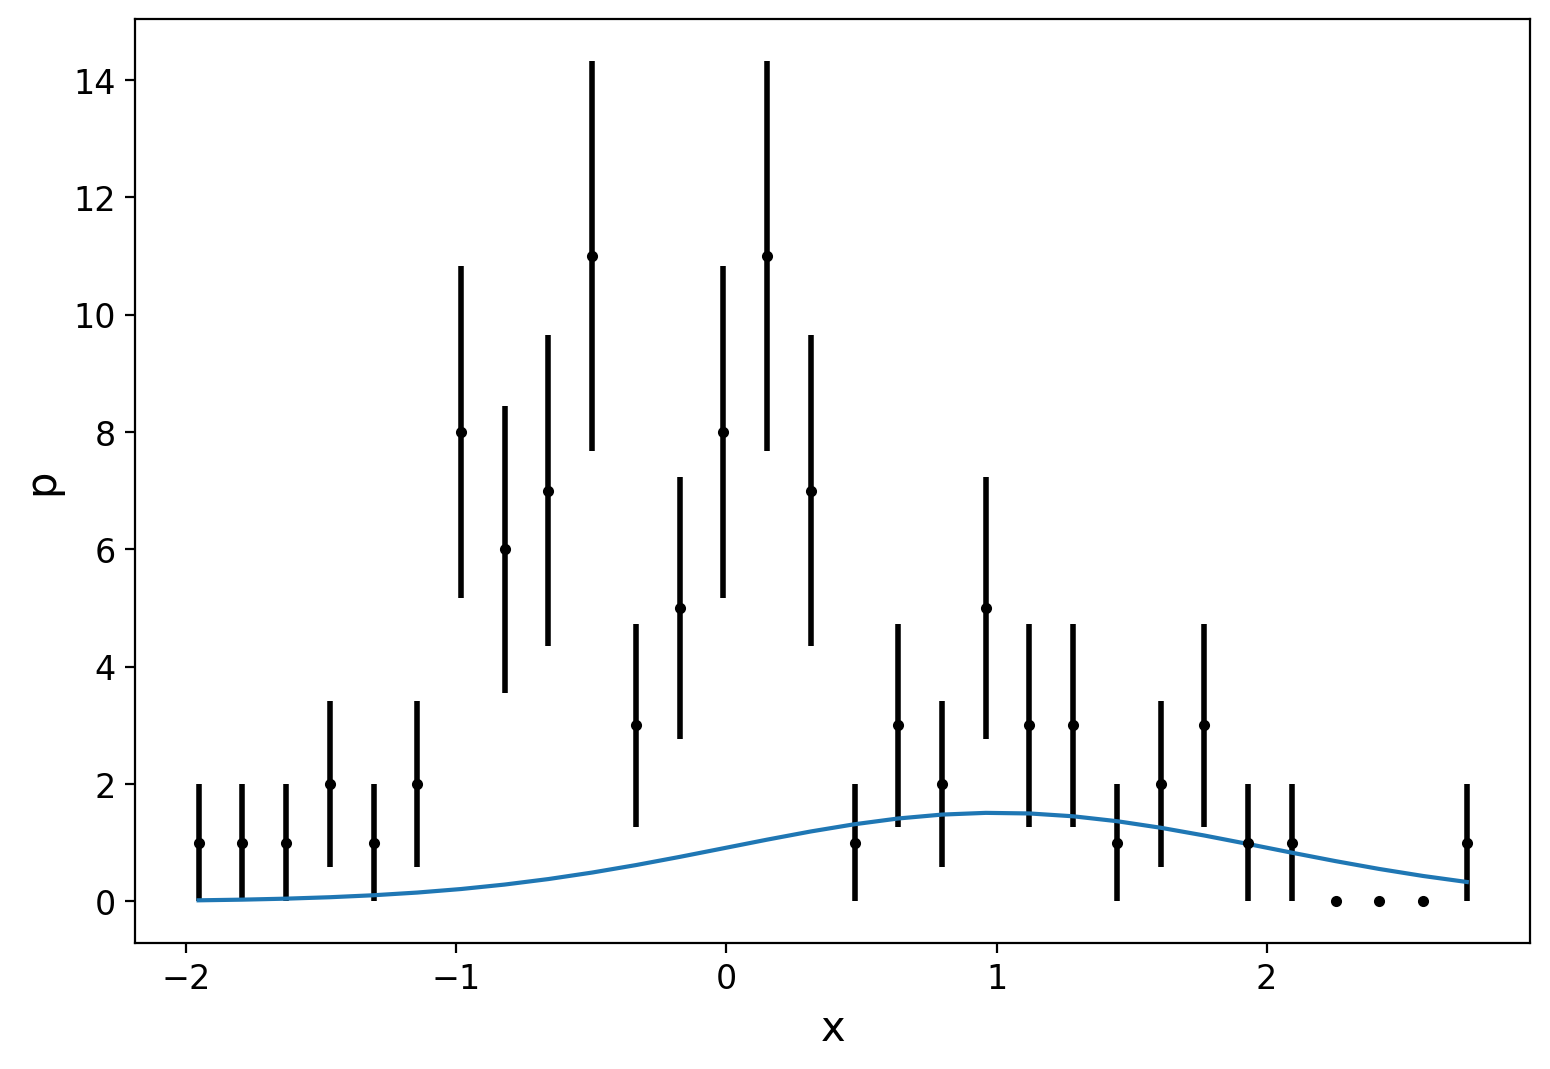

In [27]:
import lmfit
#here is our modified function
def gauss(x, amp, mu, sigma,dmu):
    return amp * np.exp(-(x-mu+dmu)**2 / (2.*sigma**2))

#now we define our loss we want to minimize
def resid(params, x, ydata,weights):
    mu    = params['center'].value
    sigma = params['sigma'].value
    amp   = params['amplitude'].value
    dmu   = params['deltamu'].value
    lossshift=0
    if abs(dmu) > 1:
        lossshift=1e32
    y_model= gauss(x,amp,mu,sigma,dmu)
    residarr = (y_model - ydata)*weights
    #now append our constraint to the loss
    residarr = np.append(residarr,lossshift)
    return residarr
    
def bayesianGood(iBins,iCount,weights):
    model = GaussianModel()
    params = model.make_params(center=2, amplitude=1, sigma=1) 
    params['center'].vary=False
    params['sigma'].vary=False
    params.add("deltamu", value=0.0, min=-10, max=10) #Our new line of code
    result = lmfit.minimize(resid, params, args=(iBins, iCount,weights))
    lmfit.report_fit(result)
    #Now we plot it. 
    plt.errorbar(iBins, iCount,np.sqrt(iCount), lw=2,fmt=".k", capsize=0)
    plt.plot(binscenters,gauss(binscenters,result.params['amplitude'].value,result.params['center'].value,result.params['sigma'].value,result.params['deltamu'].value))
    plt.xlabel("x")
    plt.ylabel("p")
    plt.show()

bayesianGood(binscenters,count,weight)



<a name='section_10_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.4 Nuisance Parameters</h2>  



Now we get a good fit! However, you might be annoyed, we have now added a parameter. This parameter is often referred to as a [nusiance parameter](https://en.wikipedia.org/wiki/Nuisance_parameter), since its a way to incorporate uncertainty of known parameters into the fit. In order to describe our known uncertainty we modified our loss so that once we are out of our parameter range the loss goes to infinity. This is rather unphysical way to modify our parameters. 

In practice, we tend to add parameters where we know somthing about it. What if for example, we have a different model for the behavior of $\mu$. For example, 

\begin{eqnarray}
 P\left(\mathcal{H}=\mu\right|\sigma) & = & \mathcal{N}(\mu,\mu=2,\sigma_{\mu}=0.15) \\   \end{eqnarray}

What this means is that $\mu$ can vary as a gaussian about $2$ with an uncertainty of $\sigma_{\mu}=0.15$. What we can then do is again add a new parameter $\Delta_{\mu}$, however in this case, we need to modify the loss so that $\Delta_{\mu}$ can only vary as gaussian about 0 (its 0 b/c we are fixing $\mu$ to be 2, but floating $\Delta_{\mu}$. 

The modified loss can be written noting that loss is $-\log($Likelihood$)$, thus: 
\begin{equation}
 \log(P) = \log\left(\mathcal{N}(\Delta_{\mu},\mu=0,\sigma=1)\right)\\
 -\log(P) = -\log\left(\frac{1}{\sqrt{2\pi\sigma^{2}}} \exp\left(-\frac{\Delta_{\mu}^2}{2\sigma_{\mu}^{2}}\right) \right) \\
 -\log(P) = -\log(C) + \left(\frac{\Delta_{\mu}^2}{2\sigma_{\mu}^{2}}\right)
\end{equation}

Where $C$ is a constant that we don't care about when minimizing. As a consequence, we can write the modified loss as, and $\Delta_{\mu}$ definition as:

\begin{eqnarray}
\mu_{\rm new} & = & \mu -\Delta_{\mu} \\
\mathcal{L}_{\rm new} & = & \mathcal{L} + \left(\frac{\Delta_{\mu}^2}{2\sigma_{\mu}^{2}}\right)  
\end{eqnarray}

Now lets perform the fit, again and see how we do. Note, that ``lmfit`` when it computes resid, does not square the difference, it computes the signed residual, so we have to be careful to take that into account. 


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 31
    # variables        = 2
    chi-square         = 77.5153074
    reduced chi-square = 2.67294163
    Akaike info crit   = 32.4111350
    Bayesian info crit = 35.2791095
[[Variables]]
    amplitude:  2.26954015 +/- 0.71666992 (31.58%) (init = 1)
    center:     2 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     0.90541557 +/- 0.28590994 (31.58%) == '0.3989423*amplitude/max(1e-15, sigma)'
    deltamu:    0.44138894 +/- 0.29468192 (66.76%) (init = 0)


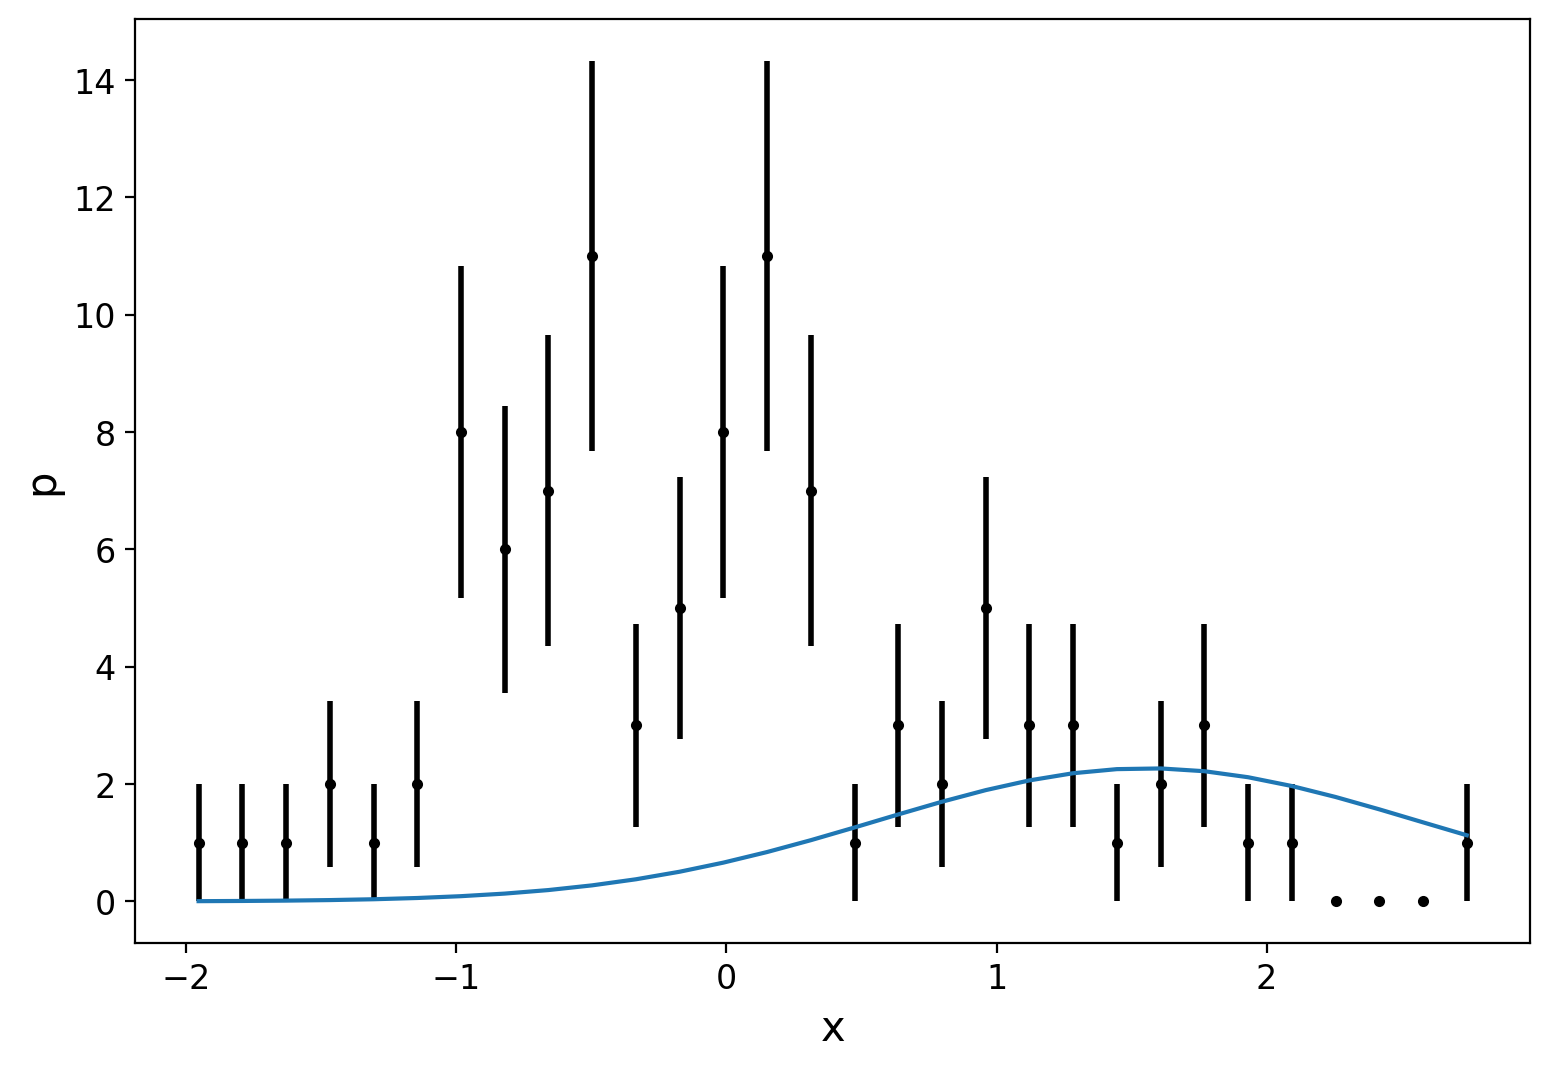

In [32]:
def resid(params, x, ydata,weights):
    mu    = params['center'].value
    sigma = params['sigma'].value
    amp   = params['amplitude'].value
    dmu   = params['deltamu'].value
    #modified loss
    sigmamu=0.15
    lossshift=dmu/sigmamu/np.sqrt(2)
    #original loss
    y_model= gauss(x,amp,mu,sigma,dmu)
    residarr = (y_model - ydata)*weights
    #now add the modified loss
    residarr = np.append(residarr,lossshift)
    return residarr

bayesianGood(binscenters,count,weight)

So now the parameter $\Delta_{\mu}$ can move a little bit, but it doesn't really reconcile the fit. If the $\chi^{2}$ is bad then this is a sign that maybe your model is not great, or maybe your uncertainty on $\mu$ (aka $\sigma_{\mu}$) is just too small. 

Now, going back to our original statistical interpretation. Is this bayesian? or is it Frequentists? 

From the above it seems that such an approach is Bayesian. However, the nuisance is now used to profile the data, and yield a better more constrained posterior. So in some other sense we are using the data. In practice, we refer to this as a hybrid approach. Since we are building a Bayesian model, but relying on the data to really get a good fit. To understand this more, lets do a quick challenge question. 

### Challenge Question: 

Take the above distribtuion, which was for 100 events and run the fit now for 1000 events. What happens to the nuisance parameter, and the fit? 


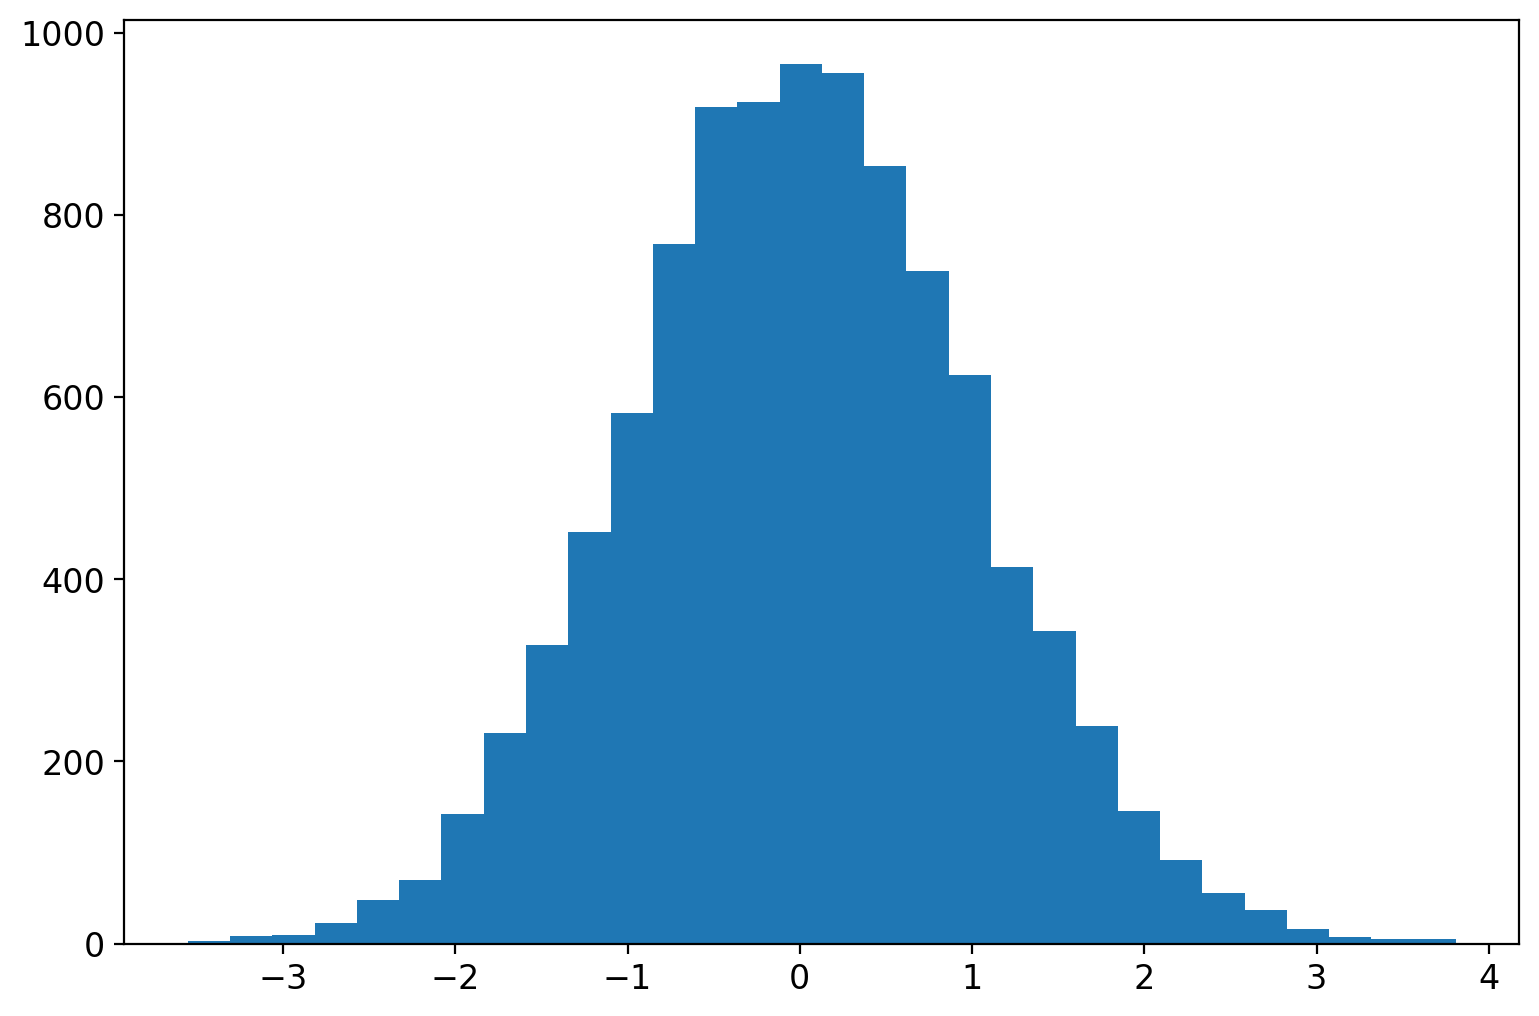

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 31
    # variables        = 2
    chi-square         = 115.031781
    reduced chi-square = 3.96661314
    Akaike info crit   = 44.6478585
    Bayesian info crit = 47.5158330
[[Variables]]
    amplitude:  976.701358 +/- 19.4798746 (1.99%) (init = 1)
    center:     2 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     389.647486 +/- 7.77134599 (1.99%) == '0.3989423*amplitude/max(1e-15, sigma)'
    deltamu:    1.97868558 +/- 0.02004330 (1.01%) (init = 0)


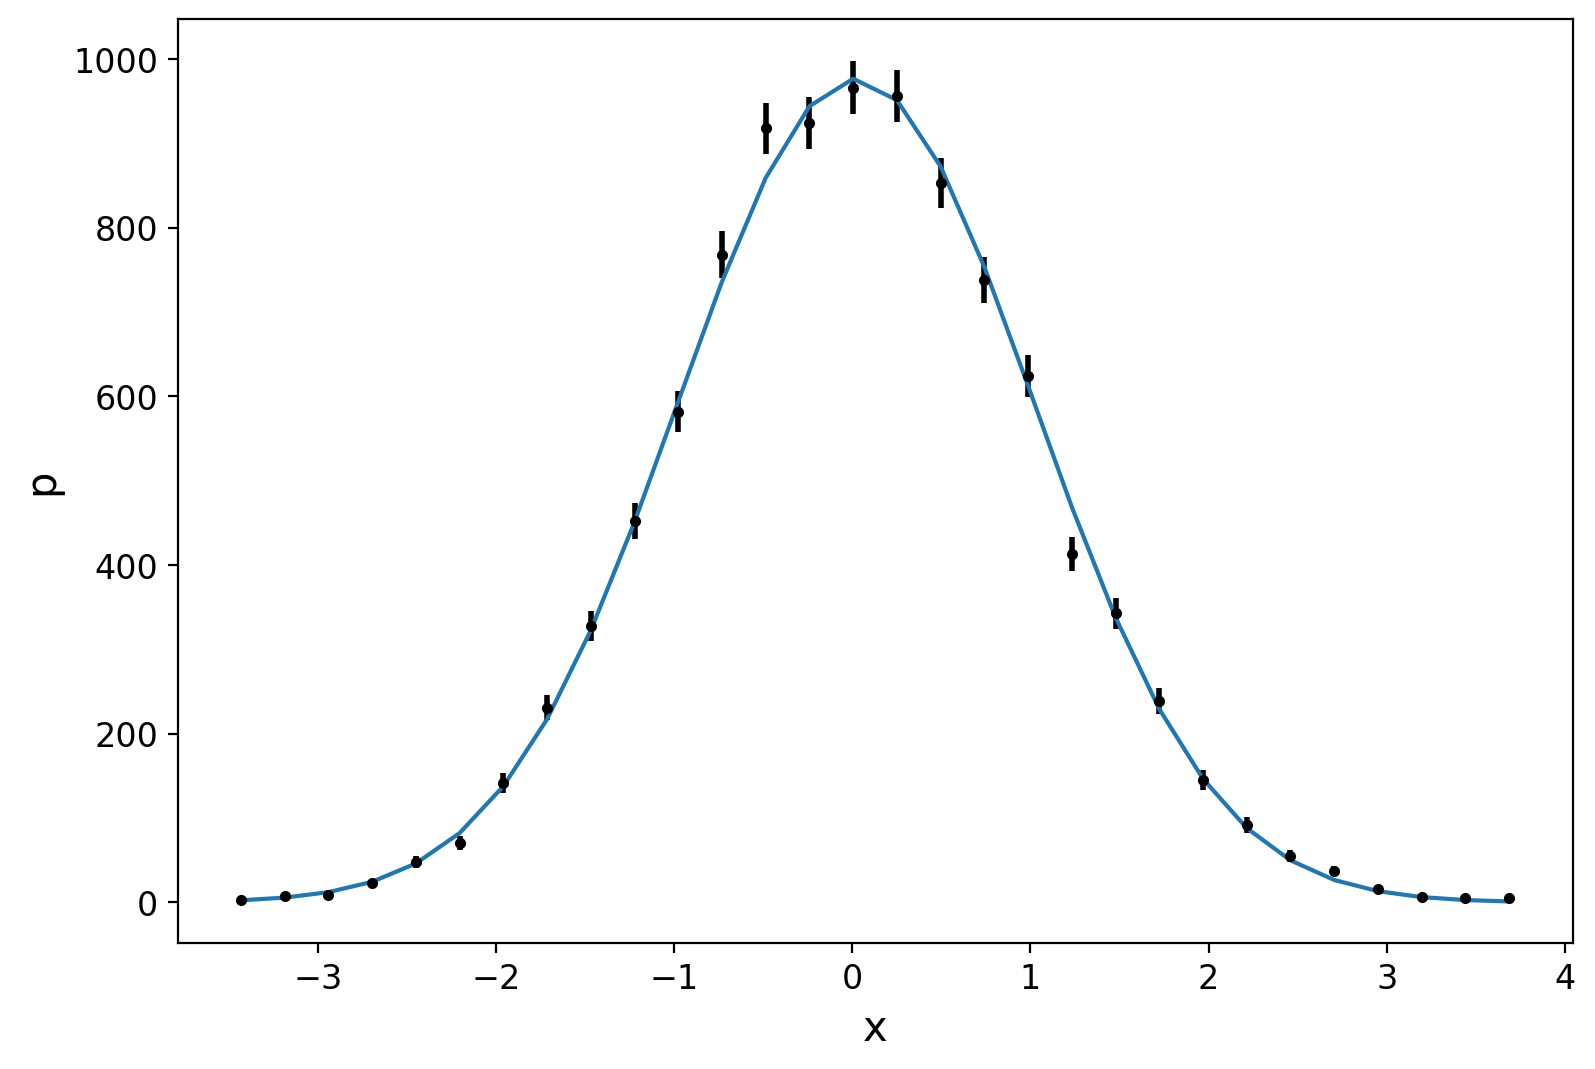

In [37]:
#solution
lN=10000
samples = np.random.normal(0,1,lN)
count, bins, ignored = plt.hist(samples,30)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
weight=1./np.sqrt(count)
weight[weight==float('+inf')] = 0
plt.show()

bayesianGood(binscenters,count,weight)
#The fit is now good.  
#The data now has a much stronger constraint than our nuisance, and as a consequence pulls it away from 2!

<a name='section_10_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.5 Hypothesis tests</h2>  




Ok, so we have taken a bit of a foray into understanding Bayes theorem and building high level insights into how we build a fit model. In practice, when we build models there are times when we know how our parameters will vary, and there are times when we don't know our parameters. The ones we do, we end up as Bayesians, we try to put gaussian constraints on them. For the ones that we don't, we behave like frequentists, we try to put no constraints and then rely on our knowledge of the data to understand them. 

Even though there is no underlying model, there are many powerful ways to play data off of other data. In its most general form, we can ask are two distributions from the same underlying phenomena, or are they different. This question is often referred to as a "[hypothesis test](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)", since we aim to test the hypothesis of two distributions being the same.  

Lets imagine we have took two measurements of a parameter $x$: $p_{a}(x)$ and $p_{b}(x)$, and we have two hypotheses

**Null Hypothesis** the distributions are the same $p_{a}(x) = p_{b}(x)$. 

**Alternative Hypothesis** the distributions are different $p_{a}(x) \neq p_{b}(x)$ 

In this case, we would like to compute the probability ($p$) of either the **Null** being true or the **Alternative** ($1-p$). From this p-value we can translate this to a confidence interval that will gauge our likelihood to believe our hypothesis. 

There are many uses of a hypothesis test in physics, and beyond. To give you a few examples: 

**Is my data consistent?** Let's say you took some data, perhaps you measured some astrophysical phenonmenon twice, and you would like to determine that the measurement is the same in both instances, then you can perform a hypothesis test. 

**Can I detect an effect?** Famously, one of the great statistician's, Fisher, [constructed a hypothesis test to test a lady's claim that she could determine, just by taste, whether tea was prepared by pouring the tea into the milk vs pouring the milk into the tea](https://en.wikipedia.org/wiki/Lady_tasting_tea). We could imagine all sorts of effects in the data that we would like to test. 

**Did I Just make a discovery?** In the rest of the lecture, and next lecture, we are going to build up the fit that led to the discovery of the Higgs boson. We will evaluate the significance by making a hypothesis test. 



### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.5.1</span>

The first hypothesis test was developed by a statistician (Fisher) when he was serving tea to Muriel Bristol and her fiancee William Roach. Muriel claimed that she could tell when milk was poured into a tea cup before the tea was poured in or when it was after. 

To test this the statitician made 8 cups of tea with 4 of those cups having milk before the tea is poured and 4 of those cups having milk after the tea is poured. 

What is the NULL Hypothesis in this test? 

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
NULL Hypothesis is the Lady cannot tell when the milk was dumped in
</pre>
        
**EXPLANATION:**
    
The NULL hypothesis is the hypothesis that there is no signficant phenomenon, and so the Muriel just guesses randomly. 
    
</div>

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-10.5.2</span>

Muriel apparently guessed all 4 cups correctly that had milk in before (and likewise the other 4 that had it after). What is the probability that she got lucky? (Note: that this is a binomial distribution)

Total Combos: 70.0
Probability randomly correct: 0.014285714285714285


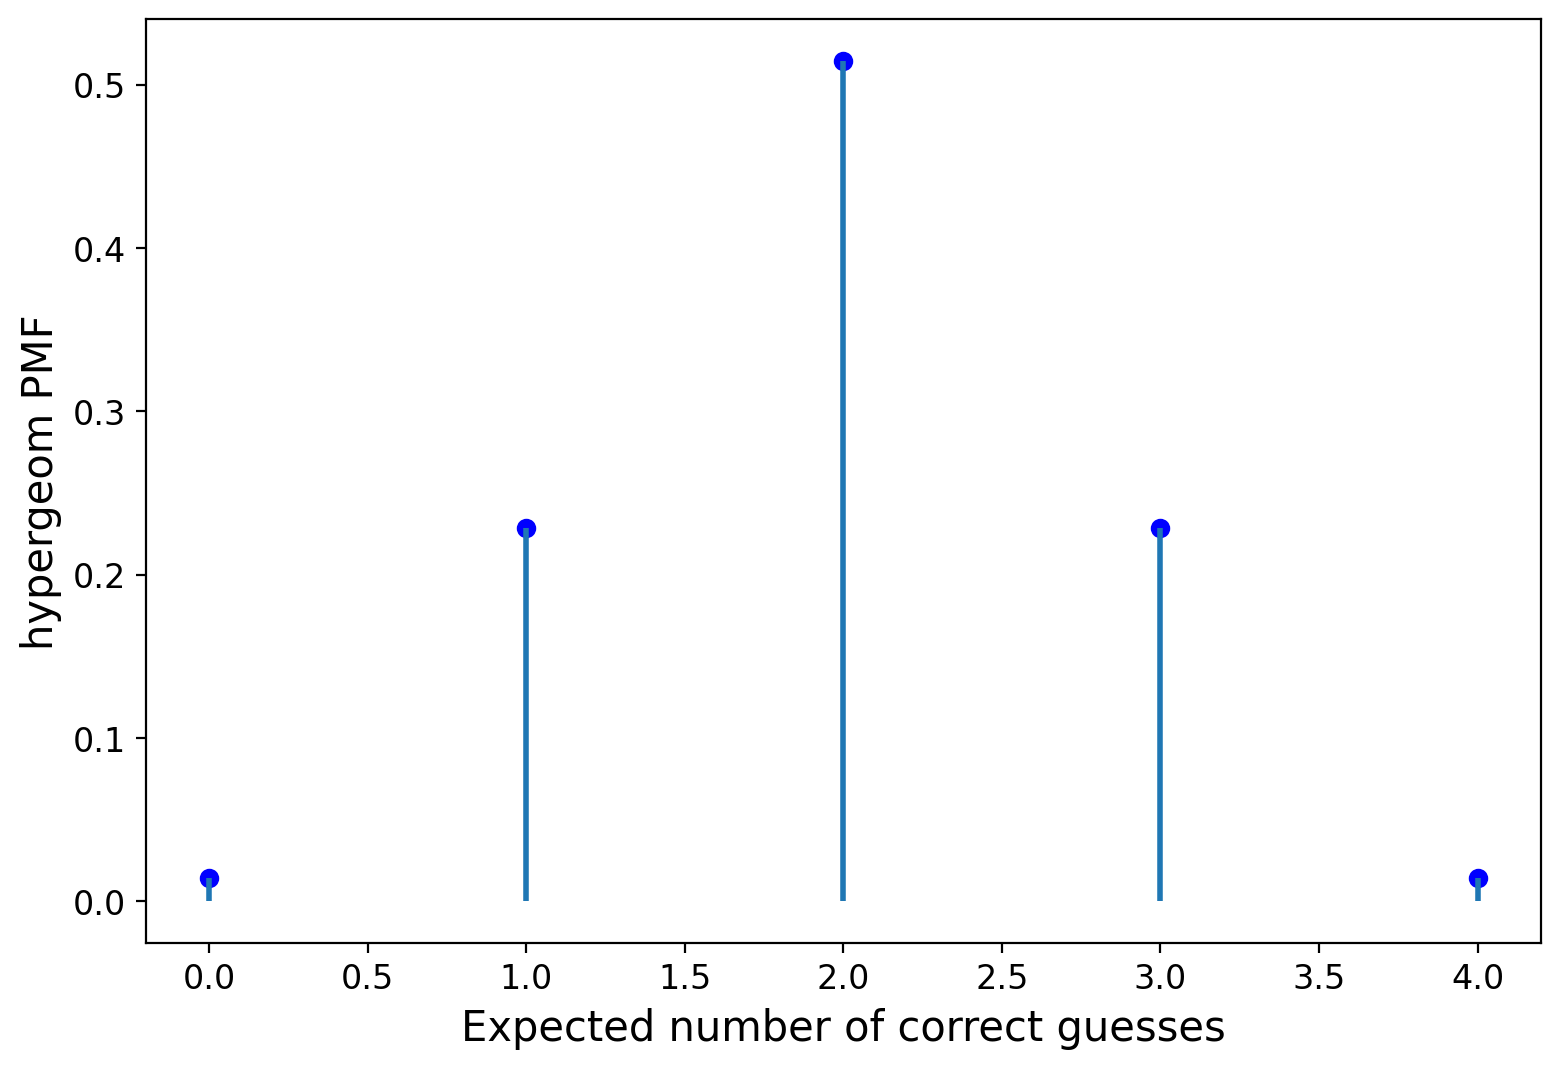

In [38]:
#>>>SOLUTION
from scipy.special import comb
from scipy.stats import hypergeom
import numpy as np
import matplotlib.pyplot as plt


print("Total Combos:",comb(8,4))
p=(1./comb(8,4))
print("Probability randomly correct:",p)

#the full distribution of random selection is a hypergeometric distribution
rv = hypergeom(8, 4, 4) # choose 4 given 8, and 4 are correct
x = np.arange(0, 4+1)
tea = rv.pmf(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, tea, 'bo')
ax.vlines(x, 0, tea, lw=2)
ax.set_xlabel('Expected number of correct guesses')
ax.set_ylabel('hypergeom PMF')
plt.show()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
1.4 percent chance that this is right
</pre>
        
**EXPLANATION:**
    
Again the null hyptohesis is that she just randomly guess right. There is only one combination out of $_{8}C_{4}$ potential combinations (ie 1/70). The full distribution is known hypergeometric distributions, effectively we are just taking the cdf of this. 
    
</div>


<a name='section_10_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.6 $\chi^{2}$ tests</h2>  



The most basic hypothesis test is to make two histograms, and compute the distribution bin by bin, by computing the $\chi^{2}$ metric between the two distributions.  To see this, lets again make two gaussian distributions, we will sample two distributions: 

\begin{equation}
 p_{a} (x) = \mathcal{N}(x,\mu=0,\sigma=1)\\
 p_{b} (x) = \mathcal{N}(x,\mu=0.2,\sigma=1)
\end{equation}

Let's sample each distribution 50 times. 


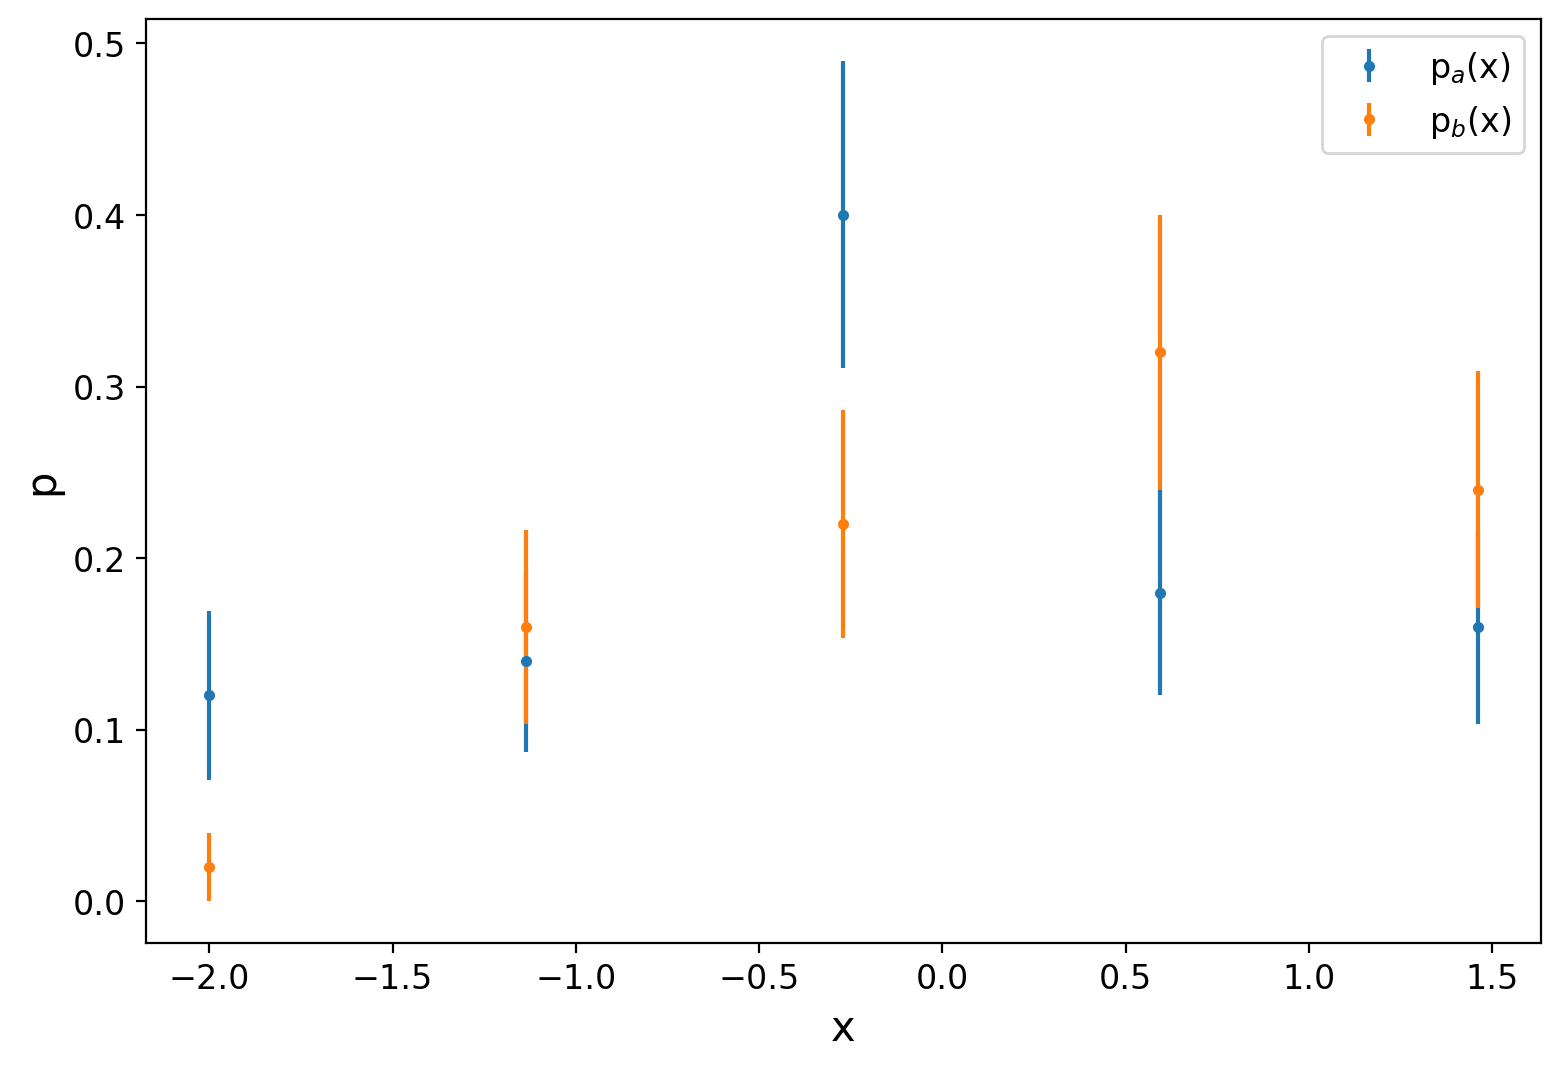

In [39]:

testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)

def plotHist(iSamples,iLabel,bin_edges=None):
    if bin_edges is None:
        y, bin_edges = np.histogram(iSamples, bins=5)
    else:
        y, bin_edges = np.histogram(iSamples, bins=bin_edges)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm=len(iSamples)
    plt.errorbar(bin_centers,y/norm,yerr=y**0.5/norm,fmt=".",label=iLabel)
    return bin_edges

bin_edges=plotHist(testSamplesA,"p$_{a}$(x)")
bin_edges=plotHist(testSamplesB,"p$_{b}$(x)",bin_edges)
plt.xlabel("x")
plt.ylabel("p")
plt.legend()
plt.show()

We can define a $\chi^{2}$ compatability test by reminding ourselves that a $\chi^{2}$ is a sum of Gaussian distribtuions with width $1$. Let's imagine that we believe our first measurement is emblemeatic of a true distributions $p_{a}(x)$, and then we compare a new observation $\mathcal{O}_b$, which is our measured distributions from $p_{b}$, we can define a $\chi^{2}$ between the two as:

\begin{eqnarray}
\chi^{2}_{N_{bins}} & = & \sum_{i=1}^{N_{bins}} \left(\frac{\mathcal{O}_{b}(x_{i}) - p_{a}(x_{i}) }{\sigma_{i}}\right)^{2} 
\end{eqnarray}

For a first measurement of $N_{a}$ events and $N_{a}(x_{i})$ events for the $x_{i}^{th}$ bin, we can write $p_{a}(x)$ as:
\begin{equation}
 p_{a}(x_{i}) = \frac{1}{N_{a}}\left(N_{a}(x_{i})\right)
\end{equation}

Consequently the uncertainty in each bin is
\begin{eqnarray}
\sigma_i&=&\sqrt{\sigma^2_a(x_{i})+\sigma^2_{b}(x_{i})}\\
\sigma_i&=&\sqrt{\frac{1}{N^{2}_{a}} N_{a}(x_{i})+\frac{1}{N^{2}_{b}} N_{b}x_{i}))}\\
\sigma_i&=&\sqrt{\frac{p_{a}(x_{i})}{N_{a}}+\frac{p_{a}(x_{i})}{N_{b}}}
\end{eqnarray}
we can write the above $\chi^{2}$ test as (for $N_{a} \gg N_{b}$)

\begin{eqnarray}
\chi^{2}_{N_{bins}} & = & \sum_{i=1}^{N_{bins}} \frac{\left(p_{b}(x_{i}) - p_{a}(x_{i})\right)^{2}  }{\frac{p_{a}(x_{i})}{N_{a}} + \frac{p_{b}(x_{i})}{N_{b}} } \\
& \approx & N_{b} \sum_{i=1}^{N_{bins}} \frac{\left(p_{b}(x_{i}) - p_{a}(x_{i})\right)^{2}  }{p_{b}(x_{i})}\\
                    & = & N_{b} \sum_{i=1}^{N_{bins}} \frac{\left(\frac{N_{b}(x_{i})}{N_{b}} - p_{a}(x_{i})\right)^{2}  }{p_{b}(x_{i})}
\end{eqnarray}

Since this is a $\chi^{2}$ distribution, we can immediately determine the significance by translating the $\chi^{2}$ value to a p-value. Let's code this up! One thing to note is that this test doesn't depend on the sampling in bins, so it has its limitations. Oftentimes, we use this when $N_{a} \gg N_{b}$, this is the reason for the approximation in the above form. We will use the first forw below.


0.3064771845841352


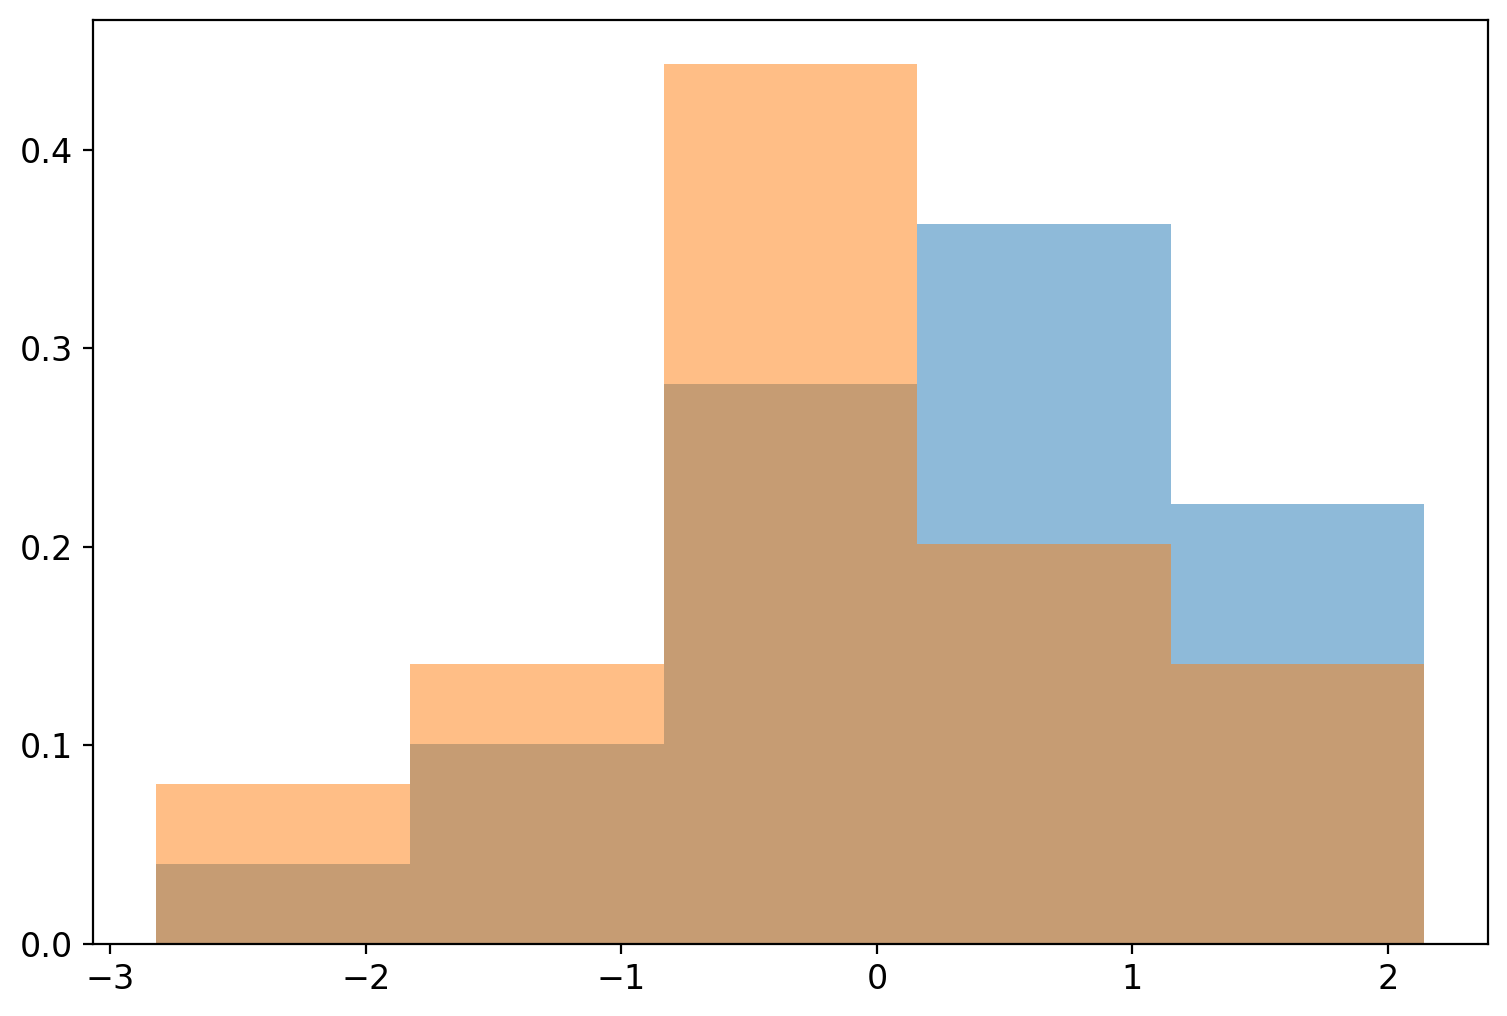

In [41]:
def chi2test(iSampleB,iSampleA,nbins=5):
    countA, binsA, ignored = plt.hist(iSampleA, nbins,      density=True ,alpha=0.5,label='a')
    countB, binsB, ignored = plt.hist(iSampleB, bins=binsA, density=True,alpha=0.5,label='b')
    #plt.legend()
    #plt.xlabel("x")
    #plt.ylabel("p")
    chi2=0
    ndof=0
    for i0 in range(len(binsA)-1):
        if countB[i0] > 0 and countA[i0] > 0:
            unc2 = countA[i0]/len(iSampleA) +  countB[i0]/len(iSampleB)
            chi2+=(countB[i0]-countA[i0])**2/unc2
            ndof=ndof+1
    #now we reply on the chi2 distribution to get the probabiliy
    p=1-stats.chi2.cdf(chi2, ndof)
    return p
print(chi2test(testSamplesA,testSamplesB))

So,as you can see our data deviations by a fairly large p-value. Let's take a look at how this varies over the number of events for 3 different distributions, one with $\mu=0.2$, one with $\mu=1$ and $\mu=2$ going from a sample of $0$ to $50$ events, and comparing to a true distribution of 100k events. 

/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


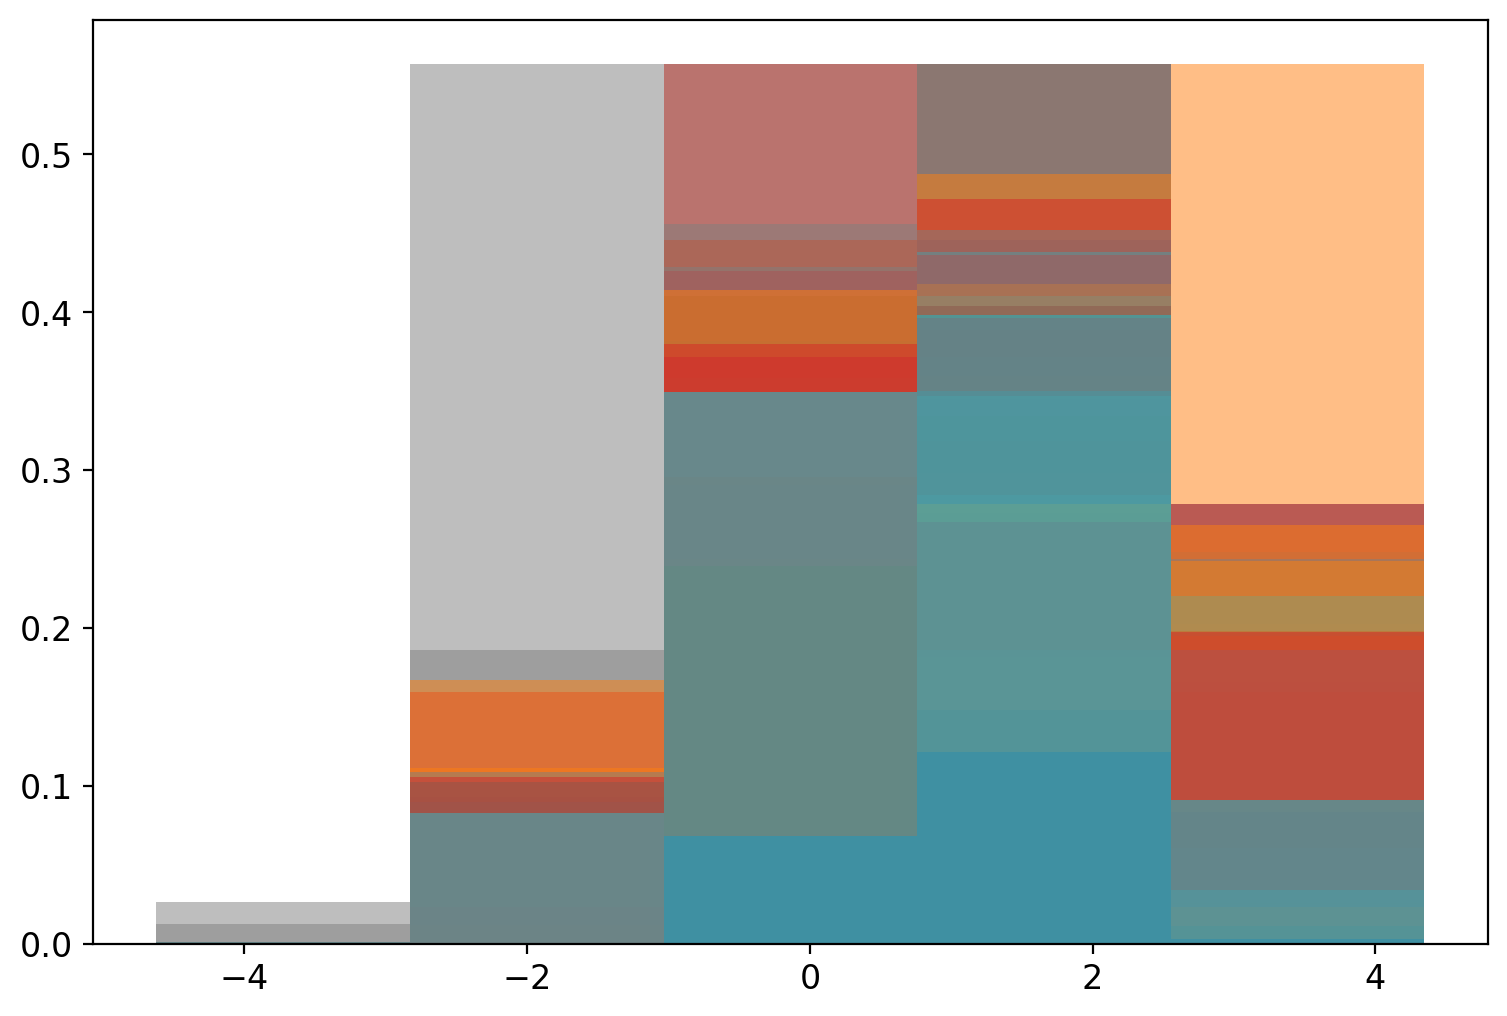

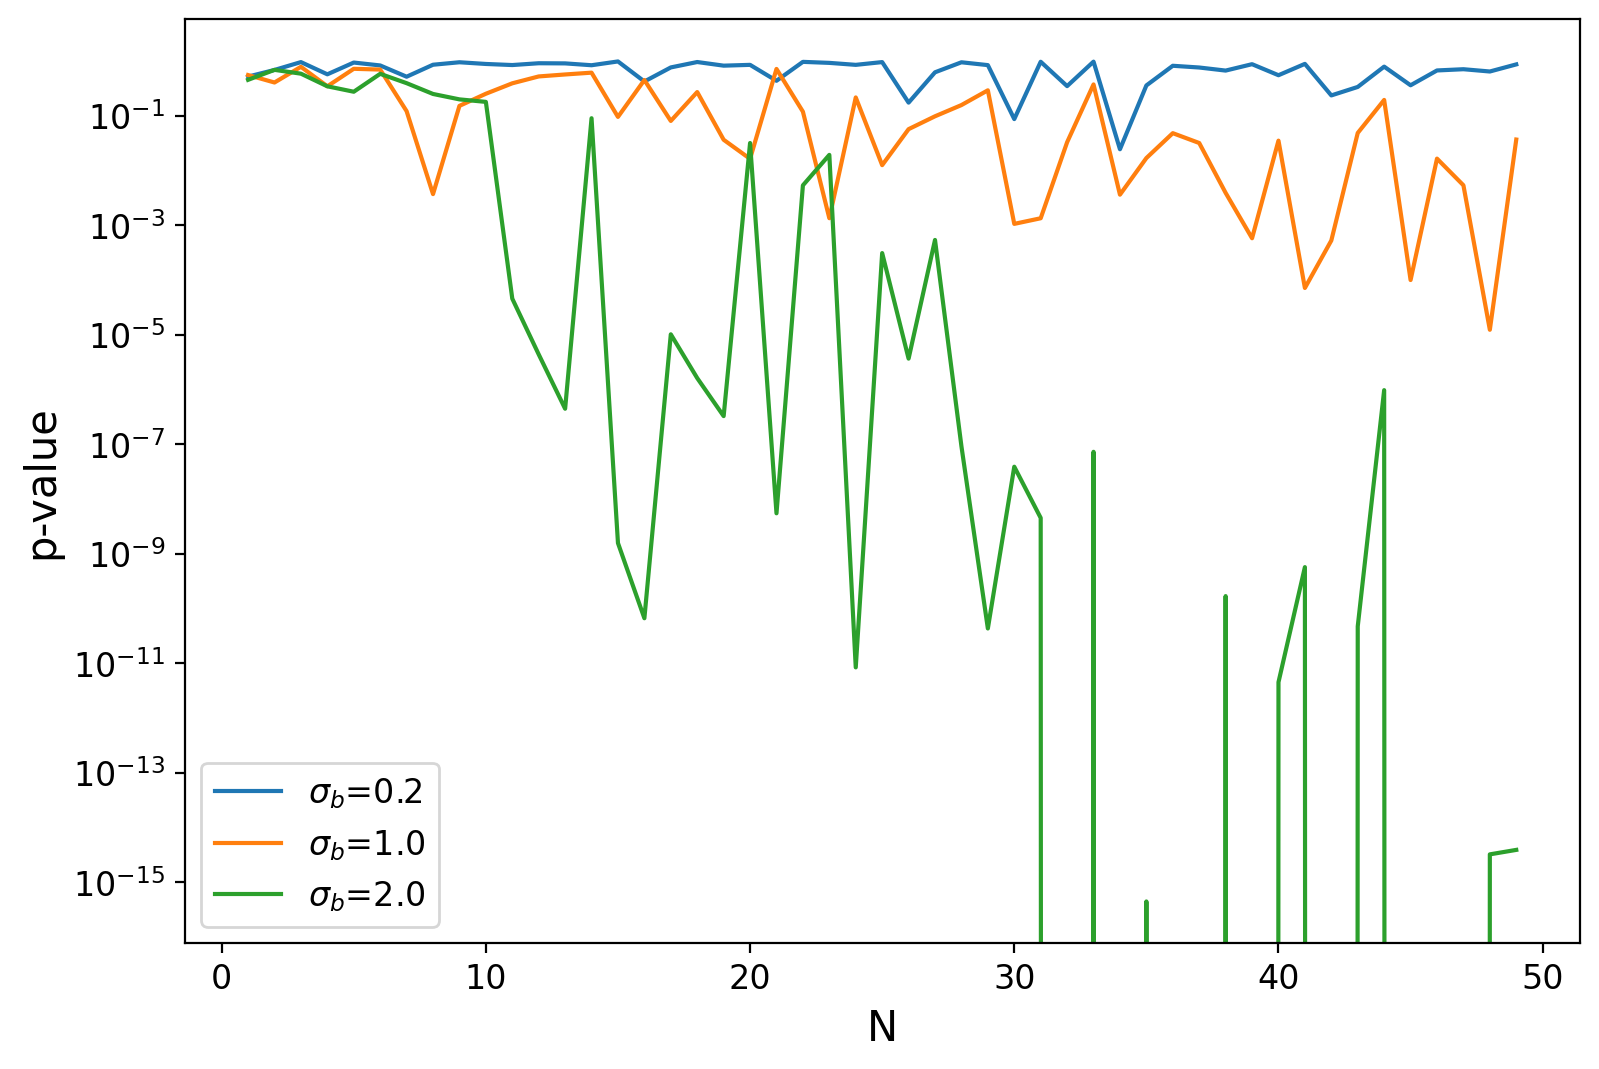

In [42]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
#baseline
samples = np.random.normal(0,1, 100000)

xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for ntestsamples in range(50):
    #0.2
    testsamples1 = np.random.normal(0.2,1, ntestsamples)
    pvalue = chi2test(testsamples1,samples)
    pvalues1.append(pvalue)
    #1
    testsamples2 = np.random.normal(1,1, ntestsamples)
    pvalue = chi2test(testsamples2,samples)
    pvalues2.append(pvalue)
    #3
    testsamples3 = np.random.normal(2,1, ntestsamples)
    pvalue = chi2test(testsamples3,samples)
    pvalues3.append(pvalue)
    #x-axis
    xvals.append(ntestsamples)
count1, bins1, ignored = plt.hist(samples, 5, density=True,alpha=0.5)
plt.show()
    
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues1,label='$\sigma_{b}$=0.2')
ax.plot(xvals,pvalues2,label='$\sigma_{b}$=1.0')
ax.plot(xvals,pvalues3,label='$\sigma_{b}$=2.0')
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
ax.legend()
plt.show()


So you can see that for 50 events, its hard to distinguish the small $\sigma$. However for a 2 $\sigma$, we can pretty clearly separate them with with more than 10 events. The above is fluctuating a lot b/c it is just one scan. In principle, to get a trend line, we would have to run the above plot many times and then average over the many plots to get a nice trend line. 



### Challenging Challenge question (after class)

Compute the trend line above the above distribution by running the above plot 50 times and taking the average p-value. This may take a while. 

/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


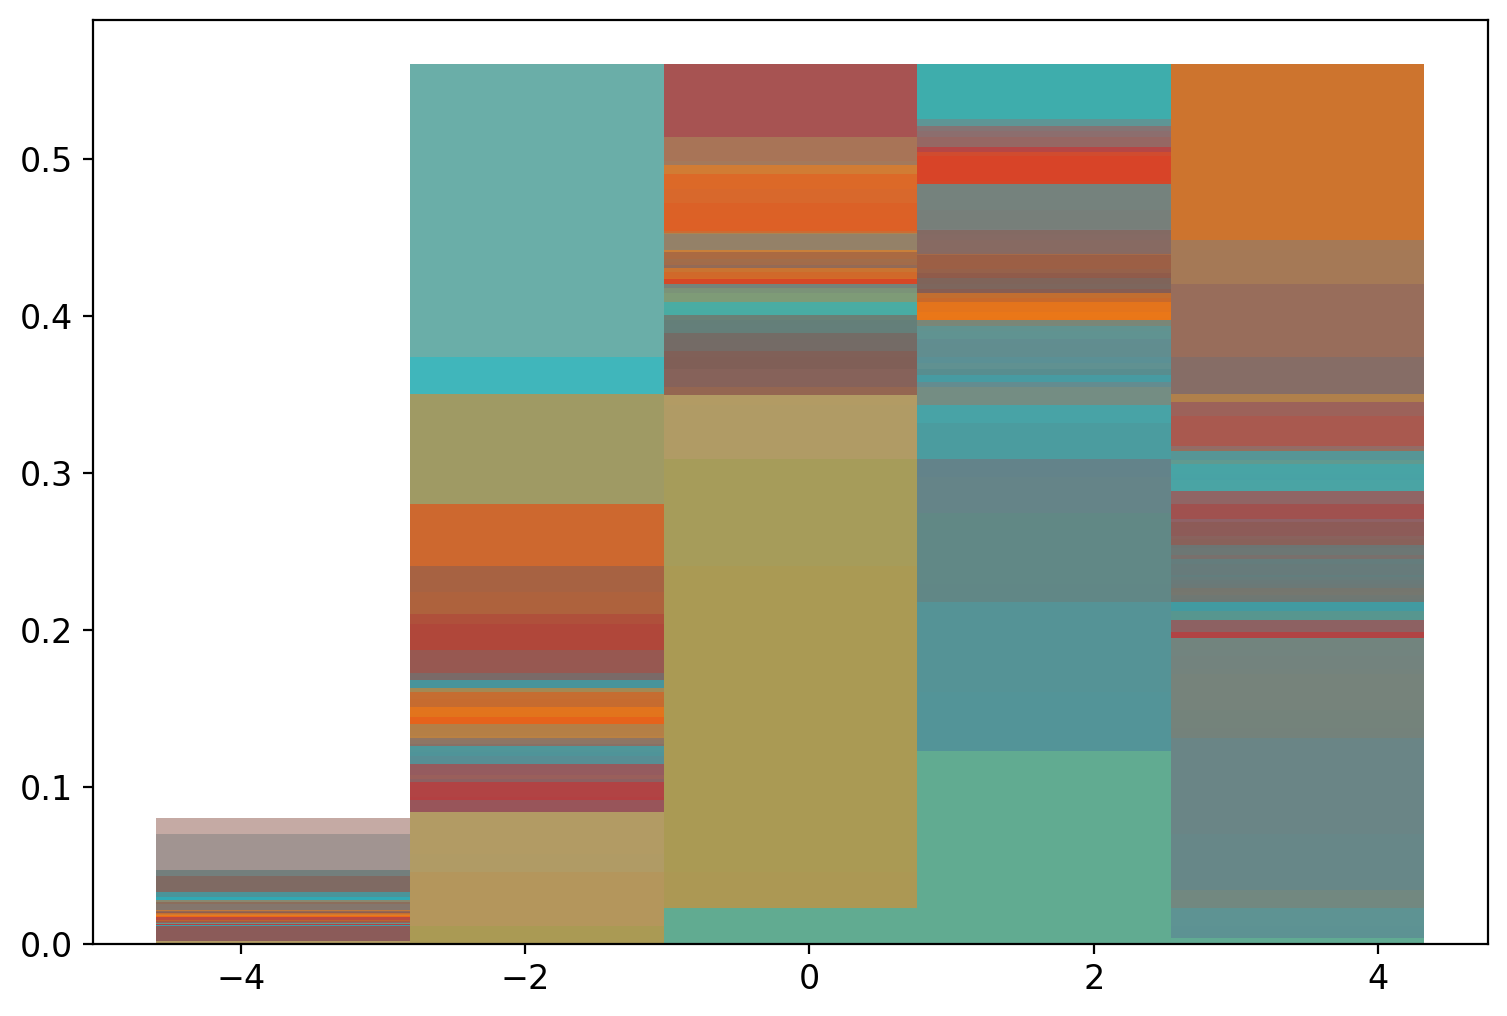

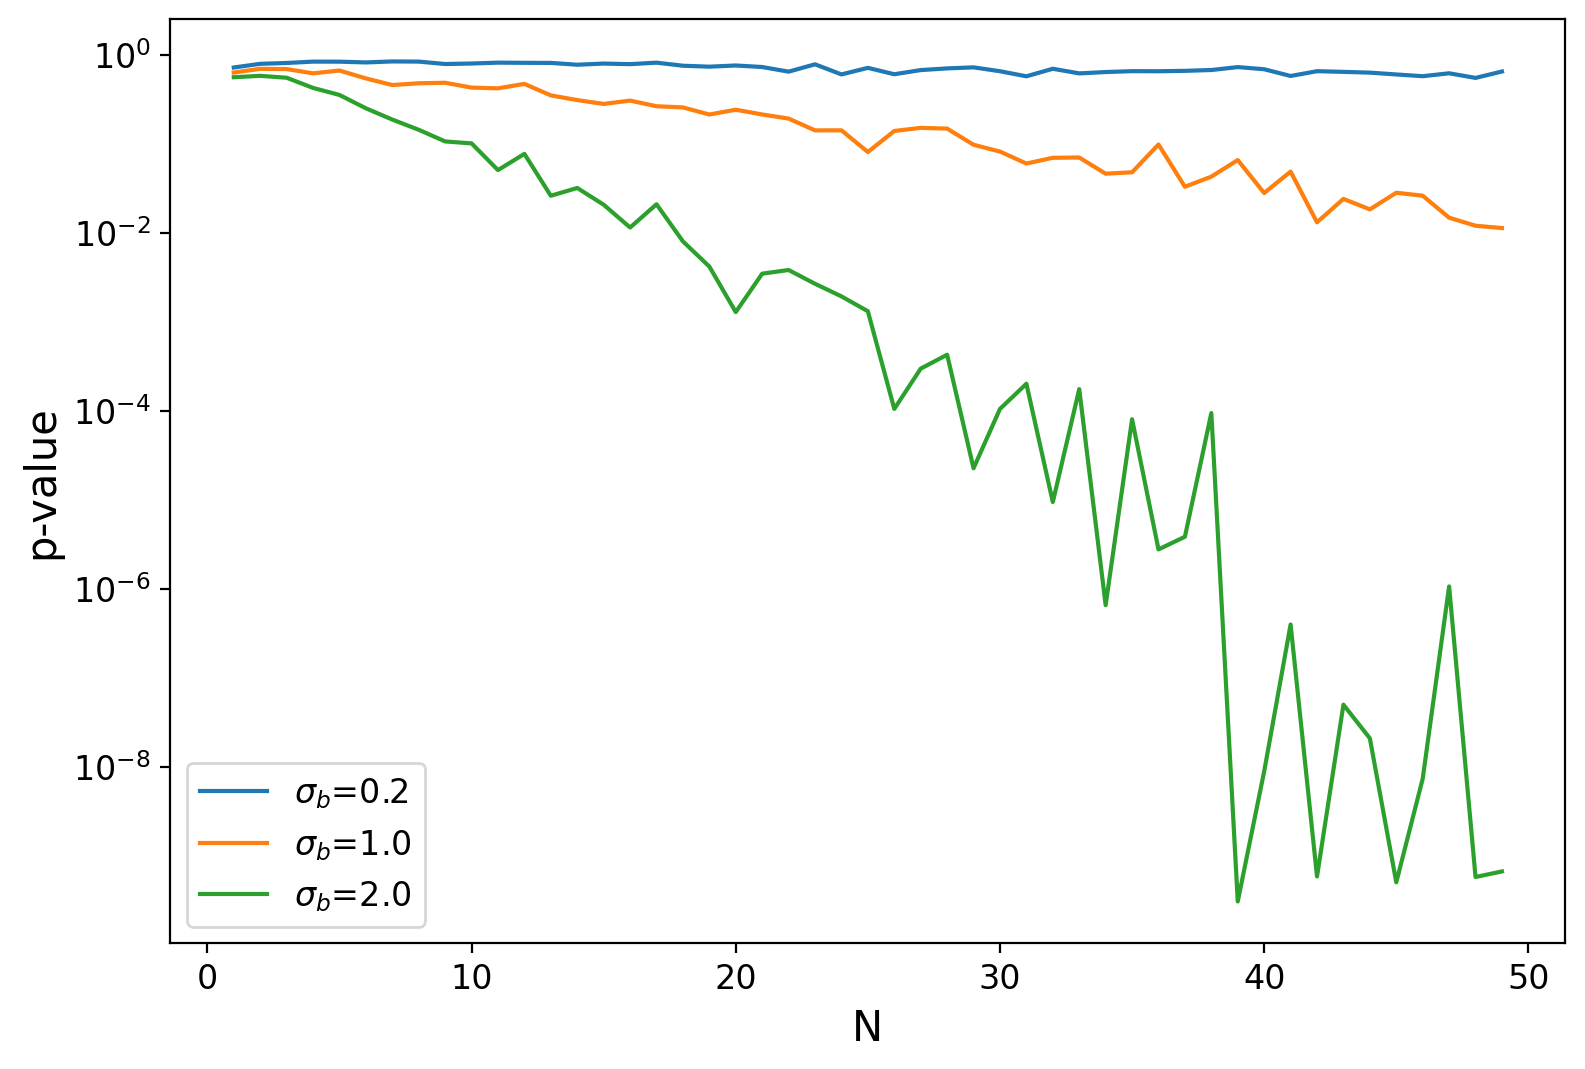

In [26]:
#solution
def scan(iN,iNToys=30): 
    spvalues1=np.array([])
    spvalues2=np.array([])
    spvalues3=np.array([])
    for i0 in range(iNToys):
        testsamples1 = np.random.normal(0.2,1,iN)
        pvalue = chi2test(testsamples1,samples)
        spvalues1 = np.append(spvalues1,pvalue)
        
        testsamples2 = np.random.normal(1,1, iN)
        pvalue = chi2test(testsamples2,samples)
        spvalues2 = np.append(spvalues2,pvalue)
        
        testsamples3 = np.random.normal(2,1, iN)
        pvalue = chi2test(testsamples3,samples)
        spvalues3 = np.append(spvalues3,pvalue)
    return spvalues1.mean(),spvalues2.mean(),spvalues3.mean()
        
xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(50):
    xvals.append(i0)
    tmppvalue1,tmppvalue2,tmppvalue3=scan(i0)
    pvalues1.append(tmppvalue1)
    pvalues2.append(tmppvalue2)
    pvalues3.append(tmppvalue3)

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues1,label='$\sigma_{b}$=0.2')
ax.plot(xvals,pvalues2,label='$\sigma_{b}$=1.0')
ax.plot(xvals,pvalues3,label='$\sigma_{b}$=2.0')
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
ax.legend()
plt.show()

<a name='section_10_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.7 Komogorov-Smirnov Test</h2>  


In addition to doing a $\chi^{2}$-test, there is another test to compare distributions, known as the Kolmogorov-Smirnov test, or the KS-test. This is defined as the maximum difference in the CDFs of the two distributions. Its is another way to compare two distributions. The big advantage of this distribution is that it does not rely on binning of the distributions at all, since it is computed directly by taking the raw events in the sample, sorting them and taking the difference. 


0.27999999999999997


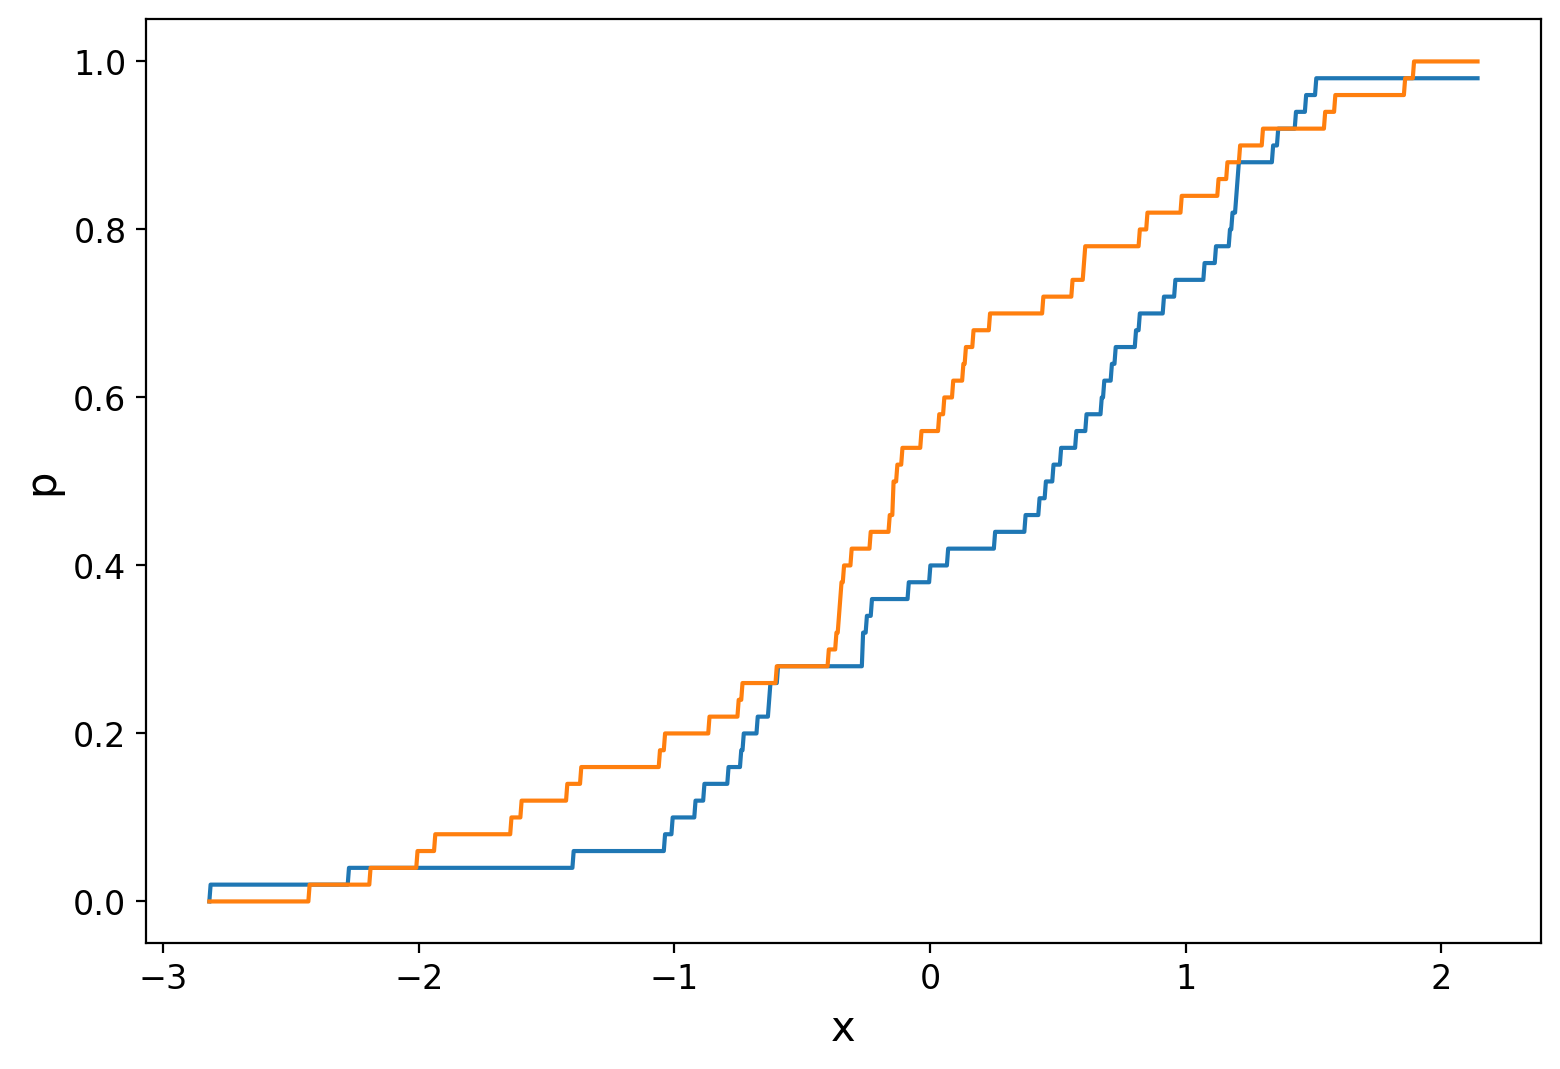

In [43]:
def KStest(iSampleB,iSampleA,iPlot=False):
    #sort generated array
    sortSampleA = np.sort(iSampleA)
    sortSampleB = np.sort(iSampleB)    
    xrange=np.linspace(sortSampleA[0],sortSampleA[-1],1000)
    cdfA=np.array([])
    cdfB=np.array([])
    for x in xrange:
        cdfA = np.append(cdfA,len(sortSampleA[sortSampleA < x])/len(sortSampleA))
        cdfB = np.append(cdfB,len(sortSampleB[sortSampleB < x])/len(sortSampleB))
    if iPlot:
        plt.plot(xrange,cdfA)
        plt.plot(xrange,cdfB)
        plt.xlabel("x")
        plt.ylabel("p")
    ks=np.max(np.abs(cdfA-cdfB))
    return ks
print(KStest(testSamplesA,testSamplesB,iPlot=True))

While the KS test is a good way to test distributions, the way to evaluate how significant the KS test requires that we develop another technique. This techinque, we refer ot as **boostrapping**. 

In bootstrapping, what we do is instead of making deeper assumptions about how underlying distributions behave, we instead rely on the toys, or sometimes subsets of the dataset to understand how significant a deviation is from the the base. This is very similar to what we did above with the chi2 distribution, to understand the general shape of the trend. Let's try this out with the KSTest. 

What we are going to do is : 

0. Compute the KS test value from B to A
1. Generate a toy $A$ from one dataset
2. Generate a different toy $A$ from the same dataset
3. Reperate 2 many times
4. Calculate the number of events that a larger KS score than our sample $N_{pass}$
5. Our p-value is $N_{pass}/N_{total}$

Let's go ahead and write the code for this. 

KS Probability from Toys : 0.063


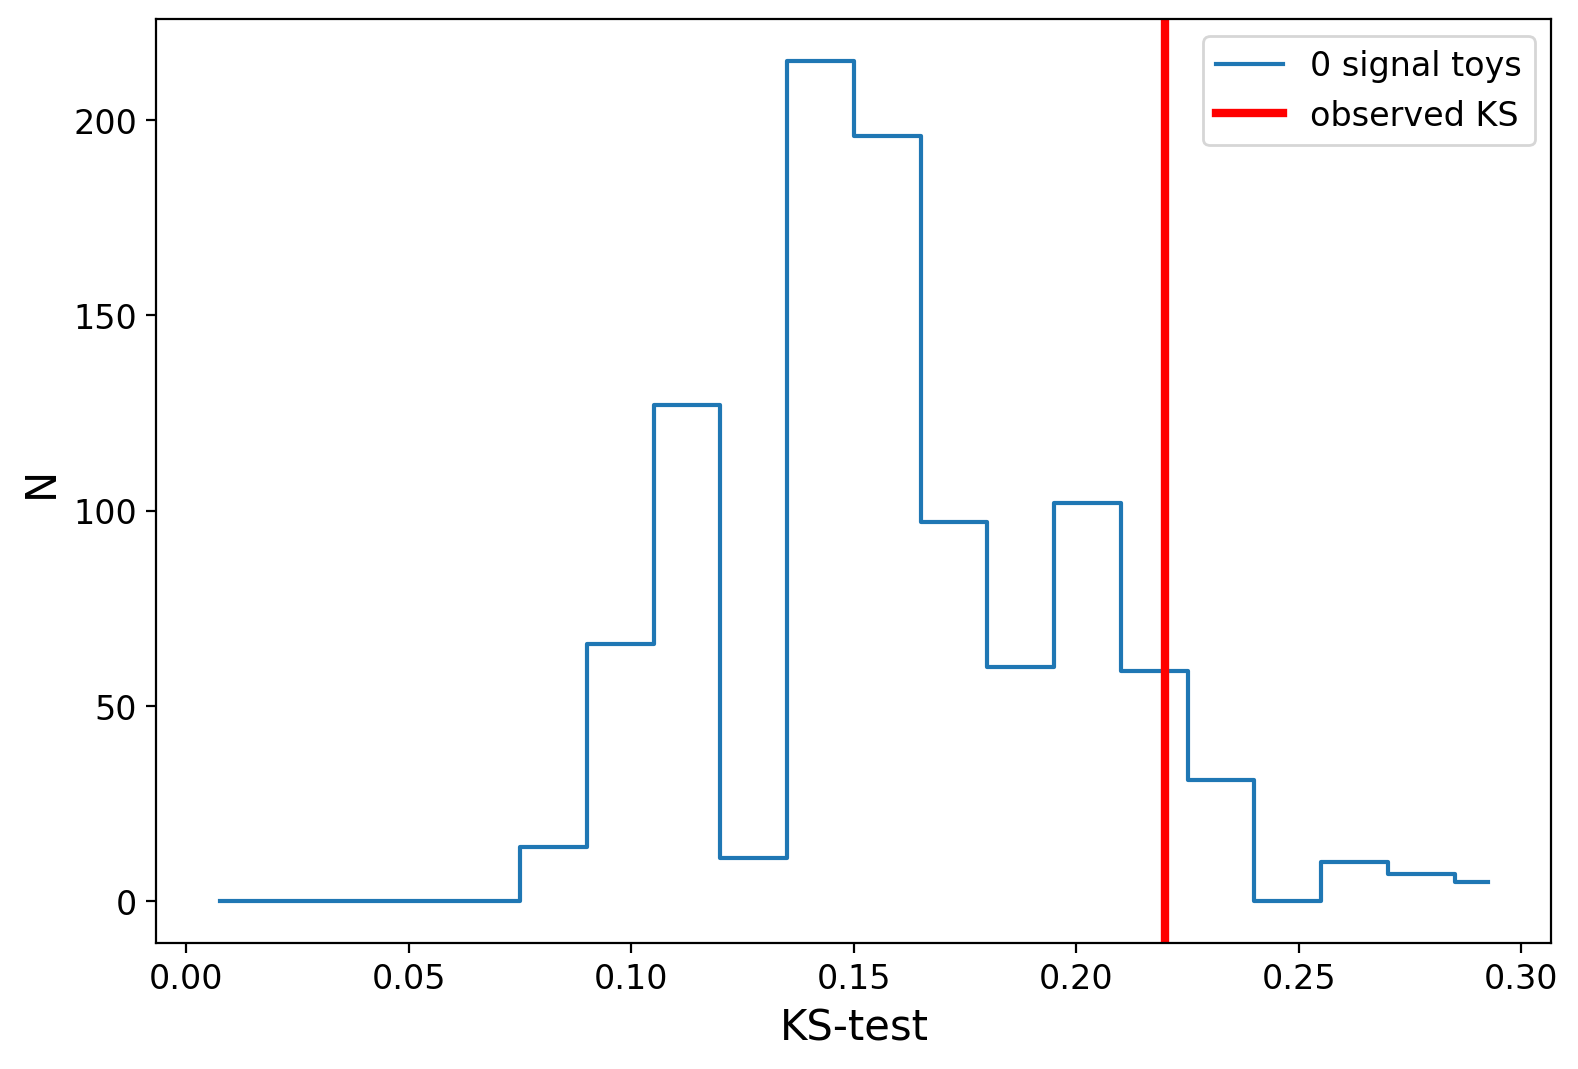

In [28]:
def runToys(iSample,ntoys=1000):
    toyKSArr=np.array([])
    for toy in range(ntoys):
        toySample=np.random.normal(0.,1, 50)
        toyKS=KStest(iSample,toySample)
        toyKSArr = np.append(toyKSArr,toyKS)
    return toyKSArr

def KSProb(iSampleA,iSampleB):
    KSActual = KStest(iSampleA,iSampleB)
    KSToys   = runToys(iSampleA)
    KSProb   = len(KSToys[KSToys > KSActual])/len(KSToys)
    print("KS Probability from Toys :",KSProb)

    maxKS    = np.max([np.max(KSToys),KSActual])
    nKS, bin_edges = np.histogram(KSToys, bins=20,range=(0,maxKS))
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    
    fig, ax = plt.subplots(figsize=(9,6))
    plt.plot(bin_centers,nKS,drawstyle = 'steps-mid',label='0 signal toys')
    ax.axvline(x=KSActual,linewidth=3,c='red',label="observed KS")
    plt.xlabel('KS-test')
    plt.ylabel('N')
    plt.legend()
    plt.show()
    
KSProb(testSamplesA,testSamplesB)

### Challenge question
Compute the ks test for two gaussian sampled distributions each with $\sigma=1$, one with mean $\mu=0$ and the other with mean $\mu=0.2$. 

0.16000000000000003
KS Probability from Toys : 0.199


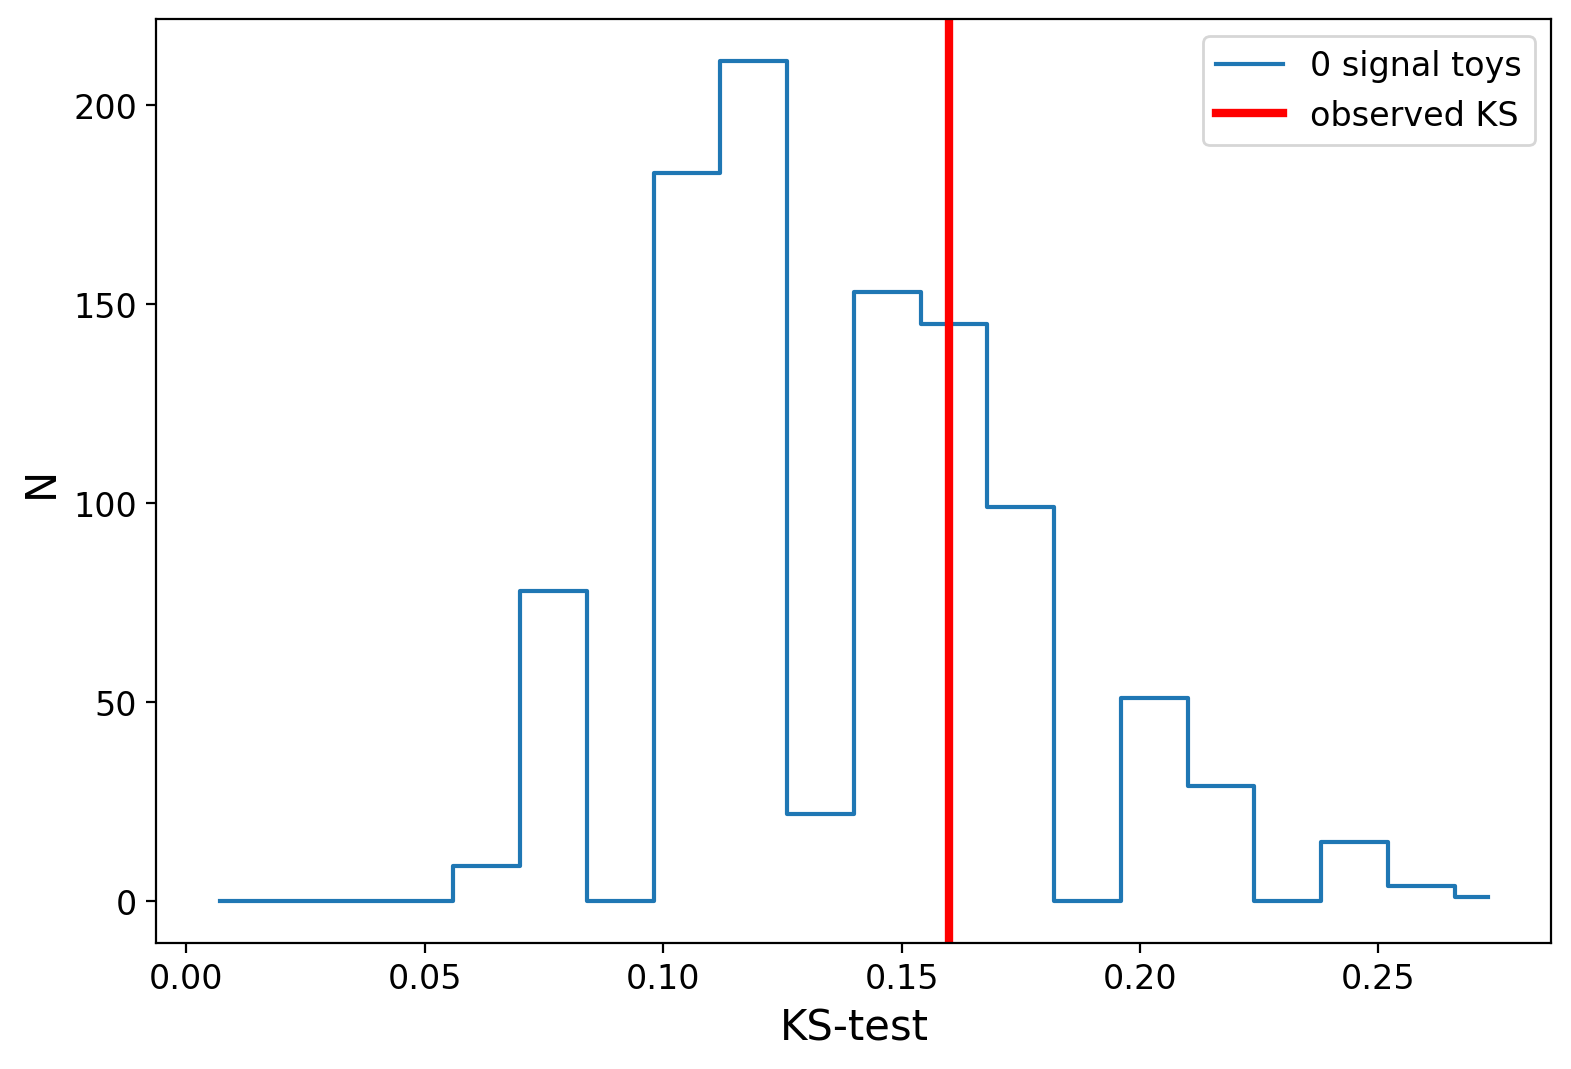

In [29]:
testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)
print(KStest(testSamplesB,testSamplesA))
KSProb(testSamplesA,testSamplesB)

<a name='section_10_8_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.8.1 Maximum Likelihood(Review)</h2>  

Lets say we have a sample that is Gaussian distributed, and we want to find the maximum likelhiood value of the mean and the resolution of this sample. 

For this sample, we can write, the likelhiood and log likelihood as:  

\begin{equation}
\mathcal{L}(x|\mu_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) =  -\frac{n}{2}\log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}}
\end{equation}

To get get maximum value of $\mu$ we can write: 

\begin{eqnarray}
\frac{\partial}{\partial \mu}\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) & = & \frac{\partial}{\partial \mu} \left( -\frac{n}{2} \log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}} \right)  = 0\\
& = &  \left( \sum_{i=0}^{N} \frac{(x_{i}-\mu)}{\sigma^{2}} \right)  = 0\\
\sum_{i=0}^{N} (x_{i}-\hat{\mu}) & = & 0 \\
\sum_{i=0}^{N} x_{i} - N \hat{\mu} & = & 0 \\
\end{eqnarray}

This gives us a best fit for $\mu$, given by $\hat{\mu}$ of
\begin{eqnarray}
\hat{\mu} & = & \frac{1}{N} \sum_{i=0}^{N} x_{i}
\end{eqnarray}

Now for $\sigma^{2}$, we can do the same thing, and we get (for a best fit $\hat{\sigma}^{2}$:  

\begin{eqnarray}
\frac{\partial}{\partial \sigma^{2}}\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) & = & \frac{\partial}{\partial \sigma^{2}} \left( -\frac{n}{2} \log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}} \right)  = 0 \\
& = & \left( -\frac{n}{2\hat{\sigma}^{2}} +  \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\hat{\sigma}^{4}} \right) \\
0 & = & \left( -n +  \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{\hat{\sigma}^{2}}\right) \\
\hat{\sigma}^{2} & = & \frac{1}{n} \sum_{i=0}^{N}(x_{i}-\mu)^2  
\end{eqnarray}
 
Now none of this is a big surprise, the best fit for the mean and variance of a gaussian distribution is the mean and variance. However, this process shows you the thought process that is undergone when trying to construt a maximum likelihood estimator of a sample. 


<a name='section_10_8_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L10.8.2 Likelihood Ratio</h2>  


The most powerful way to compare two distributions is to compute the likelihood of each, and then take their ratio. By taking the $\log$ of this ratio, we end up with a robust way to define a hypothesis test. 
We define this as 
\begin{eqnarray}
\lambda & = & -2 \log\left(\frac{\mathcal{L_{\rm null}}}{\mathcal{L_{\rm alternative}}}\right) \\
        & = & -2 \log\left(\mathcal{L_{\rm null}}\right) - \log\left(\mathcal{L_{\rm alternative}}\right)  
\end{eqnarray}

This construction is often called the Neyman-Pearson lemma. 

Recall that the likelihood is just the probability of a specific thing happening. The likelihood ratio is just the ratio of the maximum probabilities of two hypotheses. Lets do an analytic example to start with. Imagine you have a set of points $x_{i}$, and you want to test the hypothesis that this sample has mean $\mu_{0}$ vs the alternative hypothesis that the mean is $\neq \mu_{0}$. Lets write out the likelihood for both scenarios. 

**Hypothesis $\mu_{0}$**

The likelihood is just written following the form below as: 
\begin{equation}
\mathcal{L}(\mu_{i}|x_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{2\sigma^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{0},\sigma_{i}) \right) =  -\frac{n}{2}\log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{2\sigma^{2}}
\end{equation}

Now, since we are maximizing all of our parameters except for $\mu$. The parameter $\sigma$ will be maximized to be the optimized value of $\sigma$, we denote $\hat{\sigma}$.

\begin{eqnarray}
\hat{\sigma}_{\mu}^{2} & = & \frac{1}{n} \sum_{i=0}^{N}(x_{i}-\mu_{0})^2  
\end{eqnarray}

which means, we can write the above as
\begin{equation}
\log\left(\mathcal{L}(x|\mu_{0},\sigma_{i}) \right) =  -\frac{n}{2}\left(\log\left(2\pi\hat{\sigma}_{\mu}^{2}\right) + 1\right)
\end{equation}

Finally, one more relation that is useful is that if $\mu_{0}\neq\bar{x}$, we can write this as 

\begin{eqnarray}
\hat{\sigma}^{2} & = & \frac{1}{n} \sum_{i=0}^{N} \left(x_{i} - \bar{x} + \bar{x}-\mu_{0}\right)^{2} \\ 
                 & = & \frac{1}{n} \sum_{i=0}^{N} \left(\left(x_{i} - \bar{x}\right)^2 + \left(\bar{x}-\mu_{0}\right)^{2} + 2(x_{i} - \bar{x})(\bar{x}-\mu_{0})\right) \\ 
                 & = & \frac{1}{n} \sum_{i=0}^{N} \left(\left(x_{i} - \bar{x}\right)^2 + \left(\bar{x}-\mu_{0}\right)^{2}\right) \\
                 & = & \hat{\sigma}^{2} +  \left(\bar{x}-\mu_{0}\right)^{2}
\end{eqnarray}


**Alternative Hypothesis $\mu\neq\mu_{0}$**

In this scenario, we want to compute the maximum likelihood over *all parameters*, above we fixed $\mu$. This we can write, noting $\hat{\mu}_{max}=\bar{x}$.

\begin{equation}
\mathcal{L}(\mu_{i}\neq\mu_{0}|x_{i},\mu_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\hat{\sigma}^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\bar{x})^2}{2\hat{\sigma}^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{0},\hat{\sigma}_{i}) \right) =  -\frac{n}{2}\log\left(2\pi\hat{\sigma}^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\bar{x})^2}{2\hat{\sigma}^{2}} \\
\log\left(\mathcal{L}(x|\mu_{0},\hat{\sigma}_{i}) \right) =  -\frac{n}{2}\left(\log\left(2\pi\hat{\sigma}^{2}\right) + 1\right)
\end{equation}

The log likelihood ratio for these is 

\begin{eqnarray}
\lambda & = & -n\left(\log\left(2\pi\hat{\sigma}^{2}\right) + 1\right) + n\left(\log\left(2\pi\hat{\sigma}_{\mu}^{2}\right) + 1\right) \\
        & = & n \log\left(\frac{\hat{\sigma}^{2}_{\mu}}{\hat{\sigma}^{2}}\right) \\
        & = & n \log\left(\frac{\hat{\sigma}^{2} +  \left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^{2}}\right)\\
        & = & n \log\left(1+ \frac{\left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^{2}}\right)\\
        & \approx & n \frac{\left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^2} 
\end{eqnarray}
Where in the last step, we taylor expanded for small $|\mu_{0}-\bar{x}|$. Incidently, if we had done a $\chi^{2}$ test we would converge on the same thing:
\begin{eqnarray}
\lambda & = & \sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{\hat{\sigma}^{2}} - \frac{(x_{i}-\bar{x})^2}{\hat{\sigma}^{2}} \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} \left(x_{i}-\mu_{0}\right)^2 - \left(x_{i}-\bar{x}\right)^2 \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} x^{2}_{i} - x^{2}_{i} - 2 x_{i}\left(\mu_{0}-\bar{x}\right) - \mu_{0}^2 -\bar{x}^2 \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} \left(\mu_{0}-\bar{x}\right)^{2} \\
        & = & \frac{n}{\hat{\sigma}^2} \left(\mu_{0}-\bar{x}\right)^{2}
\end{eqnarray}

For both cases, what we see is that in this scenario, we have that our likelihood ratio is exactly equivalent to a gaussian distribution about $\mu=\bar{x}$, with a variance given by $\hat{\sigma}^2/n$. 

Imagine now we had this for a few bins with mean in each of them given by $\bar{x}_{i}$, if we considered a few different samples (for example bins in a histogram), we can write this by just adding a summation: 
\begin{eqnarray}
\lambda & = & \sum_{i=0}^{N_{\rm bins}} \frac{n_{i}}{\hat{\sigma}_{i}^2} \left(\mu_{i}-\bar{x}_{i}\right)^{2}
\end{eqnarray}

This is very similar to a $\chi^{2}$ test.  More generally, this is a sum of gaussian variables $\mu_{i}$, which means that the variation of the log likelihood is going to follow a $\chi_{\nu}$ distribution with $\nu=N_{\rm bins}$ as the number of degrees of freedom. 

### Wilk's theorem
This yields Wilk's theorem again, which says that the likelihood ratio $\lambda\rightarrow\chi_{\nu}$ in the limit of $n\rightarrow\infty$. 

Let's show Wilk's theorem

1.1026054750048786


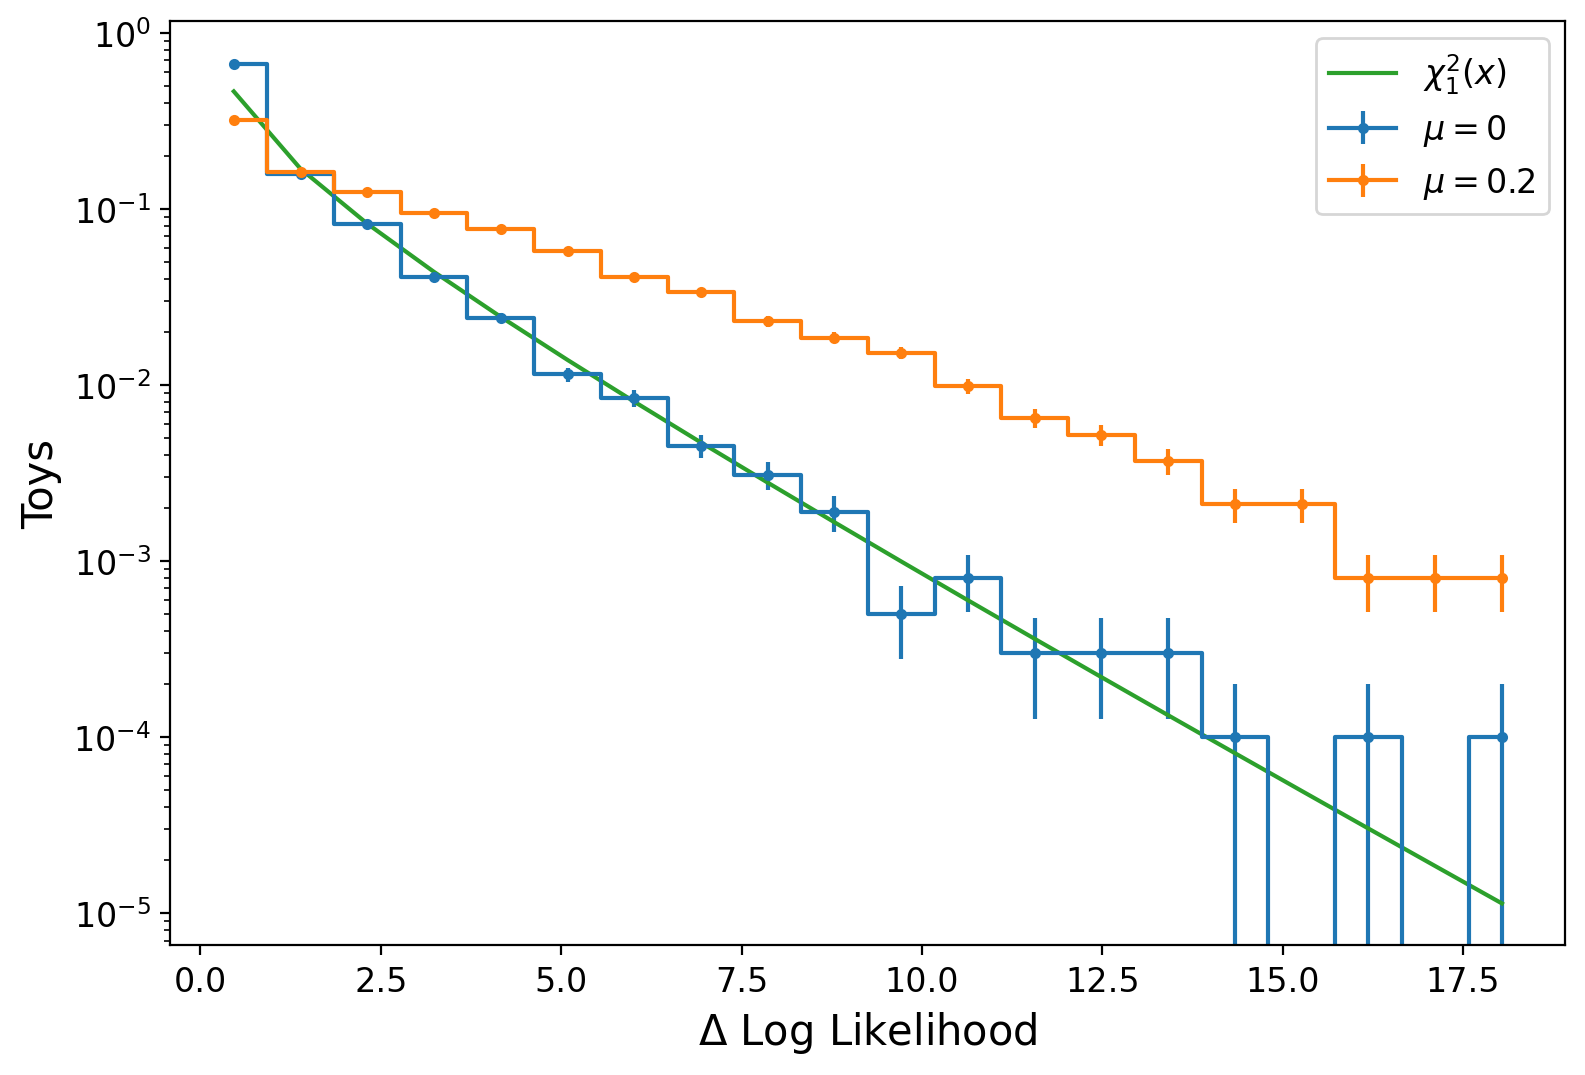

In [31]:
#Now lets run a simulation to see if Wilk's theorem is true
#Lets define the log likelihood is the simplest way possible (assume we don't know math)
#note we will use -1 to compute these on the fly
def loglikelihoodGaus(isample,mu0=-1,sigma0=-1):
    n=len(isample)
    if mu0 == -1:
        mu0=isample.mean()
    if sigma0 == -1:
        sigmahat2=(isample-mu0)**2/len(isample)
        sigmahat2=sum(sigmahat2)
    val=-n/2*(np.log(2*np.pi*sigmahat2)+1)
    return val

hypoth=loglikelihoodGaus(testSamplesB,0) #compute with a fixed mean of 0
null  =loglikelihoodGaus(testSamplesB) #compute with mean floating
val=-2*(hypoth-null)
print(val)

def sampleGaus(iMean,iNToy=10000):
    ntoys=iNToy
    deltaLL=[]
    for i0 in range(ntoys):
        testsamples1 = np.random.normal(iMean,1, 50)
        hypoth=loglikelihoodGaus(testsamples1,0) #compute with a fixed mean of 0
        null  =loglikelihoodGaus(testsamples1) #compute with mean floating
        val=hypoth-null
        deltaLL.append(-2*val)
    return deltaLL

deltaLL1 = sampleGaus(0)
deltaLL2 = sampleGaus(0.2)
    
y1, bin_edges = np.histogram(deltaLL1, bins=20)
y2, bin_edges = np.histogram(deltaLL2, bins=bin_edges)

#Now plot a chi2 with 1 dof
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
chi2 = []
for x in bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 1)
    chi2.append(chi2val)

#And Draw
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
plt.errorbar(bin_centers,y1/len(deltaLL1),yerr=y1**0.5/len(deltaLL1),marker='.',drawstyle = 'steps-mid',label='$\mu=0$')
plt.errorbar(bin_centers,y2/len(deltaLL2),yerr=y2**0.5/len(deltaLL2),marker='.',drawstyle = 'steps-mid',label='$\mu=0.2$')
plt.plot(bin_centers,chi2,label='$\chi^{2}_{1}(x)$')
plt.xlabel("$\Delta$ Log Likelihood")
plt.ylabel("Toys")
ax.set_yscale('log')
plt.legend()
plt.show()


Now lets consider doing our test with a more realistic example. What if we want to quote the significance of an excess on top of data. Lets take a look at what this would look like. Lets make some toy datat with an excess on top of it. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


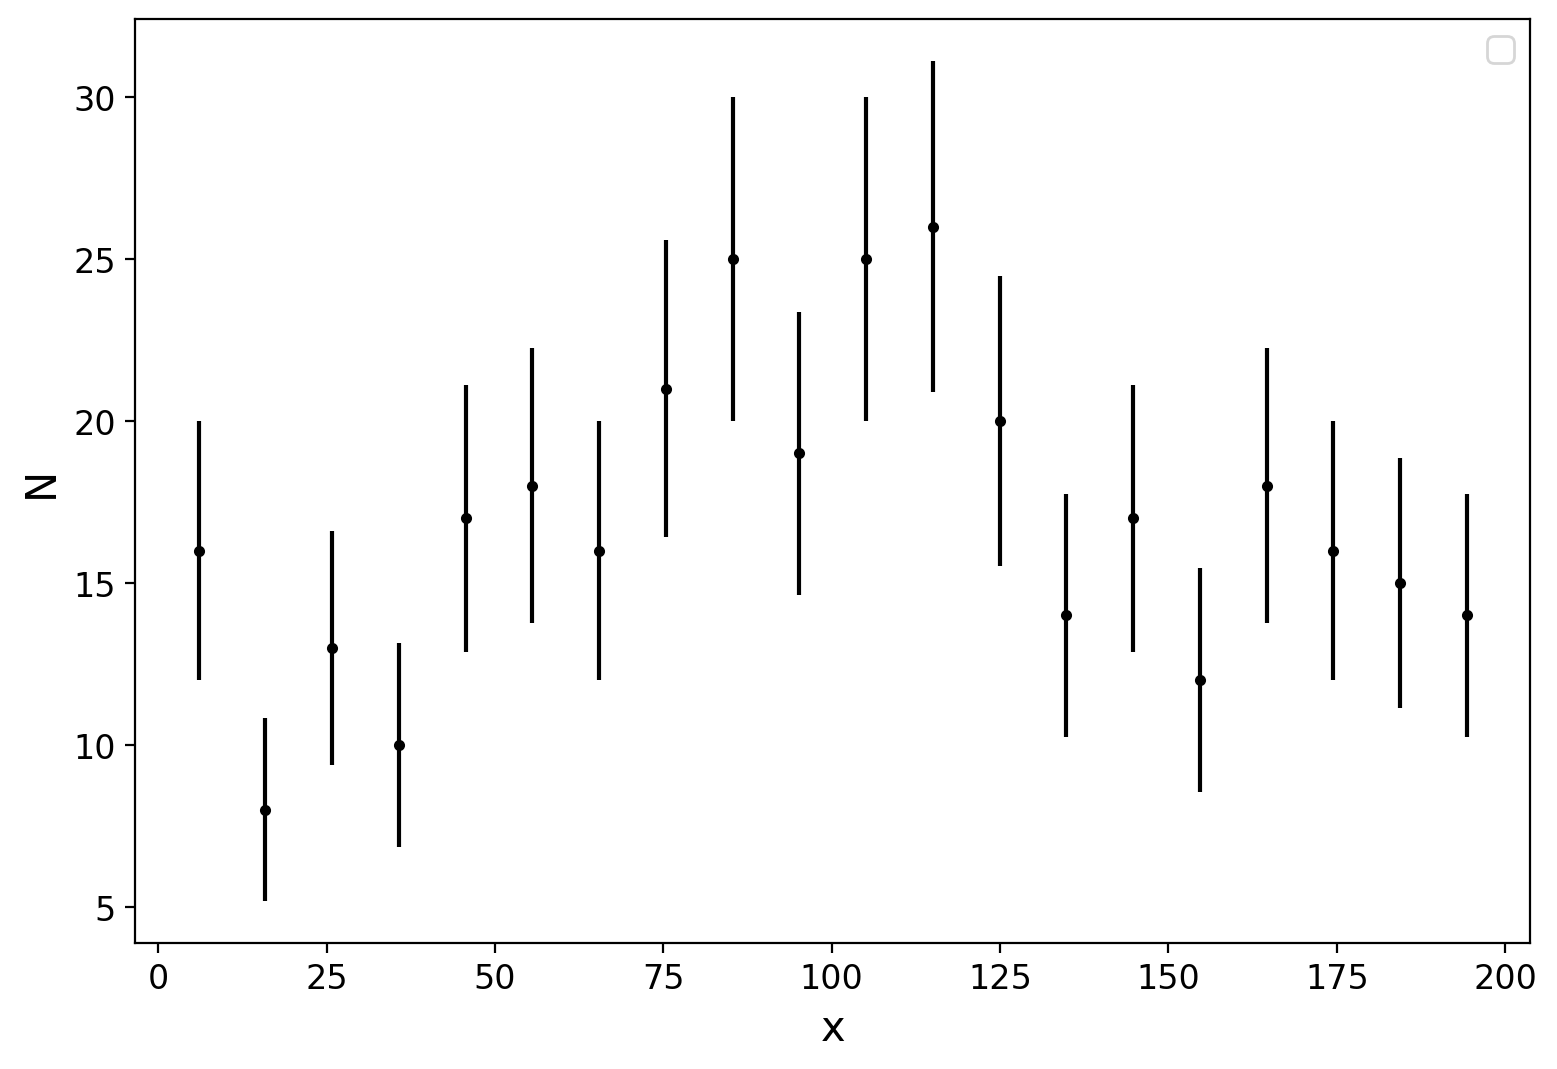

In [32]:
#First lets make a data sample and fit it
bkg = np.random.uniform(0,200, 300)
sig = np.random.normal (100,15,40)
data = np.append(sig,bkg)
y, bin_edges = np.histogram(data, bins=20)
ys, bin_edges = np.histogram(sig, bins=bin_edges)
yb, bin_edges = np.histogram(bkg, bins=bin_edges)

bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers, y,yerr= y**0.5,marker='.',linestyle = 'None', color = 'black')
#plt.errorbar(bin_centers,yb,yerr=ys**0.5,marker='.',linestyle = '-', color = 'red',label='bkg')
#plt.errorbar(bin_centers,ys,yerr=yb**0.5,marker='.',linestyle = '-', color = 'blue',label='signal')
plt.xlabel("x")
plt.ylabel("N")
plt.legend()
plt.show()

Let's try to fitting our bump distribution. For this, we can define the two fit functions:

**Null hypothesis** Our fit function is just a flat constant with a gaussian signal on top.
\begin{equation}
f(x|C,\mu\,\sigma) = C + \mathcal{N}(x,\mu,\sigma)
\end{equation}

**Alternative hypothesis** Our fit function is just a flat constant
\begin{equation}
f(x|C) = C 
\end{equation}

For each of these we can define the likelihood by summing over our $N$ bins with value $x_{i}$ and number of events $y_{i}$ and treating each bin as a separate gaussian with uncertainty given by the $\sigma_{i}=\sqrt{y_{i}}$. We can write this as

\begin{eqnarray}
 \mathcal{L}(\theta_{i} | x_{i},y_{i}) & = & \prod_{i=0}^{N}\frac{1}{\sqrt{2\pi\sigma_{i}^{2}}}\exp\left(-\sum_{i=0}^{N} \frac{(y_{i}-f(x_{i})^2}{2\sigma_{i}^{2}}\right) \\
 \log\left(\mathcal{L}(\theta_{i} | x_{i},y_{i})\right) & = &  -\sum_{i=0}^{n}\log\left(2\pi\sigma_{i}^{2}\right) - \sum_{i=0}^{N} \frac{(y_{i}-f(x_{i}|\theta_{i}))^2}{2\sigma_{i}^{2}}
\end{eqnarray}

Our liklihood ratio is then just the difference where we replace $f(x)$ with the appropriate hypothesis. Lets write this all out in lmfit and do it. 


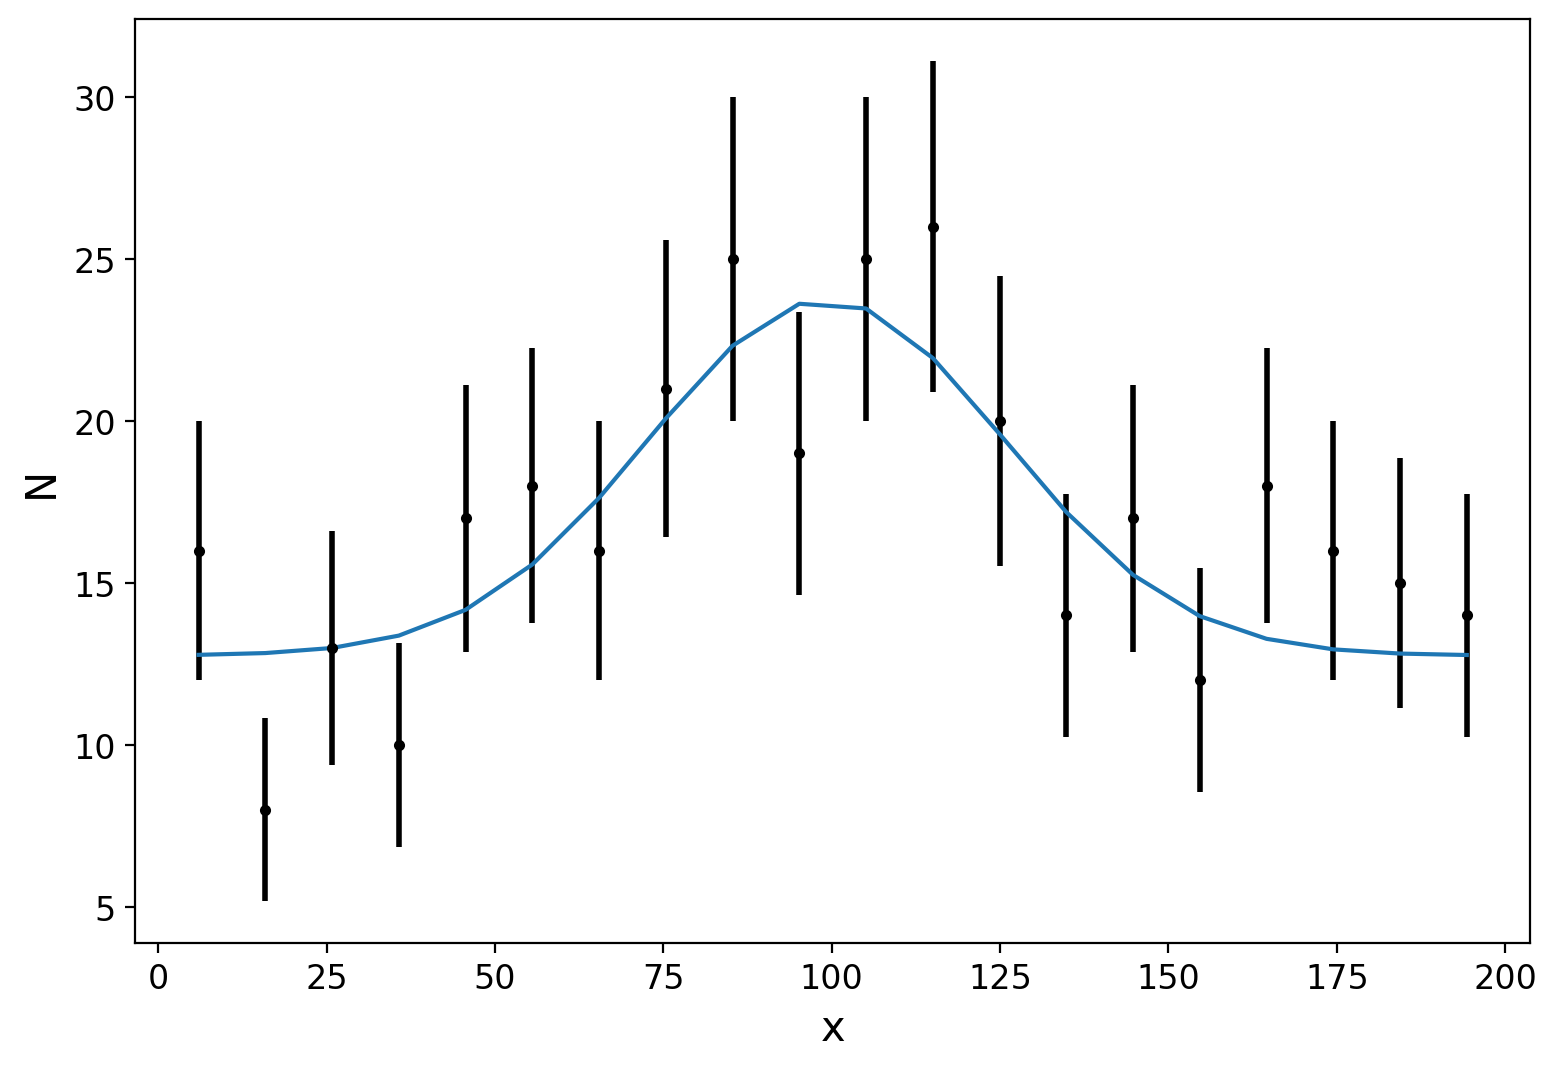

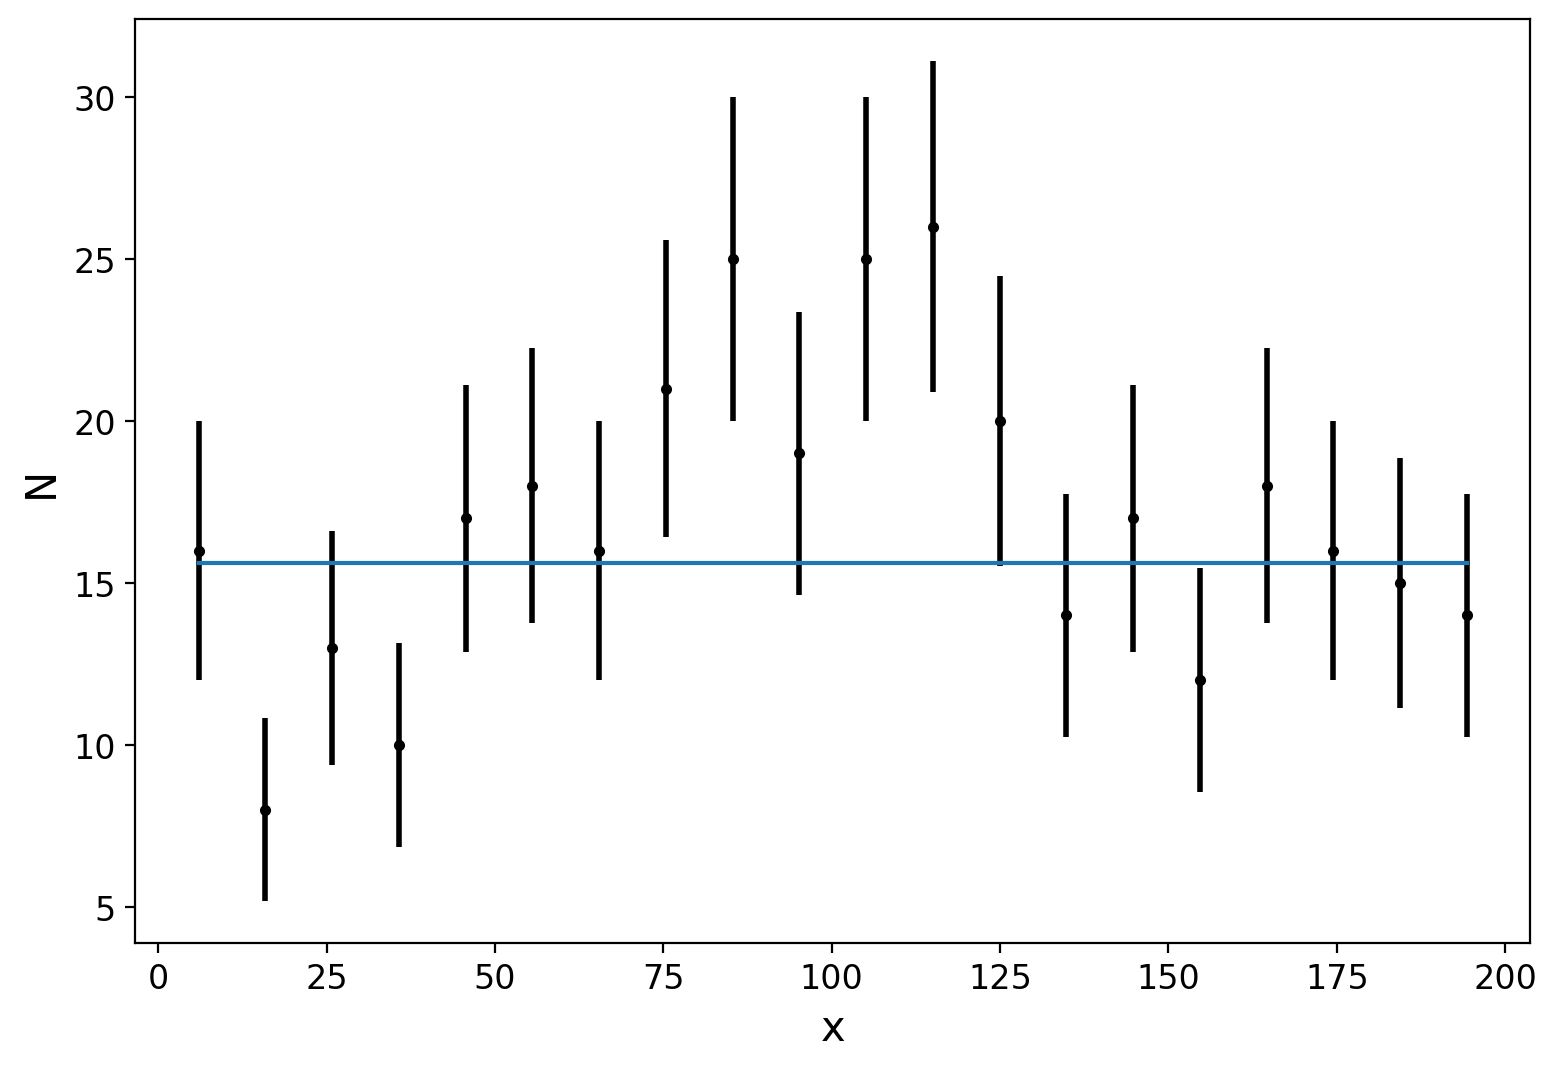

Delta negative Log Likelihood: 8.052549642314375


In [33]:
from scipy.stats import norm
import lmfit

def fNull(params,x):
    val = norm.pdf(x,params["mu"],params["sigma"])
    return params["amp"]*val + params["c"]

def fAlt(params,x):
    return params["c"]*(x+1)/(x+1) #hack to output array

def binnedLikelihood(params, x, ydata, weights, func):
    y_model= func(params,x)
    residarr = np.sqrt(((y_model - ydata)/(2*weights))**2 + np.log(2*np.pi*weights**2))
    return residarr

def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    #lmfit.report_fit(result)
    if iPlot:
        #Now we plot it. 
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("N")
        plt.show()
    return result.residual

def deltaNLL(x,y,iPlot=False):
    LLNull=fitData(x,y,fNull,iPlot)
    LLAlt=fitData(x,y,fAlt,iPlot)
    return 2.*(np.sum(LLAlt*LLAlt)-np.sum(LLNull*LLNull))

x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative Log Likelihood:",NLL)

Ok, so we got a big delta log likelihood. However, what is the significance of this? 

Well, this is where we can invoke Wilks' therorem. $\Delta \log(\mathcal{L})$ will be $\chi^{2}$ distributed if the null and alternative hypothesed are the same. In this case, the $\chi^{2}$ distribution will be with $n_{\rm params~Null}-n_{\rm params~Alt}$ degrees of freedom. For this case its $3$ (ie the 3 gaussian parameters. 

To see what this would look like if we just fit background, lets run the above computation for 1000 toys of just background data. 

Toy: 0  of  500
Toy: 50  of  500
Toy: 100  of  500
Toy: 150  of  500
Toy: 200  of  500
Toy: 250  of  500
Toy: 300  of  500
Toy: 350  of  500
Toy: 400  of  500
Toy: 450  of  500
Significance with 3 floating 0.9550619439840095


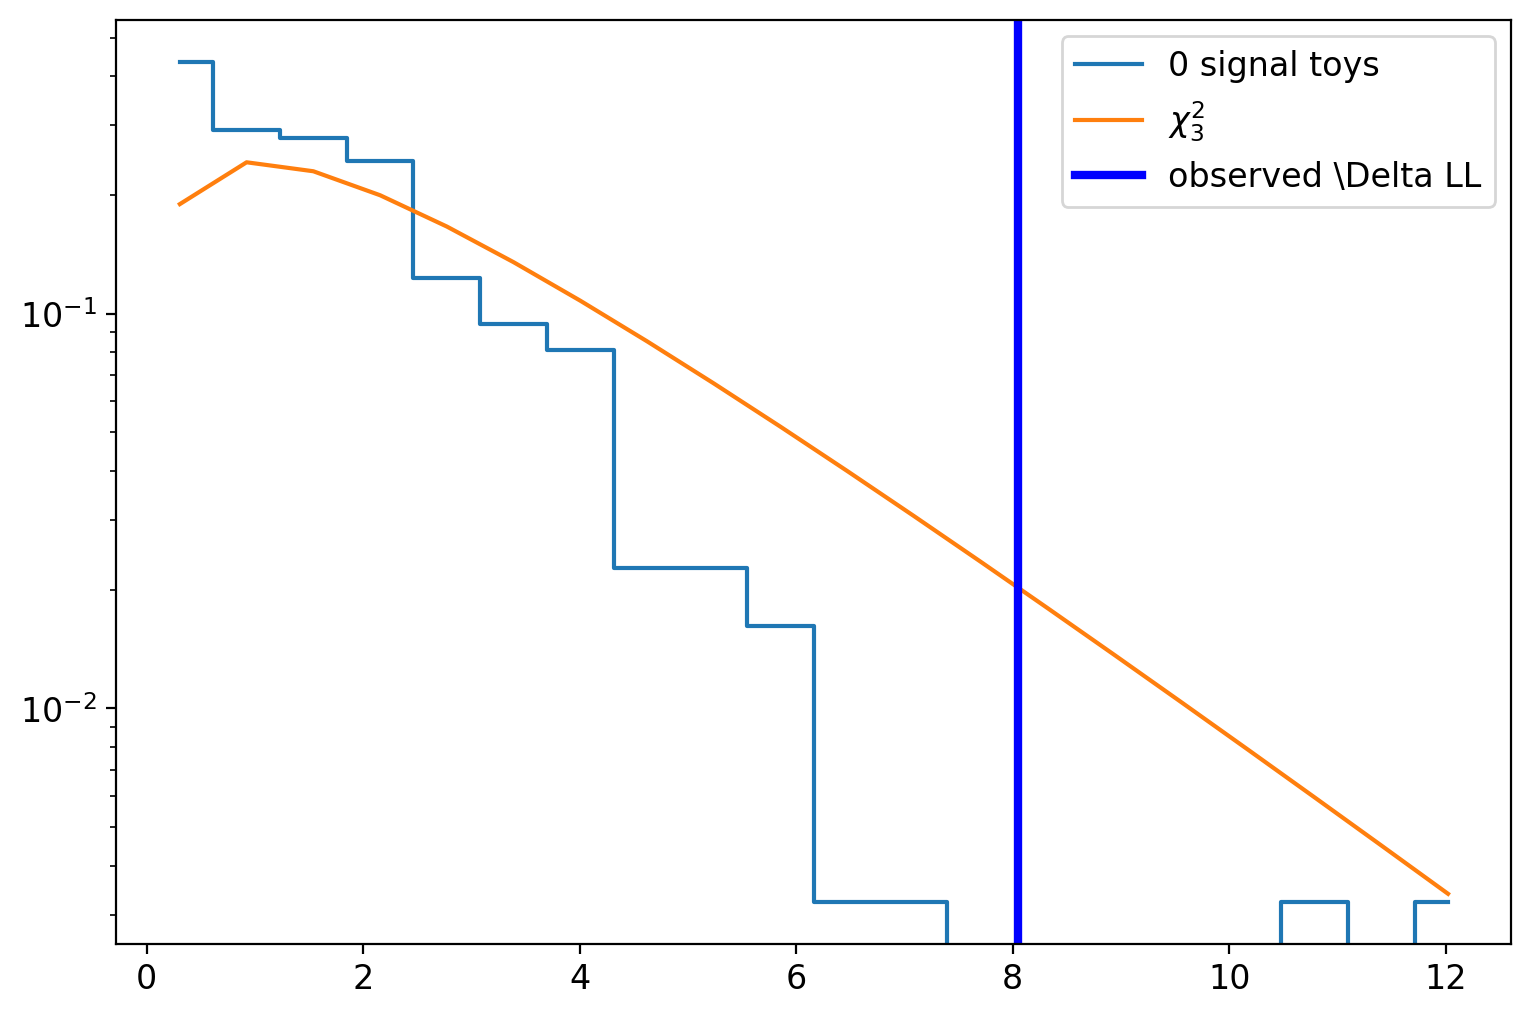

In [34]:
def toyNLL(iNEvents,iNToys,iBin_Edges):
    deltaNLLArr=np.array([])
    for i0 in range(iNToys):
        if i0 % 50 == 0:
            print("Toy:",i0," of ",iNToys)
        bkg = np.random.uniform(0,200, iNEvents)
        y, bin_edges = np.histogram(bkg, bins=iBin_Edges)
        x = 0.5*(bin_edges[1:] + bin_edges[:-1])
        nll = deltaNLL(x,y)
        deltaNLLArr=np.append(deltaNLLArr,nll)
    return deltaNLLArr

NLL1 = toyNLL(300,500,bin_edges)
ll1, ll_bin_edges = np.histogram(NLL1, bins=20,density=True)
ll_bin_centers = 0.5*(ll_bin_edges[1:] + ll_bin_edges[:-1])
chi21 = np.array([])
for x in ll_bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 3) #len is to normalize
    chi21 = np.append(chi21,chi2val)

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(ll_bin_centers,ll1,drawstyle = 'steps-mid',label='0 signal toys')
plt.plot(ll_bin_centers,chi21,label='$\chi^{2}_{3}$')
ax.axvline(x=NLL,linewidth=3,c='b',label="observed \Delta LL")
print("Significance with 3 floating",stats.chi2.cdf(NLL,3))
plt.legend()
plt.yscale('log')
plt.show()



In [35]:
print("Significance with 3 floating",stats.chi2.cdf(NLL,3),stats.norm.ppf(0.866748583192874))

Significance with 3 floating 0.9550619439840095 1.1111522198812382


### challenge question

Run the fit toys for the above distribution, fixing the mass of the gaussian in the fit. What $\chi^{2}$ distribution is run? 

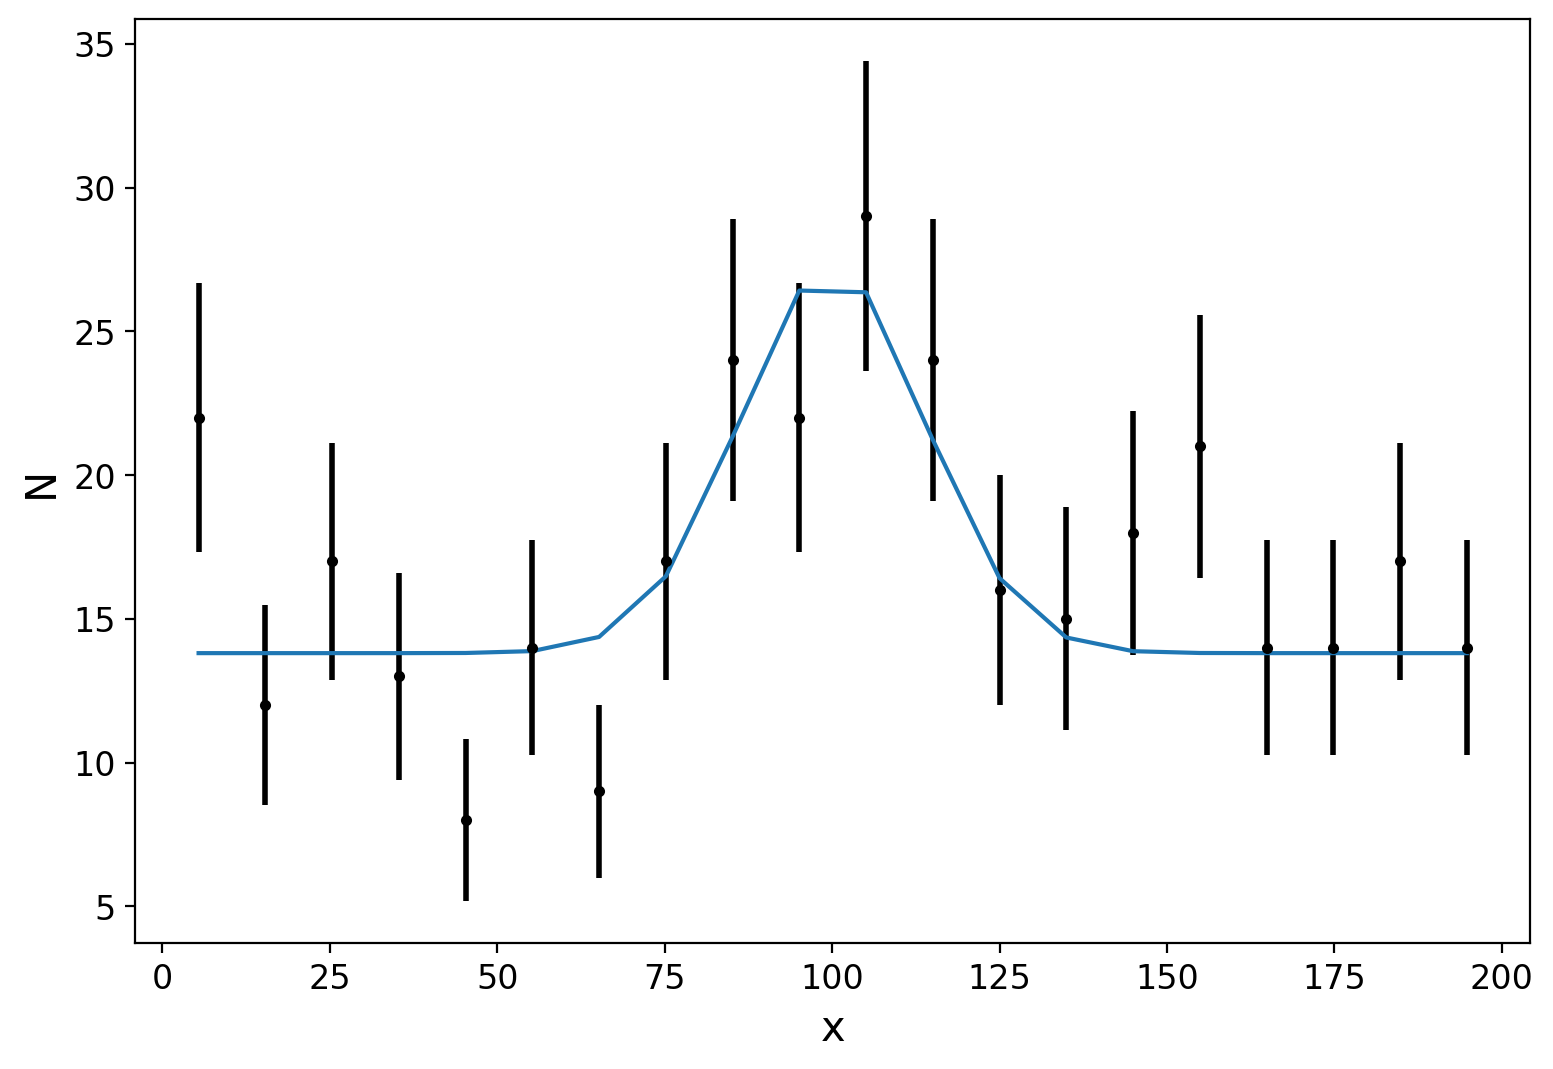

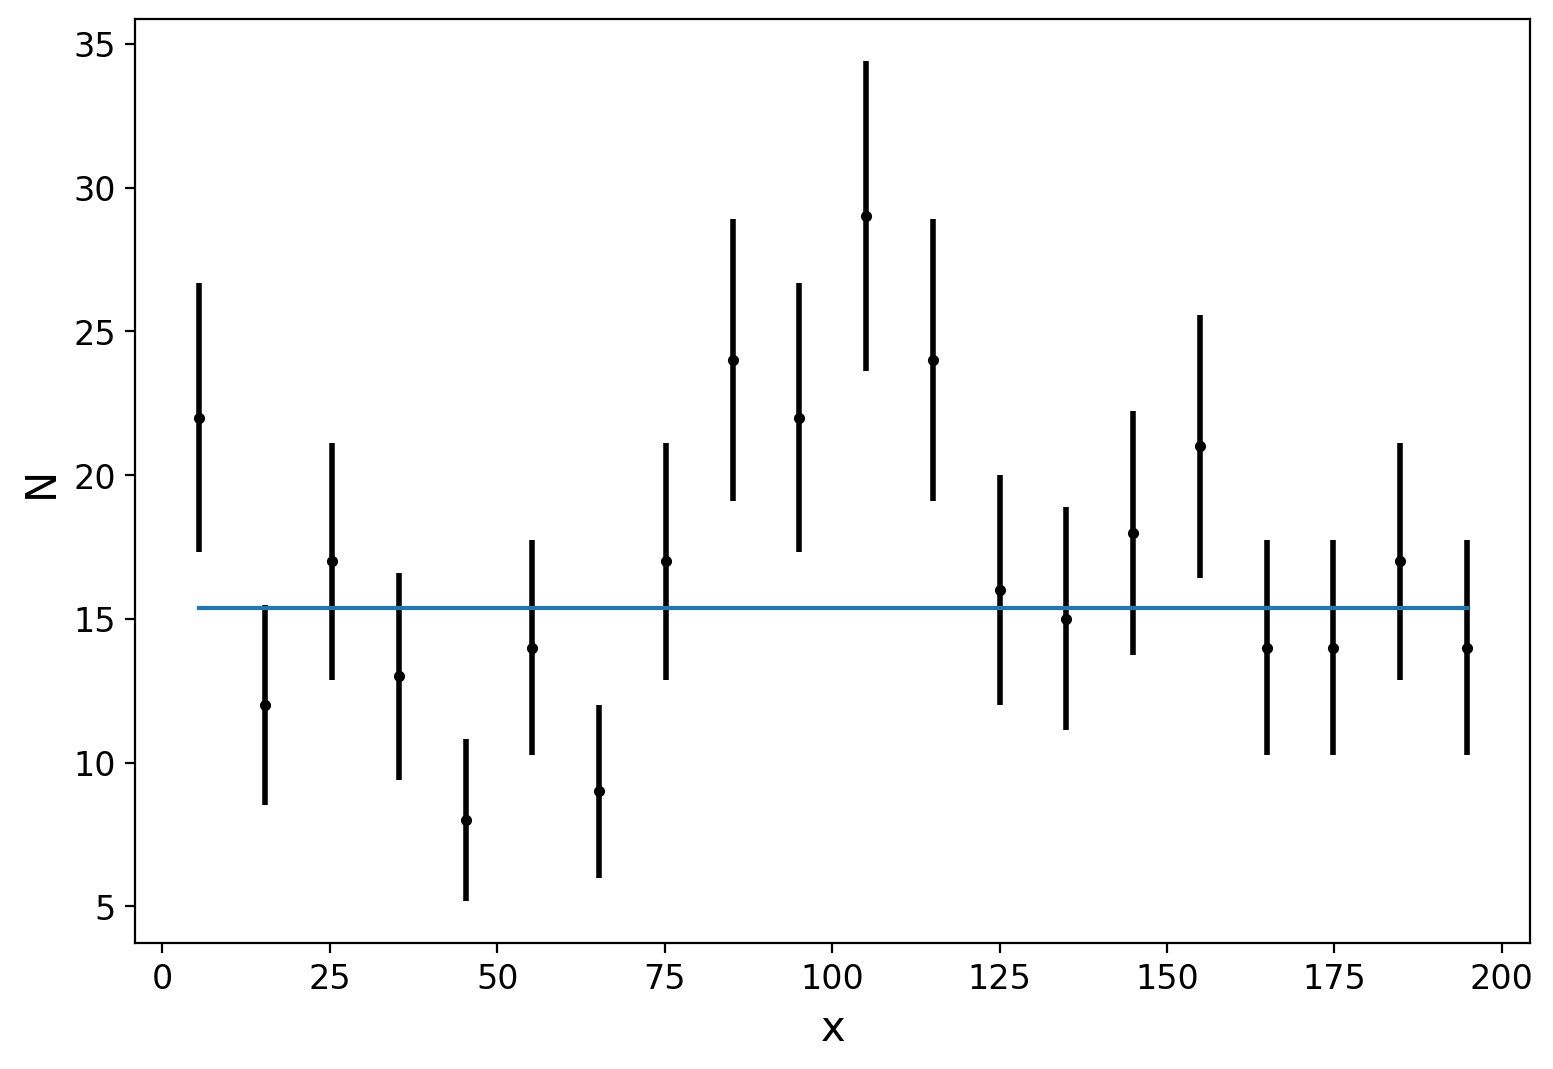

Delta negative Log Likelihood: 7.502124398666467
Our Probability of this happening 0.02349277858449872


In [25]:
def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    params["mu"].vary = False
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    #lmfit.report_fit(result)
    if iPlot:
        #Now we plot it. 
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("N")
        plt.show()
    return result.residual

def deltaNLL(x,y,iPlot=False):
    LLNull=fitData(x,y,fNull,iPlot)
    LLAlt=fitData(x,y,fAlt,iPlot)
    return 2.*(np.sum(LLAlt*LLAlt)-np.sum(LLNull*LLNull))

x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative Log Likelihood:",NLL)
stats.chi2.pdf(x, 3)

probability = 1-stats.chi2.cdf(NLL, 2)
print("Our Probability of this happening",probability)

Toy: 0  of  500
Toy: 50  of  500
Toy: 100  of  500
Toy: 150  of  500
Toy: 200  of  500
Toy: 250  of  500
Toy: 300  of  500
Toy: 350  of  500
Toy: 400  of  500
Toy: 450  of  500
Significance with 2 floating 0.9788333169579736


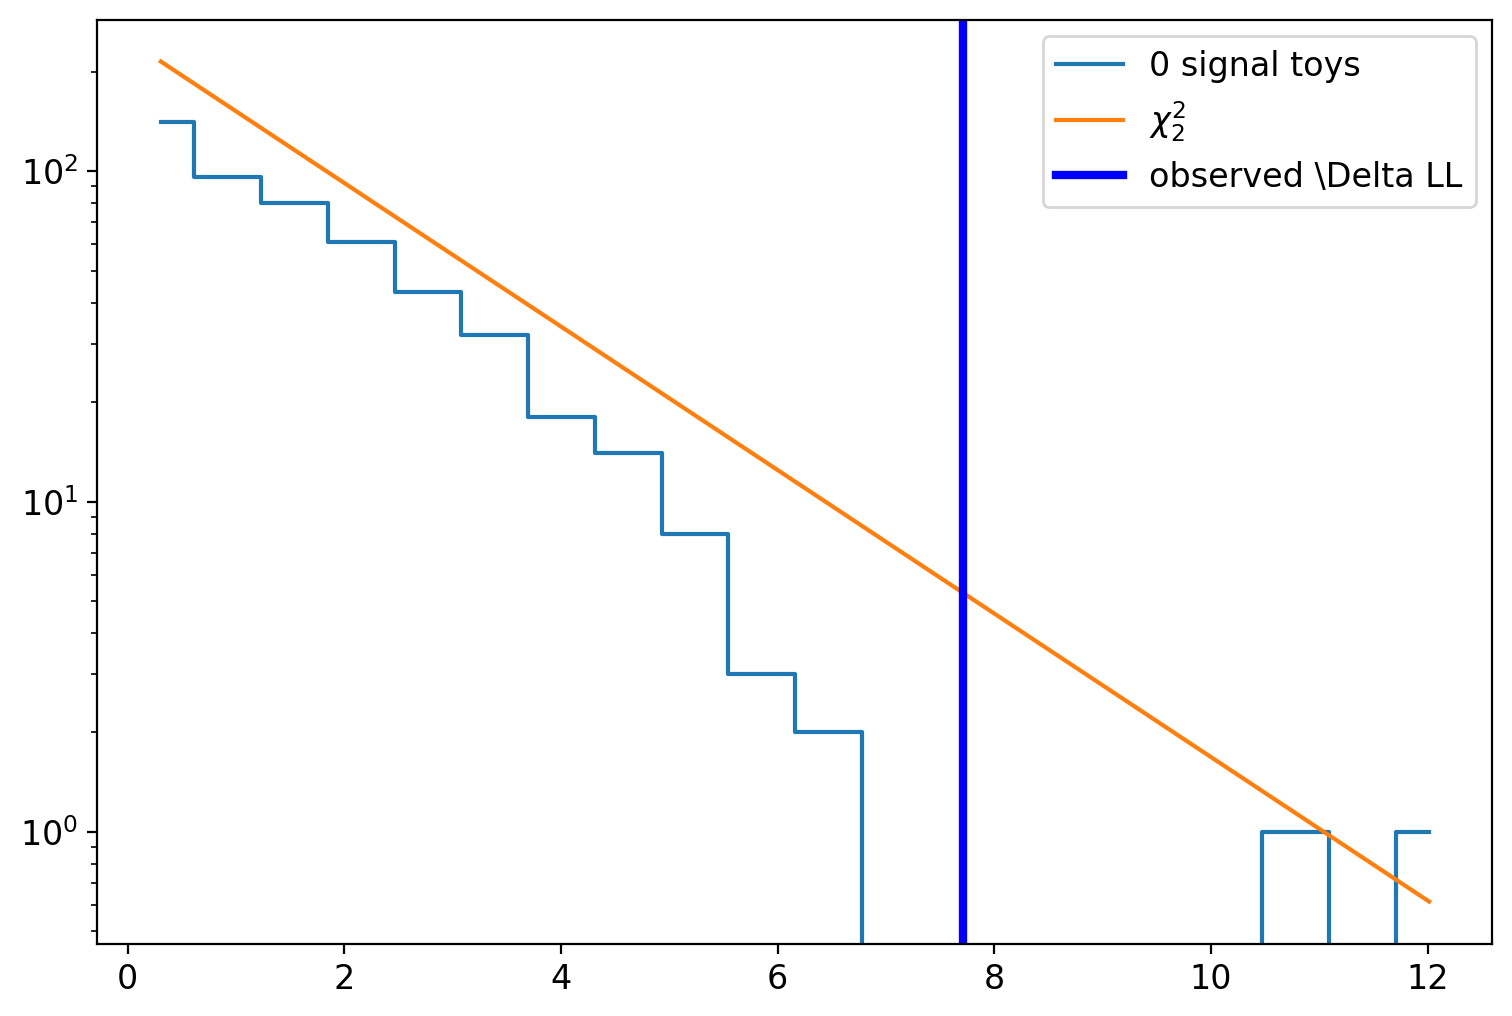

In [26]:
#answer
def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    params['mu'].vary = True    ###############!!!! this is what we fix
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    return result.residual

NLL = deltaNLL(x,y,True)
NLL1 = toyNLL(300,500,bin_edges)
ll1, ll_bin_edges = np.histogram(NLL1, bins=20)
ll_bin_centers = 0.5*(ll_bin_edges[1:] + ll_bin_edges[:-1])
chi21 = np.array([])
for x in ll_bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 2)*len(NLL1) #len is to normalize
    chi21 = np.append(chi21,chi2val)

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(ll_bin_centers,ll1,drawstyle = 'steps-mid',label='0 signal toys')
plt.plot(ll_bin_centers,chi21,label='$\chi^{2}_{2}$')
ax.axvline(x=NLL,linewidth=3,c='b',label="observed \Delta LL")
print("Significance with 2 floating",stats.chi2.cdf(NLL,2))
plt.legend()
plt.yscale('log')
